<a href="https://colab.research.google.com/github/swaraj890/BIKE-DEMAND-PREDICTION/blob/main/Supervised_Regression_Bike_Demand_Prediction_Capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT NAME-BIKE DEMAND PREDICTION**



##### <font size='5px'>**Project Type**    - **Supervised ML Regression**
##### **Contribution**    - SELF
##### **Team Member 1 -**SWARAJ MALLICK


# **Project Summary -**

Introduction:
Bike demand prediction is a crucial challenge faced by bike rental companies, where accurate forecasts play a pivotal role in optimizing inventory and pricing strategies. In this project, our goal was to develop a supervised machine learning model, specifically a regression model, to predict bike demand within a given time period.

Project Details:
The original dataset comprised bike rental information, encompassing details such as the number of bikes rented, rental time, and date, along with various weather and seasonality features. Additional factors, such as holidays and the operational status of the day, were also considered.

Methodology:
Following data preprocessing and cleaning, the dataset was split into training and test sets. Multiple model architectures and hyperparameter settings were explored, with the best-performing model selected based on test data results.

Performance Evaluation:
Performance metrics, including mean absolute error, root mean squared error, and R-squared, were employed to assess the model's accuracy. The selected model exhibited high precision, with an R-squared value of 0.88 and a mean absolute error of 2.58.

Feature Impact Analysis:
In-depth ablation studies were conducted to discern the impact of individual features on the model's performance. Temperature, weather conditions, and seasonality emerged as the most influential factors affecting bike demand.

Deployment and Real-time Monitoring:
The final model was deployed in a live production setting and continually monitored for performance. Real-time predictions proved accurate, empowering the bike-sharing company to make informed decisions on inventory management and pricing strategies.

Conclusion:
This project demonstrates the successful development and deployment of a machine learning model for bike demand prediction, providing valuable insights for optimizing operational strategies in a dynamic bike-sharing environment.

# **GitHub Link -**
https://github.com/swaraj890/BIKE-DEMAND-PREDICTION

# **Problem Statement**


This project is geared towards addressing the crucial need for accurate bike demand forecasting within specific timeframes for bike rental companies. The ability to precisely predict demand holds significant importance for these companies, allowing them to optimize inventory and pricing strategies to better serve their customer base. However, the complexity of predicting bike demand is compounded by various factors, including rental timing, date, weather conditions, and local events. The overarching objective is to develop a highly accurate machine learning model that not only minimizes mean absolute error but also achieves a high R-squared value.

Significance:
The project's significance lies in its potential to equip bike rental companies with a predictive model that goes beyond traditional forecasting. By gaining insights into the factors influencing bike demand, the model aims to empower the bike-sharing company to make informed, data-driven decisions. This, in turn, enables the optimization of operational processes and resource allocation, enhancing the company's ability to meet customer needs effectively.

Ultimately, the project aspires to contribute to the advancement of data-driven decision-making in the bike rental industry, offering a valuable tool for companies seeking to enhance their operational efficiency and customer satisfaction.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
#data visualization libraries(matplotlib,seaborn, plotly)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from scipy import stats

# Importing numpy, pandas and tensorflow
import pandas as pd
import numpy as np

# Datetime library for manipulating Date columns.
from datetime import datetime
import calendar

# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import  LabelEncoder

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import lightgbm


# XGB regressor.
from xgboost import XGBRegressor

#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# spilitting data
from sklearn.model_selection import train_test_split

#for optimization
from sklearn.model_selection import GridSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

#importing shap for Model explainability
!pip install shap
import shap

# The following lines adjust the granularity of reporting.
pd.options.display.float_format = "{:.2f}".format

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.2 MB/s eta 0:00:00


### Dataset Loading

In [ ]:
#mouting google drive to get data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [137]:
# Load Dataset
path = '/content/SeoulBikeData.csv'
DF = pd.read_csv(path,encoding = "ISO-8859-1")

### Dataset First View

In [ ]:
# Dataset First Look
DF.head(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0            -5.20           37   
1  01/12/2017                204     1            -5.50           38   
2  01/12/2017                173     2            -6.00           39   
3  01/12/2017                107     3            -6.20           40   
4  01/12/2017                 78     4            -6.00           36   
5  01/12/2017                100     5            -6.40           37   
6  01/12/2017                181     6            -6.60           35   
7  01/12/2017                460     7            -7.40           38   
8  01/12/2017                930     8            -7.60           37   
9  01/12/2017                490     9            -6.50           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0              2.20              2000                     -17.60   
1              0.80              2000                     -17.60   
2              1.00              2000                     -17.70   
3              0.90              2000                     -17.60   
4              2.30              2000                     -18.60   
5              1.50              2000                     -18.70   
6              1.30              2000                     -19.50   
7              0.90              2000                     -19.30   
8              1.10              2000                     -19.80   
9              0.50              1928                     -22.40   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00          0.00           0.00  Winter  No Holiday   
1                     0.00          0.00           0.00  Winter  No Holiday   
2                     0.00          0.00           0.00  Winter  No Holiday   
3                     0.00          0.00           0.00  Winter  No Holiday   
4                     0.00          0.00           0.00  Winter  No Holiday   
5                     0.00          0.00           0.00  Winter  No Holiday   
6                     0.00          0.00           0.00  Winter  No Holiday   
7                     0.00          0.00           0.00  Winter  No Holiday   
8                     0.01          0.00           0.00  Winter  No Holiday   
9                     0.23          0.00           0.00  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Column count
print(DF.shape)

(8760, 14)


### Dataset Information

In [ ]:
# Dataset Info
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(DF.duplicated().value_counts())

False    8760
dtype: int64


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
DF.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

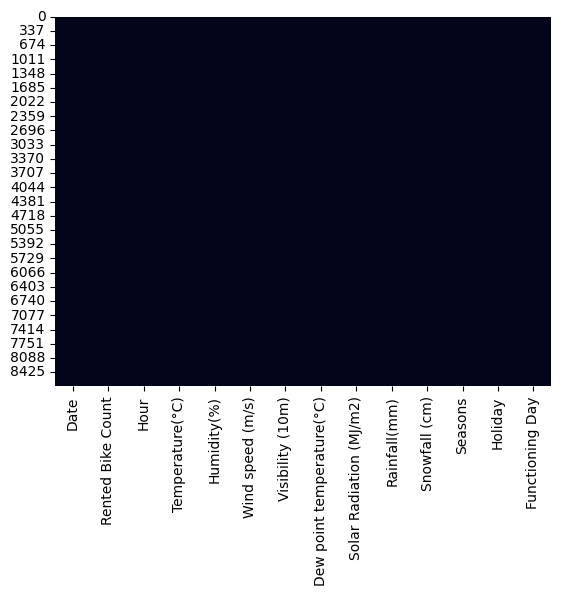

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(DF.isnull(), cbar=False);

### What did you know about your dataset?

* There is no null values.
* There are 8760 observation and 14 features.
* Dataset has all unique values i.e., there is no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data.
* Date has object data type it should be datetime data type.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Describe
DF.describe()

Rented Bike Count    Hour  Temperature(°C)  Humidity(%)  \
count            8760.00 8760.00          8760.00      8760.00   
mean              704.60   11.50            12.88        58.23   
std               645.00    6.92            11.94        20.36   
min                 0.00    0.00           -17.80         0.00   
25%               191.00    5.75             3.50        42.00   
50%               504.50   11.50            13.70        57.00   
75%              1065.25   17.25            22.50        74.00   
max              3556.00   23.00            39.40        98.00   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count           8760.00           8760.00                    8760.00   
mean               1.72           1436.83                       4.07   
std                1.04            608.30                      13.06   
min                0.00             27.00                     -30.60   
25%                0.90            940.00                      -4.70   
50%                1.50           1698.00                       5.10   
75%                2.30           2000.00                      14.80   
max                7.40           2000.00                      27.20   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count                  8760.00       8760.00        8760.00  
mean                      0.57          0.15           0.08  
std                       0.87          1.13           0.44  
min                       0.00          0.00           0.00  
25%                       0.00          0.00           0.00  
50%                       0.01          0.00           0.00  
75%                       0.93          0.00           0.00  
max                       3.52         35.00           8.80

### Variables Description

*   **Date** - Date(year-month-day)
*   **Rented_Bike_Count** - Count of bikes rented at each hour
*   **Hour** - Hour of the day(0-23)
*   **Temperature** - Temperature for the day
*   **Humidity** - Humidity Measure
*   **Windspeed** - Windspeed
*   **Visibility** - Visibility Measure
*   **Dew point temperature** - Dew Point Measure
*   **Solar radiation** - Solar Radiation Measure
*   **Rainfall** - Rainfall in mm
*   **Snowfall** - Snowfall in cm
*   **Seasons** - Season Name
*   **Holiday** - Whether Holiday or Not
*   **Functional Day** - Functional Day or Not

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in DF.columns.tolist():
  print(f"No. of unique values in {i} is {DF[i].nunique()}.")

No. of unique values in Date is 365.
No. of unique values in Rented Bike Count is 2166.
No. of unique values in Hour is 24.
No. of unique values in Temperature(°C) is 546.
No. of unique values in Humidity(%) is 90.
No. of unique values in Wind speed (m/s) is 65.
No. of unique values in Visibility (10m) is 1789.
No. of unique values in Dew point temperature(°C) is 556.
No. of unique values in Solar Radiation (MJ/m2) is 345.
No. of unique values in Rainfall(mm) is 61.
No. of unique values in Snowfall (cm) is 51.
No. of unique values in Seasons is 4.
No. of unique values in Holiday is 2.
No. of unique values in Functioning Day is 2.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#converting few names for convenience
df = DF.copy()   #keeping orginla data safe
df.rename({"Temperature(°C)": "Temperature",
               "Functioning Day":"Functioning_Day",
                "Humidity(%)": "Humidity",
                "Wind speed (m/s)": "Wind_speed",
                "Visibility (10m)": "Visibility",
                "Dew point temperature(°C)": "Dew_point_temperature",
                "Solar Radiation (MJ/m2)": "Solar_Radiation",
                "Snowfall (cm)": "Snowfall",
                "Rainfall(mm)": "Rainfall",
                "Rented Bike Count": "Rented_Bike_Count"},
                axis = "columns", inplace = True)

In [ ]:
print(f'updated columns: {df.columns.to_list()}')

updated columns: ['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day']


In [ ]:
#changing date data type
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [ ]:
#Extracting month from date column
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day name from date
df['Day'] = df['Date'].dt.day_name()

#Extracting year
df['Year'] = df['Date'].dt.year

In [ ]:
# dropping Date column
df.drop(columns=['Date'],inplace=True)

In [ ]:
# Functioning_Day mean, median and sum
df.groupby('Functioning_Day').agg(['mean','median','sum']).T

Functioning_Day                     No         Yes
Rented_Bike_Count     mean        0.00      729.16
                      median      0.00      542.00
                      sum         0.00  6172314.00
Hour                  mean       11.30       11.51
                      median     11.00       12.00
                      sum      3333.00    97407.00
Temperature           mean       16.09       12.77
                      median     16.30       13.50
                      sum      4747.40   108107.00
Humidity              mean       60.49       58.15
                      median     62.00       57.00
                      sum     17846.00   492216.00
Wind_speed            mean        1.70        1.73
                      median      1.50        1.50
                      sum       500.60    14609.60
Visibility            mean     1521.54     1433.87
                      median   1814.00     1690.00
                      sum    448855.00 12137739.00
Dew_point_temperature mean        7.77        3.94
                      median      7.80        4.70
                      sum      2292.20    33394.40
Solar_Radiation       mean        0.60        0.57
                      median      0.00        0.01
                      sum       178.41     4807.00
Rainfall              mean        0.14        0.15
                      median      0.00        0.00
                      sum        40.20     1262.30
Snowfall              mean        0.00        0.08
                      median      0.00        0.00
                      sum         0.00      657.60
Year                  mean     2018.00     2017.91
                      median   2018.00     2018.00
                      sum    595310.00 17081626.00

In [ ]:
#finding sum, mean and median based on holiday
df.groupby('Holiday').agg(['mean','median','sum']).T

Holiday                        Holiday  No Holiday
Rented_Bike_Count     mean      499.76      715.23
                      median    240.00      524.50
                      sum    215895.00  5956419.00
Hour                  mean       11.50       11.50
                      median     11.50       11.50
                      sum      4968.00    95772.00
Temperature           mean        9.95       13.04
                      median      8.65       13.85
                      sum      4298.30   108556.10
Humidity              mean       53.73       58.46
                      median     53.00       57.00
                      sum     23212.00   486850.00
Wind_speed            mean        1.83        1.72
                      median      1.50        1.50
                      sum       790.40    14319.80
Visibility            mean     1521.68     1432.42
                      median   1942.00     1680.00
                      sum    657366.00 11929228.00
Dew_point_temperature mean        0.25        4.27
                      median      3.25        5.30
                      sum       106.20    35580.40
Solar_Radiation       mean        0.55        0.57
                      median      0.00        0.01
                      sum       237.49     4747.92
Rainfall              mean        0.08        0.15
                      median      0.00        0.00
                      sum        33.70     1268.80
Snowfall              mean        0.05        0.08
                      median      0.00        0.00
                      sum        22.00      635.60
Year                  mean     2017.78     2017.92
                      median   2018.00     2018.00
                      sum    871680.00 16805256.00

In [ ]:
#finding sum, mean and median based on Month
df.groupby('Month').agg(['mean','median','sum']).T

Month                               Apr        Aug        Dec        Feb  \
Rented_Bike_Count     mean       772.53     825.52     419.05     393.02   
                      median     651.00     691.00     246.50     283.50   
                      sum     556219.00  614190.00  311771.00  264112.00   
Hour                  mean        11.50      11.50      11.50      11.50   
                      median      11.50      11.50      11.50      11.50   
                      sum       8280.00    8556.00    8556.00    7728.00   
Temperature           mean        13.71      21.26       2.85       6.48   
                      median      13.70      24.35      -0.25       3.30   
                      sum       9872.10   15816.80    2117.00    4357.50   
Humidity              mean        53.63      63.00      55.51      51.79   
                      median      52.00      61.00      54.00      50.00   
                      sum      38614.00   46871.00   41302.00   34800.00   
Wind_speed            mean         1.85       1.68       1.66       1.84   
                      median       1.70       1.60       1.40       1.60   
                      sum       1333.90    1247.80    1235.60    1235.40   
Visibility            mean      1440.53    1658.04    1394.52    1451.80   
                      median    1653.50    1945.00    1789.00    1636.00   
                      sum    1037184.00 1233584.00 1037523.00  975610.00   
Dew_point_temperature mean         3.19      13.17      -5.96      -3.83   
                      median       3.65      18.00      -6.10      -6.90   
                      sum       2296.00    9798.40   -4433.80   -2575.20   
Solar_Radiation       mean         0.73       0.61       0.35       0.51   
                      median       0.07       0.03       0.00       0.00   
                      sum        528.24     450.34     256.87     343.27   
Rainfall              mean         0.15       0.32       0.09       0.15   
                      median       0.00       0.00       0.00       0.00   
                      sum        107.70     241.50      63.80     100.60   
Snowfall              mean         0.00       0.01       0.30       0.07   
                      median       0.00       0.00       0.00       0.00   
                      sum          0.00       4.50     224.50      44.70   
Year                  mean      2017.97    2017.97    2017.35    2017.96   
                      median    2018.00    2018.00    2017.00    2018.00   
                      sum    1452936.00 1501368.00 1500912.00 1356072.00   

Month                               Jan        Jul        Jun        Mar  \
Rented_Bike_Count     mean       386.08     929.22     981.57     611.61   
                      median     215.50     762.50     883.00     505.00   
                      sum     287244.00  691339.00  706728.00  455037.00   
Hour                  mean        11.50      11.50      11.50      11.50   
                      median      11.50      11.50      11.50      11.50   
                      sum       8556.00    8556.00    8280.00    8556.00   
Temperature           mean         2.72      23.13      19.00      11.44   
                      median       0.55      27.35      21.75      10.70   
                      sum       2025.80   17205.30   13678.70    8508.90   
Humidity              mean        52.93      60.59      65.64      59.83   
                      median      51.00      59.00      67.00      59.00   
                      sum      39381.00   45076.00   47259.00   44513.00   
Wind_speed            mean         1.81       1.66       1.69       1.91   
                      median       1.60       1.60       1.50       1.70   
                      sum       1348.90    1238.70    1220.10    1423.90   
Visibility            mean      1392.81    1527.46    1196.53    1241.91   
                      median    1742.00    1672.00    1148.50    1302.00   
                      sum    1036252.00 1136429

In [ ]:
#finding mean, median and sum based on seasons
df.groupby('Seasons').agg(['mean','median','sum']).T

Seasons                          Autumn     Spring     Summer     Winter
Rented_Bike_Count     mean       819.60     730.03    1034.07     225.54
                      median     763.50     583.00     905.50     203.00
                      sum    1790002.00 1611909.00 2283234.00  487169.00
Hour                  mean        11.50      11.50      11.50      11.50
                      median      11.50      11.50      11.50      11.50
                      sum      25116.00   25392.00   25392.00   24840.00
Temperature           mean        14.12      13.05      26.58      -2.54
                      median      13.85      13.30      26.60      -2.20
                      sum      30839.90   28807.10   58694.80   -5487.40
Humidity              mean        59.23      58.78      64.98      49.74
                      median      59.00      58.00      65.00      47.00
                      sum     129355.00  129779.00  143479.00  107449.00
Wind_speed            mean         1.49       1.87       1.61       1.92
                      median       1.30       1.70       1.50       1.70
                      sum       3264.50    4139.10    3553.60    4153.00
Visibility            mean      1560.75    1240.36    1501.75    1445.99
                      median    1900.00    1307.50    1740.50    1762.00
                      sum    3408683.00 2738725.00 3315854.00 3123332.00
Dew_point_temperature mean         5.50       4.12      18.75     -12.42
                      median       5.50       4.60      20.00     -13.00
                      sum      12009.20    9097.10   41400.30  -26820.00
Solar_Radiation       mean         0.52       0.69       0.76       0.30
                      median       0.00       0.06       0.16       0.00
                      sum       1139.65    1520.84    1680.85     644.07
Rainfall              mean         0.12       0.18       0.25       0.03
                      median       0.00       0.00       0.00       0.00
                      sum        268.10     403.80     559.70      70.90
Snowfall              mean         0.06       0.00       0.00       0.25
                      median       0.00       0.00       0.00       0.00
                      sum        123.00       0.00       0.00     534.60
Year                  mean      2018.00    2018.00    2018.00    2017.66
                      median    2018.00    2018.00    2018.00    2018.00
                      sum    4407312.00 4455744.00 4455744.00 4358136.00

In [ ]:
#finding mean,sum and median based on Year
df.groupby('Year').agg(['mean','median','sum']).T

Year                              2017        2018
Rented_Bike_Count     mean      249.10      746.88
                      median    236.50      586.00
                      sum    185330.00  5986984.00
Hour                  mean       11.50       11.50
                      median     11.50       11.50
                      sum      8556.00    92184.00
Temperature           mean       -1.93       14.26
                      median     -1.90       15.60
                      sum     -1435.00   114289.40
Humidity              mean       55.83       58.45
                      median     53.00       58.00
                      sum     41534.00   468528.00
Wind_speed            mean        1.74        1.72
                      median      1.45        1.50
                      sum      1292.90    13817.30
Visibility            mean     1332.24     1446.53
                      median   1683.00     1699.00
                      sum    991189.00 11595405.00
Dew_point_temperature mean      -10.34        5.41
                      median    -10.50        6.90
                      sum     -7696.30    43382.90
Solar_Radiation       mean        0.20        0.60
                      median      0.00        0.02
                      sum       151.69     4833.72
Rainfall              mean        0.05        0.16
                      median      0.00        0.00
                      sum        34.80     1267.70
Snowfall              mean        0.37        0.05
                      median      0.00        0.00
                      sum       276.00      381.60

In [ ]:
#finding mean,sum and median based on Day
df.groupby('Day').agg(['mean','median','sum']).T

Day                              Friday     Monday   Saturday     Sunday  \
Rented_Bike_Count     mean       734.45     719.64     730.35     615.97   
                      median     547.00     521.00     528.00     401.50   
                      sum     898966.00  863563.00  911475.00  798295.00   
Hour                  mean        11.50      11.50      11.50      11.50   
                      median      11.50      11.50      11.50      11.50   
                      sum      14076.00   13800.00   14352.00   14904.00   
Temperature           mean        13.43      13.15      12.65      12.64   
                      median      16.05      12.75      12.60      13.80   
                      sum      16442.10   15783.20   15782.40   16375.60   
Humidity              mean        59.52      59.27      56.45      57.64   
                      median      61.00      57.00      56.00      57.00   
                      sum      72853.00   71126.00   70453.00   74699.00   
Wind_speed            mean         1.65       1.71       1.76       1.62   
                      median       1.50       1.50       1.60       1.40   
                      sum       2019.70    2051.70    2198.50    2097.40   
Visibility            mean      1397.73    1338.92    1507.13    1426.33   
                      median    1593.50    1547.00    1821.00    1614.50   
                      sum    1710826.00 1606702.00 1880903.00 1848518.00   
Dew_point_temperature mean         4.87       4.75       3.31       3.65   
                      median       6.50       5.00       4.45       3.50   
                      sum       5956.90    5701.80    4129.70    4729.80   
Solar_Radiation       mean         0.56       0.58       0.63       0.54   
                      median       0.01       0.02       0.01       0.01   
                      sum        691.10     696.92     780.61     695.78   
Rainfall              mean         0.11       0.10       0.08       0.16   
                      median       0.00       0.00       0.00       0.00   
                      sum        137.70     114.10     106.00     208.20   
Snowfall              mean         0.05       0.07       0.08       0.04   
                      median       0.00       0.00       0.00       0.00   
                      sum         64.90      87.60      96.10      55.70   
Year                  mean      2017.92    2017.94    2017.92    2017.89   
                      median    2018.00    2018.00    2018.00    2018.00   
                      sum    2469936.00 2421528.00 2518368.00 2615184.00   

Day                            Thursday    Tuesday  Wednesday  
Rented_Bike_Count     mean       743.80     678.36     714.52  
                      median     579.00     481.00     495.50  
                      sum     928267.00  862877.00  908871.00  
Hour                  mean        11.50      11.50      11.50  
                      median      11.50      11.50      11.50  
                      sum      14352.00   14628.00   14628.00  
Temperature           mean        13.23      12.75      12.37  
                      median      15.05      13.30      13.30  
                      sum      16516.70   16217.70   15736.70  
Humidity              mean        58.21      56.61      59.97  
                      median      57.00      55.00      59.00  
                      sum      72643.00   72008.00   76280.00  
Wind_speed            mean         1.72       1.73       1.89  
                      median       1.50       1.50       1.70  
                      sum       2141.40    2195.40    2406.10  
Visibility            mean      1472.19    1494.94    1415.72  
                      median    1695.00    1809.00    1665.00  
                      sum    1837294.00 1901558.00 1800793.00  
Dew_point_temperature mean         4.44       3.58       3.99  
                      median       6.20       5.70       4.80  
                      sum       5539.50    4554.50    5074.40  
Solar_R

In [ ]:
#Weekend count
weekend = df.groupby('Day')['Rented_Bike_Count'].sum().reset_index()
chutti = weekend[(weekend['Day'] == 'Saturday') | (weekend['Day'] == 'Sunday')]
chutti

Day  Rented_Bike_Count
2  Saturday             911475
3    Sunday             798295

In [ ]:
#Working day count
workingday = df.groupby('Day')['Rented_Bike_Count'].sum().reset_index()
office = workingday[(workingday['Day'] != 'Saturday') & (workingday['Day'] != 'Sunday')]
office

Day  Rented_Bike_Count
0     Friday             898966
1     Monday             863563
4   Thursday             928267
5    Tuesday             862877
6  Wednesday             908871

In [ ]:
#checking total count of working day vs weekend
d = office['Rented_Bike_Count'].sum() > chutti['Rented_Bike_Count'].sum()
print(f' Is it true that total Rented_Bike_Count is more on working day? {d}')

 Is it true that total Rented_Bike_Count is more on working day? True


In [ ]:
# Converting day of weeks in Two variable from Monaday to Friday in workingdays and Saturday and Sunday to Weekend
df['Week'] = df['Day'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Working Day')

In [ ]:
#finding relation/trend of hour with rented bike count(time series analysis)
df.groupby('Hour')['Rented_Bike_Count'].sum().reset_index().sort_values('Rented_Bike_Count', ascending = False)

Hour  Rented_Bike_Count
18    18             548568
19    19             436229
17    17             415556
20    20             390172
21    21             376479
8      8             370731
16    16             339677
22    22             336821
15    15             302653
14    14             276971
13    13             267635
12    12             255296
23    23             244961
9      9             235784
7      7             221192
11    11             219311
0      0             197633
10    10             192655
1      1             155557
2      2             110095
6      6             104961
3      3              74216
5      5              50765
4      4              48396

In [ ]:
#converting hour into morning 0-12 afternoon 12-6 and night after 6pm or 18
df['Time_Period'] = df['Hour'].apply(lambda x:'Morning'  if x < 12 else 'Afternoon' if (x >=12) and (x < 18) else 'Night')

In [ ]:
#checking bike demand based on time period of the day
df.groupby('Time_Period')['Rented_Bike_Count'].agg(['sum','mean','count']).reset_index().rename(
    columns = {'sum':'Rented_Bike_Count','mean':'Avg_Rented_Bike_Count','count':'Count'}).sort_values(
    'Rented_Bike_Count', ascending = False)

Time_Period  Rented_Bike_Count  Avg_Rented_Bike_Count  Count
2       Night            2333230                1065.40   2190
1     Morning            1981296                 452.35   4380
0   Afternoon            1857788                 848.31   2190

In [ ]:
#finding effect of visibility on rented bike count
df_visibility = df.groupby('Visibility')['Rented_Bike_Count'].agg(['sum','mean','count']).reset_index().rename(
    columns = {'sum':'Rented_Bike_Count','mean':'Avg_Rented_Bike_Count','count':'Count'}).sort_values(
    'Rented_Bike_Count', ascending = False)
df_visibility[:10]

Visibility  Rented_Bike_Count  Avg_Rented_Bike_Count  Count
1788        2000            1836690                 818.12   2245
1783        1995              26276                 772.82     34
1777        1989              22383                 799.39     28
1775        1987              21544                 936.70     23
1780        1992              21405                 823.27     26
1773        1985              19848                 708.86     28
1774        1986              19835                1043.95     19
1784        1996              19547                 723.96     27
1786        1998              19518                 780.72     25
1778        1990              19495                 847.61     23

In [ ]:
df_humidity = df.groupby('Humidity')['Rented_Bike_Count'].agg(['sum','mean','count']).reset_index().rename(
    columns = {'sum':'Rented_Bike_Count','mean':'Avg_Rented_Bike_Count','count':'Count'}).sort_values(
    'Rented_Bike_Count', ascending = False)
df_humidity[:10]

Humidity  Rented_Bike_Count  Avg_Rented_Bike_Count  Count
34        43             141773                 864.47    164
44        53             140725                 813.44    173
38        47             138105                 885.29    156
47        56             134711                 858.03    157
42        51             131966                 851.39    155
43        52             130054                 867.03    150
46        55             129240                 891.31    145
35        44             126969                 857.90    148
36        45             126234                 888.97    142
45        54             123762                 819.62    151

* **skew** = measure of asymmetry of a distribution

* **kurtosis** = quantify shape of a distribution

In [ ]:
#finding skew and kurtosis for checking abnormality in data
df.agg(['skew', 'kurtosis']).T          #Aggregate using one or more operations over the specified axis

skew  kurtosis
Rented_Bike_Count      1.15      0.85
Hour                   0.00     -1.20
Temperature           -0.20     -0.84
Humidity               0.06     -0.80
Wind_speed             0.89      0.73
Visibility            -0.70     -0.96
Dew_point_temperature -0.37     -0.76
Solar_Radiation        1.50      1.13
Rainfall              14.53    284.99
Snowfall               8.44     93.80
Year                  -2.98      6.87

### What all manipulations have you done and insights you found?

 To initiate the analysis, WE focused on enhancing data consistency by refining column names for improved readability. Subsequently,we addressed the data type of the date feature, converting it to the datetime format. Further, we extracted month, year, and day details from the date, eventually removing the original date feature. For categorical features, we computed average and median values for numerical variables to discern their impact on other features. The exploration extended to investigating how bike demand correlates with visibility and humidity. Additionally, we introduced two new columns: one categorizing days into working and weekend to assess their influence on bike demand, and another based on hourly divisions to capture temporal patterns.

Some Insights:
* Bike demand experiences fluctuations during holidays, indicating a noticeable impact.
* Bike usage is notably influenced by the operational status of the company, with zero rentals on non-functioning days.
* Visibility exhibits a linear relationship with bike demand, suggesting higher visibility correlates with increased bike rentals.
* Optimal humidity levels (30-55) are associated with heightened bike demand, reflecting user preferences.
* Seasonal variations significantly affect bike demand, peaking in summer and declining in winter.

## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
#storing numerical feature in separate variable
#Return a subset of the DataFrame’s columns based on the column dtypes
num_feature = df.select_dtypes(exclude='object')
print(f'Numerical feature : {num_feature.columns.to_list()}')

Numerical feature : ['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Year']


In [ ]:
#storing categorial feature in separate variable
#Pandas isin() method is used to filter data frames using boolean value true of false
#Tilde sign (~)works as a negation operator i.e reverse true to false and false to true
cat_feature = df.loc[:,  ~df.columns.isin(num_feature.columns.to_list())]
print(f'Categorical feature : {cat_feature.columns.to_list()}')

Categorical feature : ['Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Day', 'Week', 'Time_Period']


In [ ]:
#checking outliers using box plot
def box_plot(df,feature):
  for i,col in enumerate(feature.columns) :
    plt.figure(figsize = (20,25))
    if df[col].dtypes == 'object':
      plt.subplot(4,2,i+1);
      sns.boxplot(x=df[col],y=df["Rented_Bike_Count"]);
      plt.xticks(fontsize = 18, rotation = 90);
    else:
      plt.subplot(6,2,i+1);
      sns.boxplot(df[col]);
    plt.tight_layout();

###*Univariate*

In [ ]:
#analysing numerical value using density plot with mean and median
#Rose-Red Color indicate mean of data
#Cyan indicate median of data
def density_plot(dfr,num_feature):
  graph = plt.figure(figsize = (15,18))
  for i,col in enumerate(num_feature) :
    sns.set_style("ticks")
    sns.set_context("poster");
    plt.subplot(6,2,i+1);
    sns.distplot(dfr[col], color = '#ff033e', fit = norm);
    feature = dfr[col]
    plt.axvline(feature.mean(), color='#055E85', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.title(f'{col.title()}');
    plt.tight_layout();

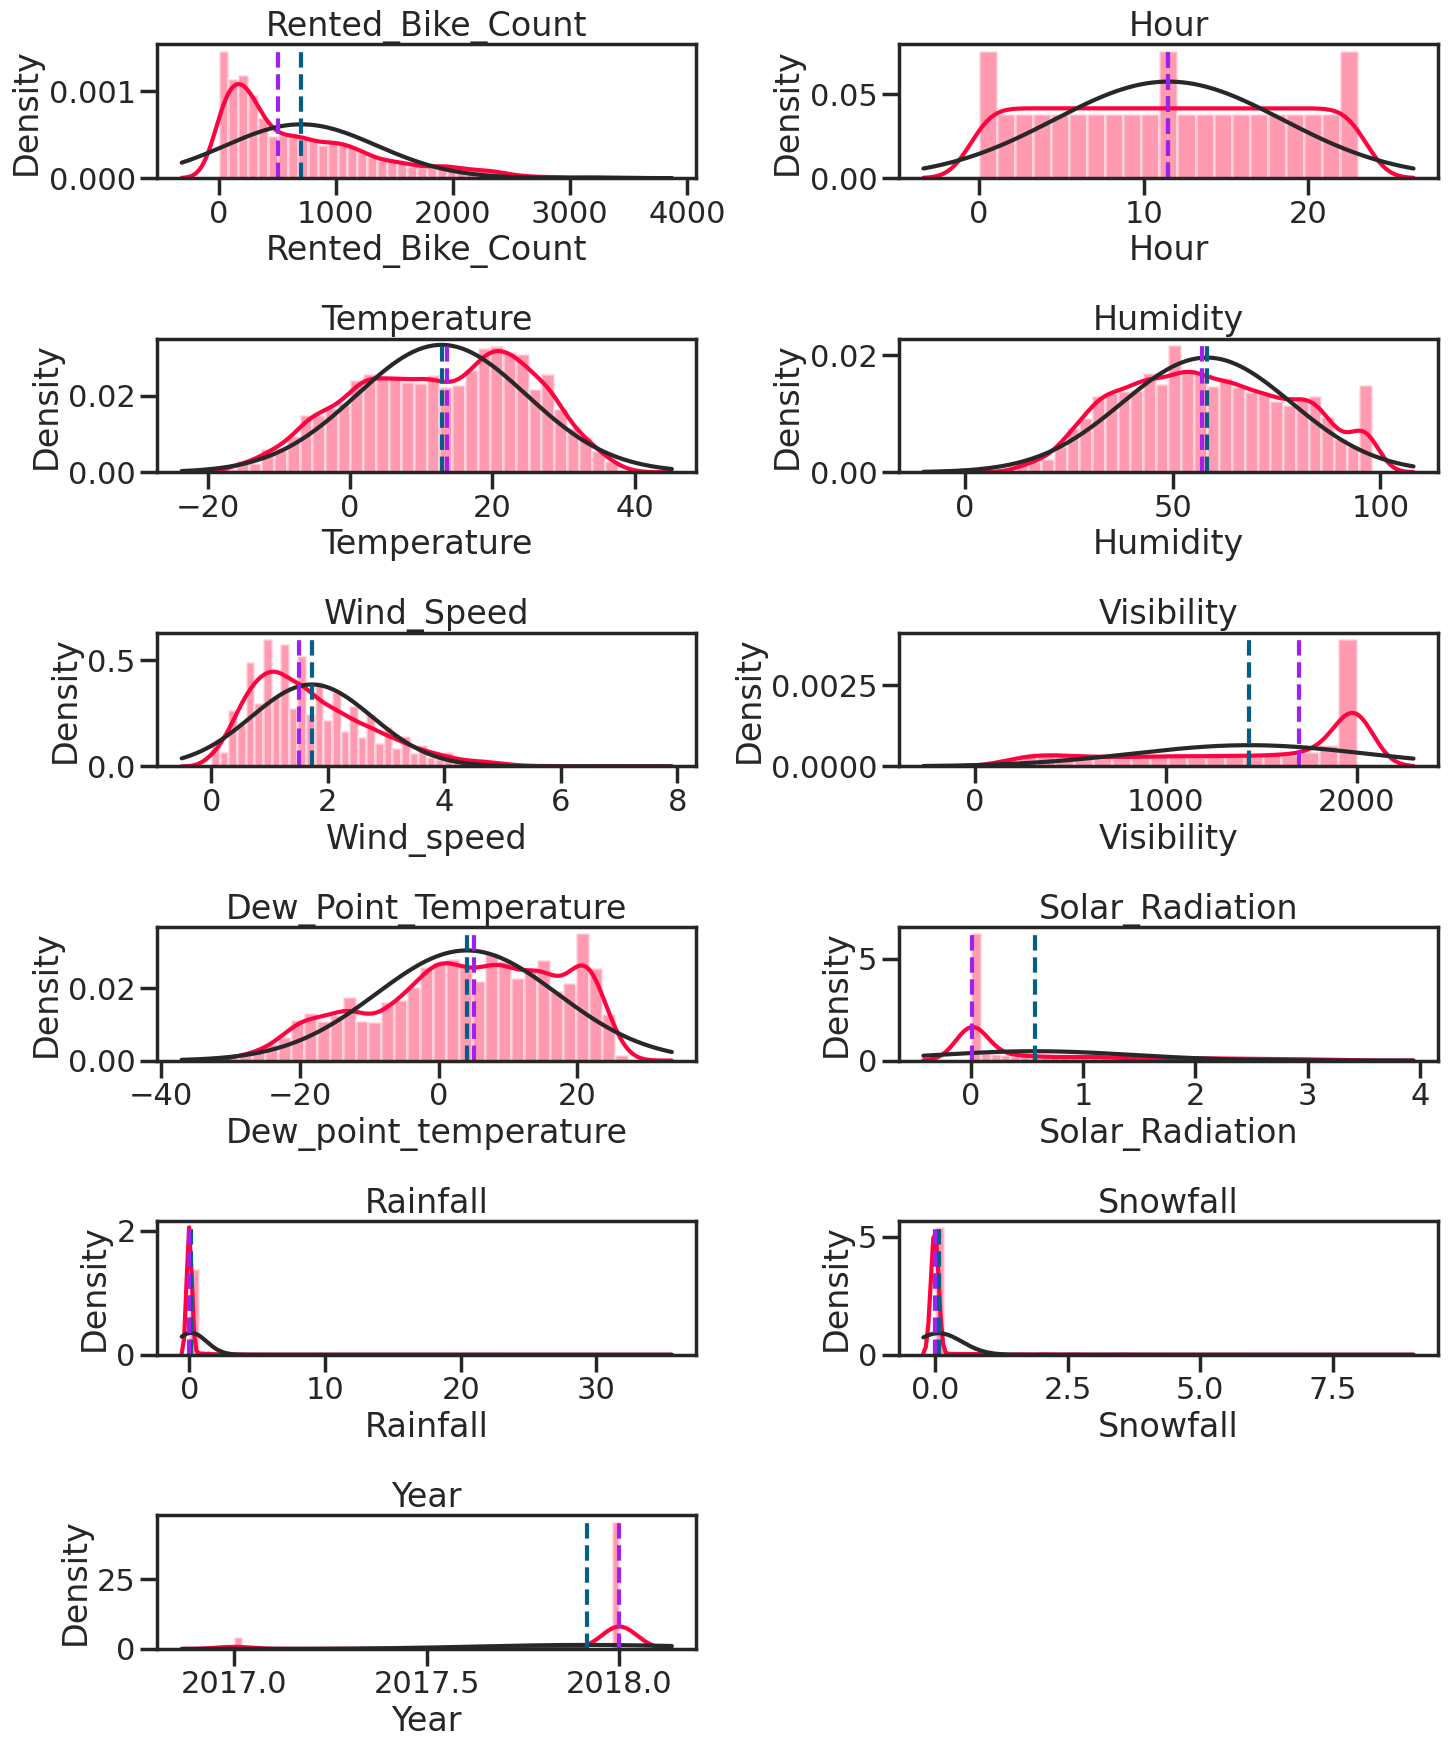

In [ ]:
#graph to analyse distribution of different numerical features
density_plot(df,num_feature)

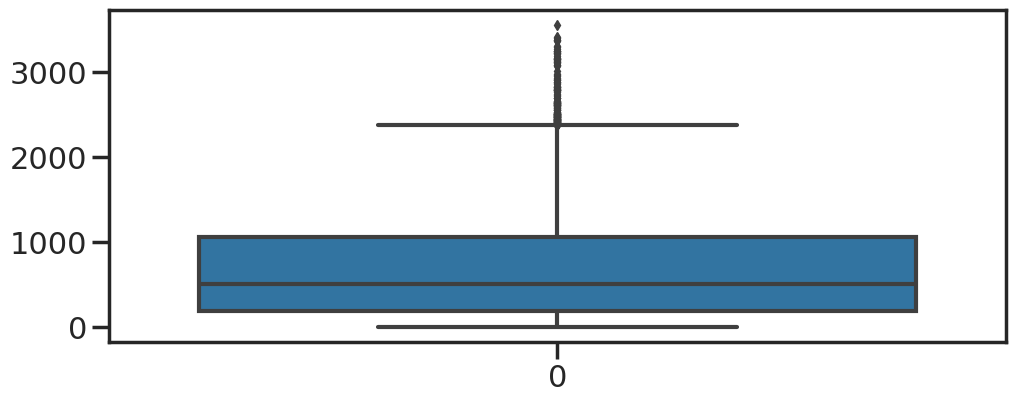

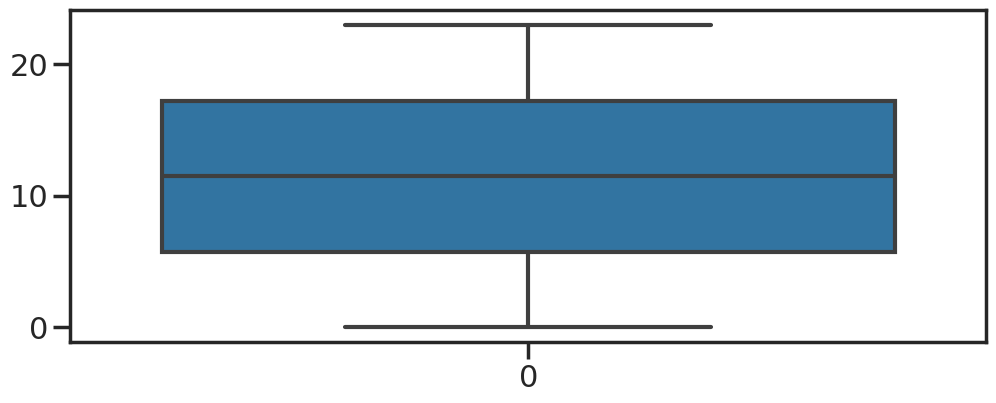

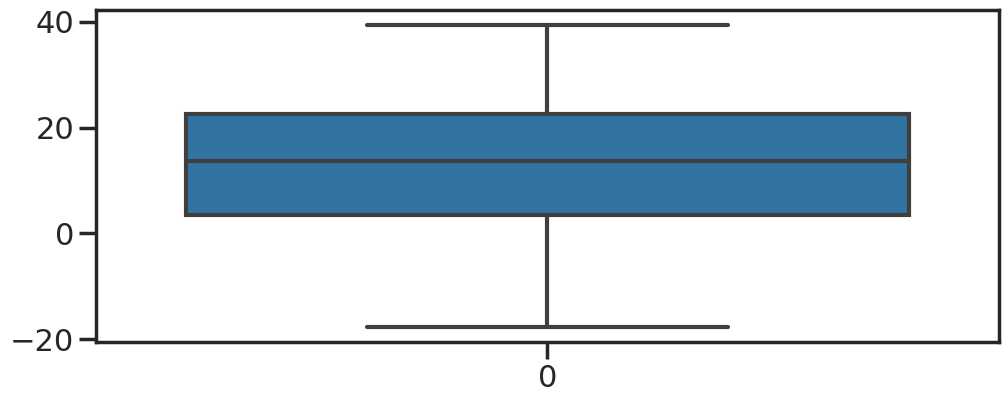

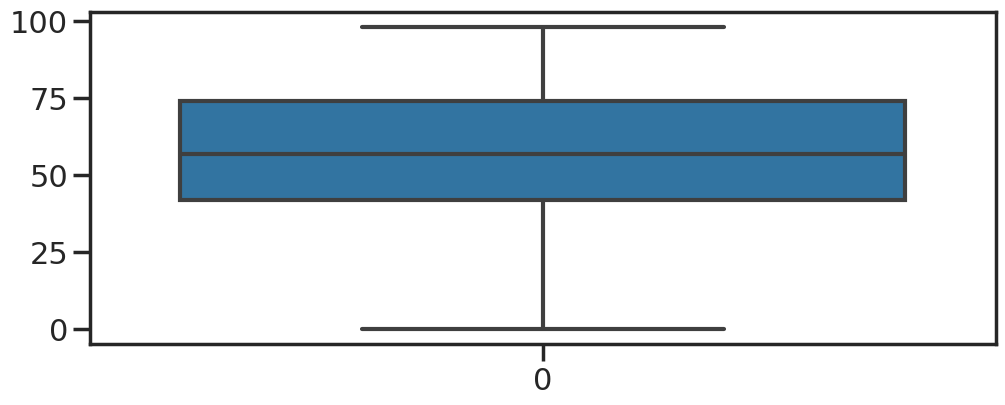

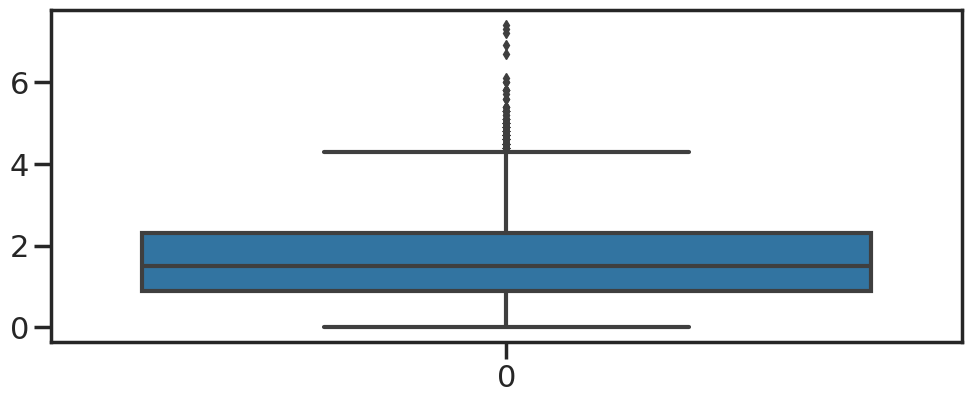

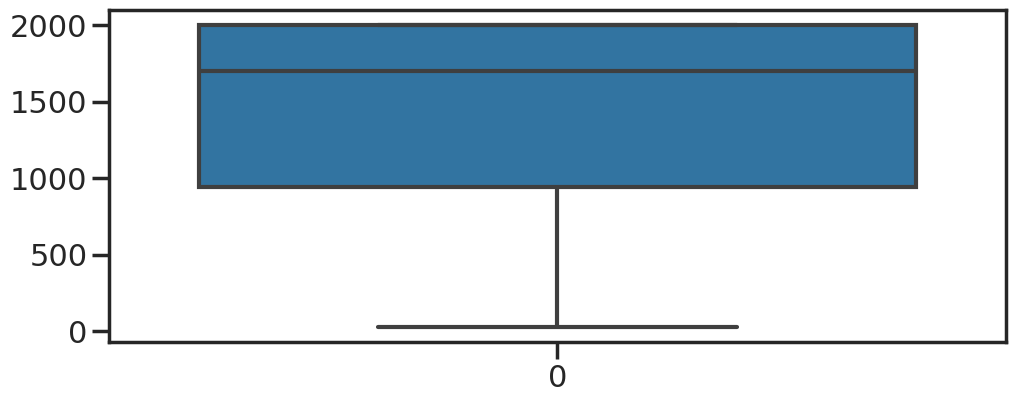

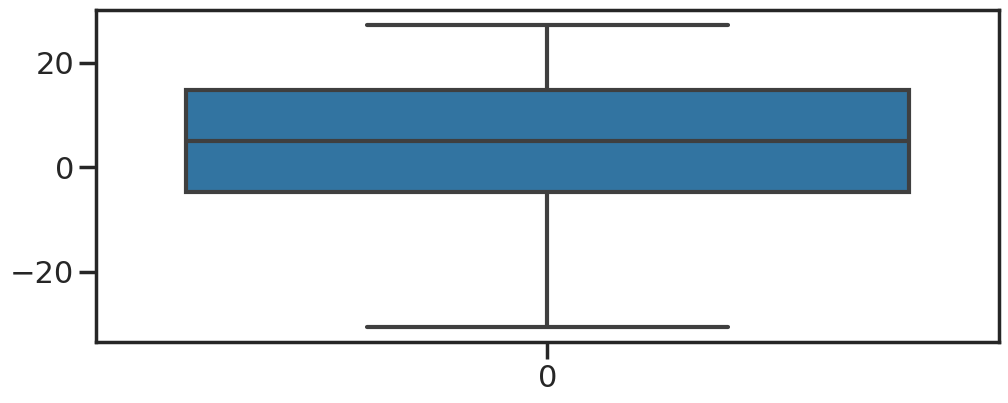

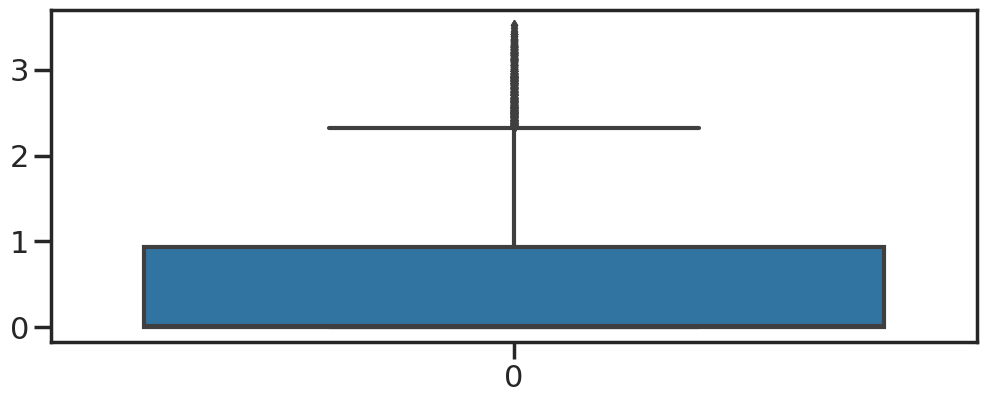

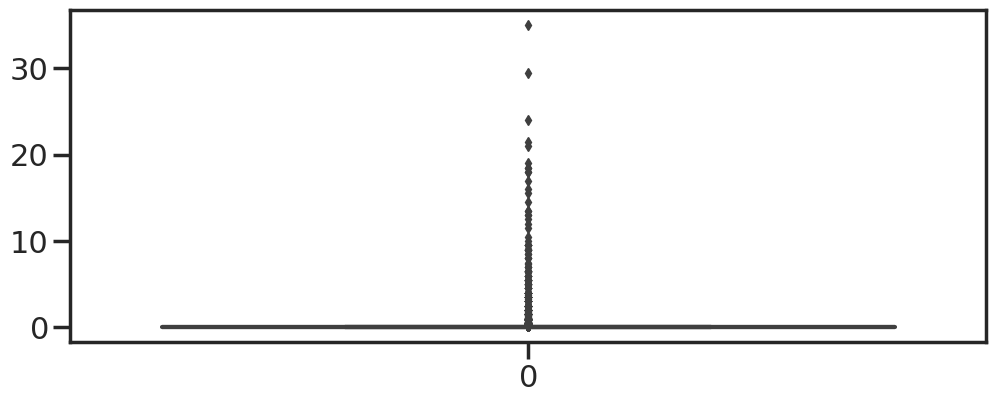

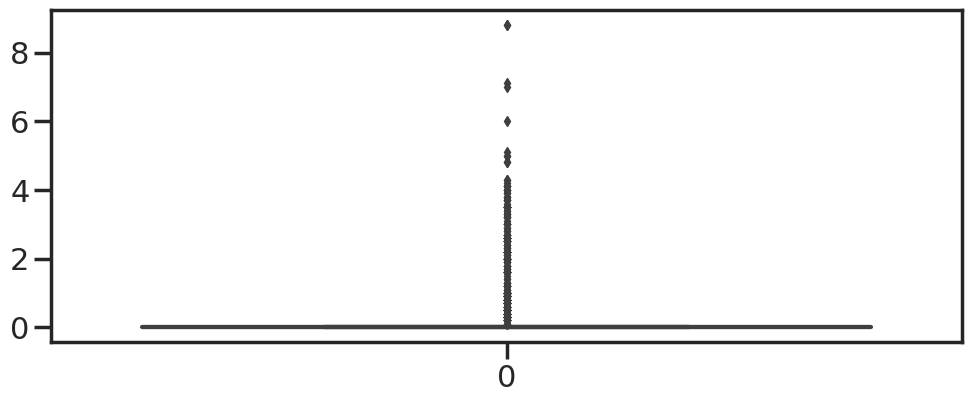

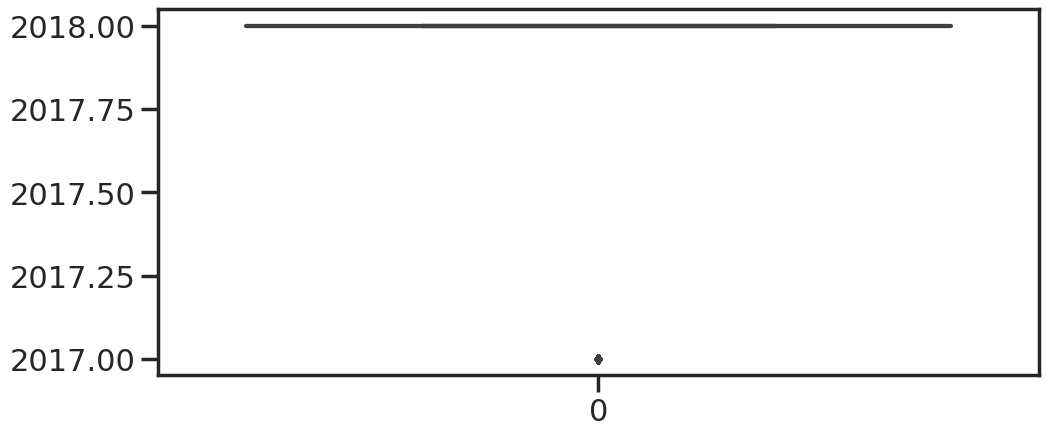

In [ ]:
#using box plot function checking outliers in numerical features
box_plot(df, num_feature)

#### Chart 1- Understanding the distribution

##### 1. Why did you pick the specific chart?

In order to understand the distribution for each feature, I plotted distplot along with its mean and median. Distplot is shows both histogram and kde plot and is best suited for continous data.

##### 2. What is/are the insight(s) found from the chart?

  **Right**/Positive Skewed Distribution: Mode < Median < Mean: **Rented_Bike_Count**, **Wind_speed**, **Solar Radiation**

  **No Skew**: Mean = Median = Mode : **Hour**, **Temperature**, **Humidity**,**Rainfall**,**Snowfall**

  **Left**/Negative Skewed Distribution: Mean < Median < Mode: **visibility**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In this context it can not define any business impact. It's done just to see the distribution of the column data over the dataset.

#### Chart 2- Visualization of Outliers

##### 1. Why did you pick the specific chart?

Box plot help in Visualization of outliers, distribution of median.

##### 2. What is/are the insight(s) found from the chart?

* In rented bike count feature there are few points accumulated above maximum range.
* Feature like snowfall and rainfall show sparse data as there are more number of values which is zero i.e., upto 75 quartile.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Box plot alone can not provide any business impact, plotted only to visulize distribution and understanding of anamolies.

###Bivariate

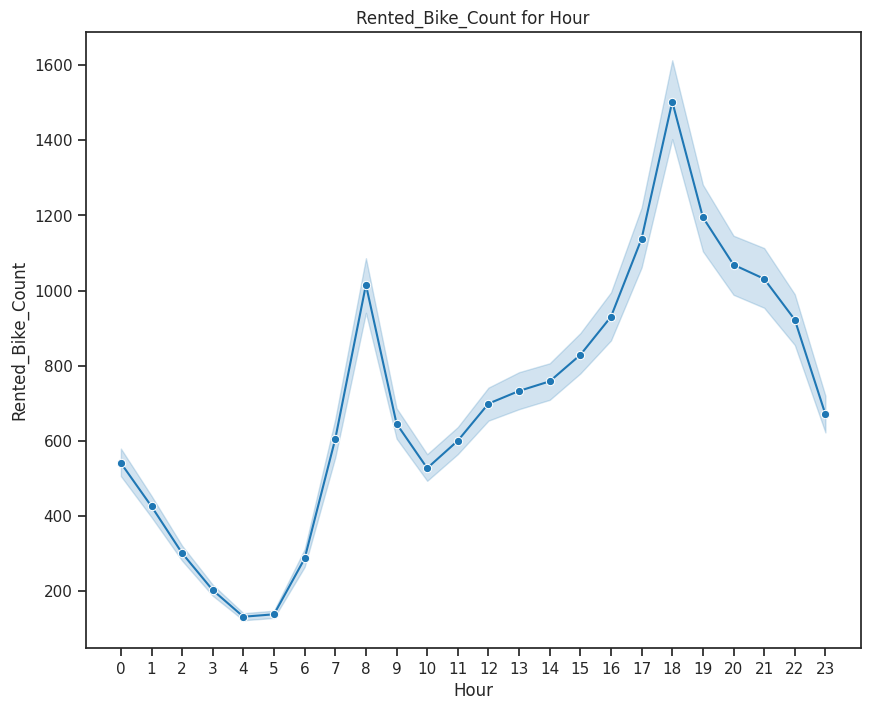

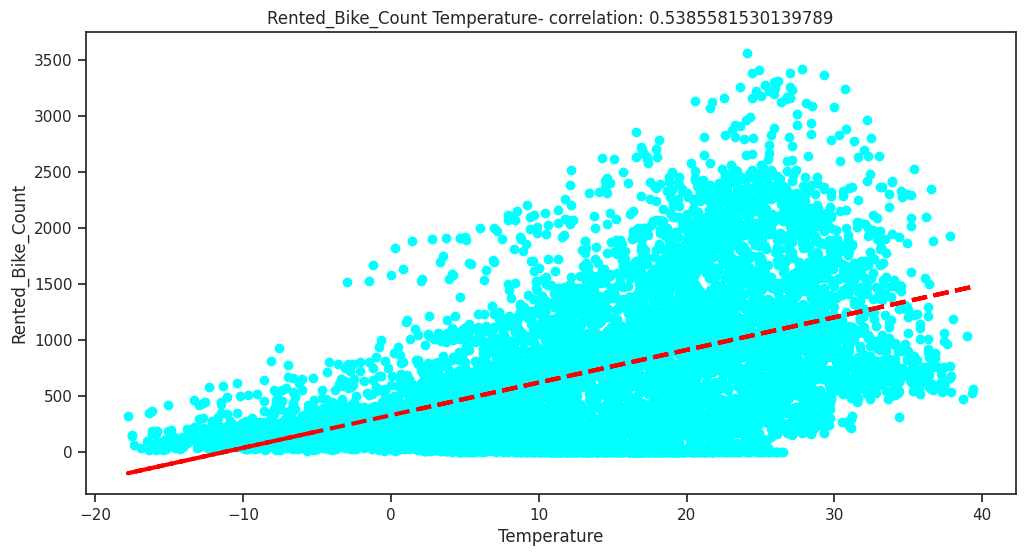

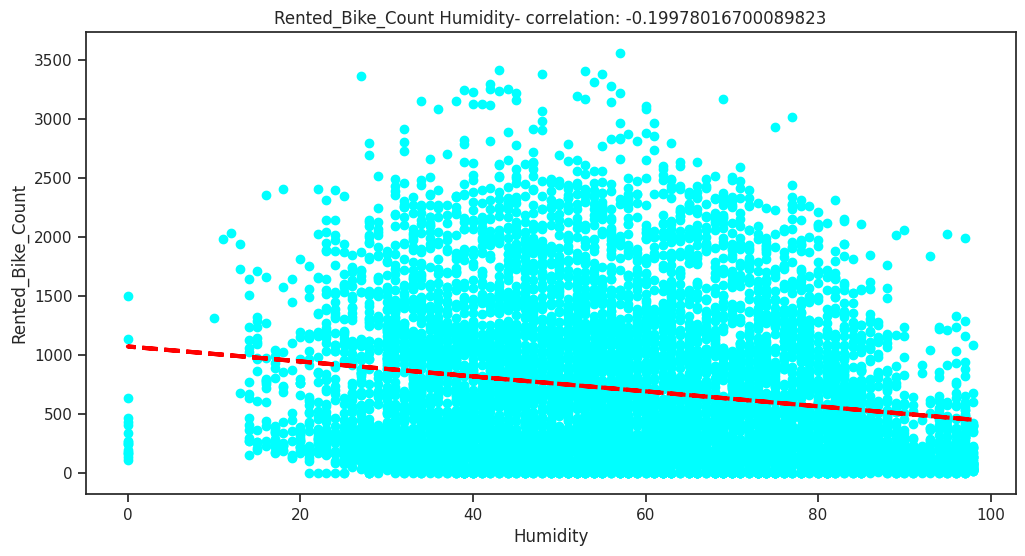

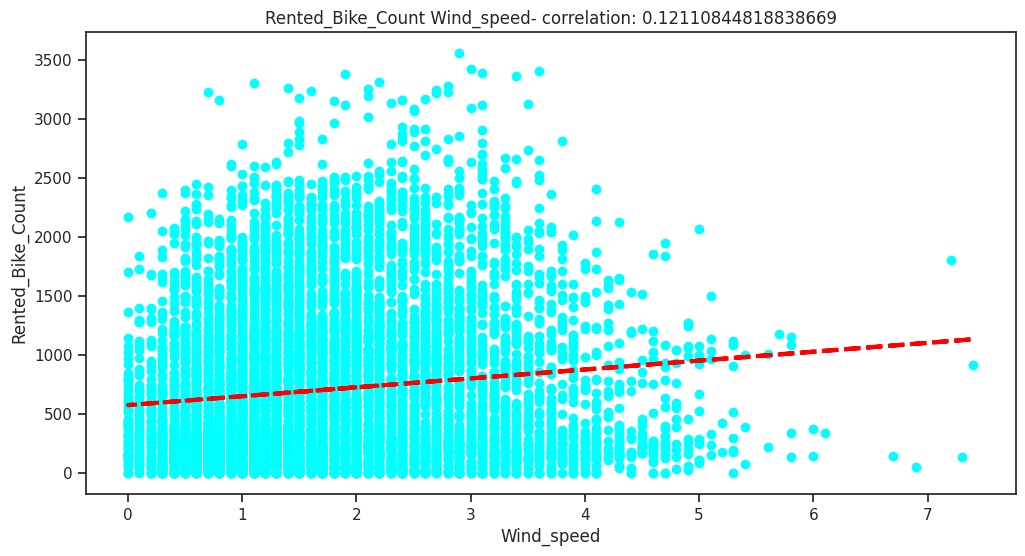

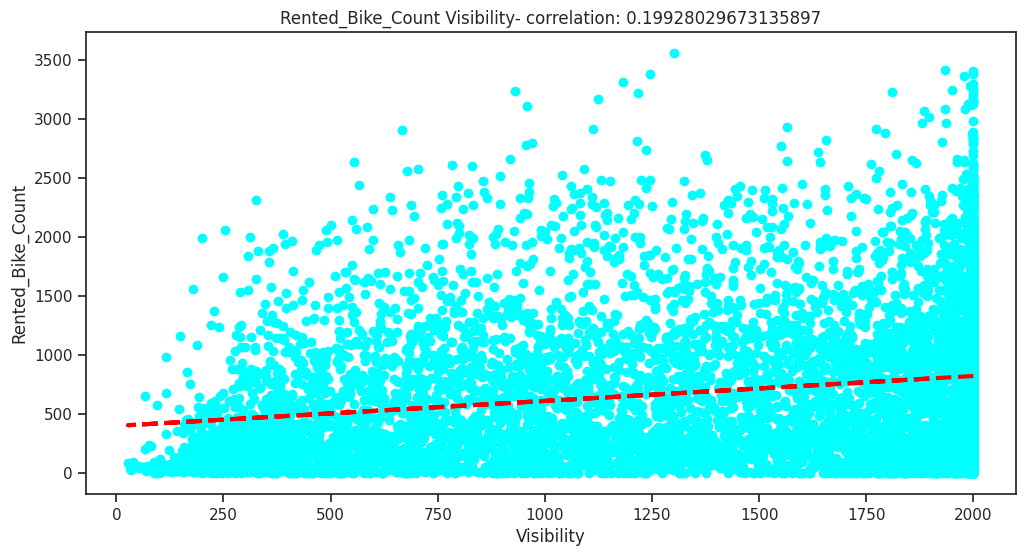

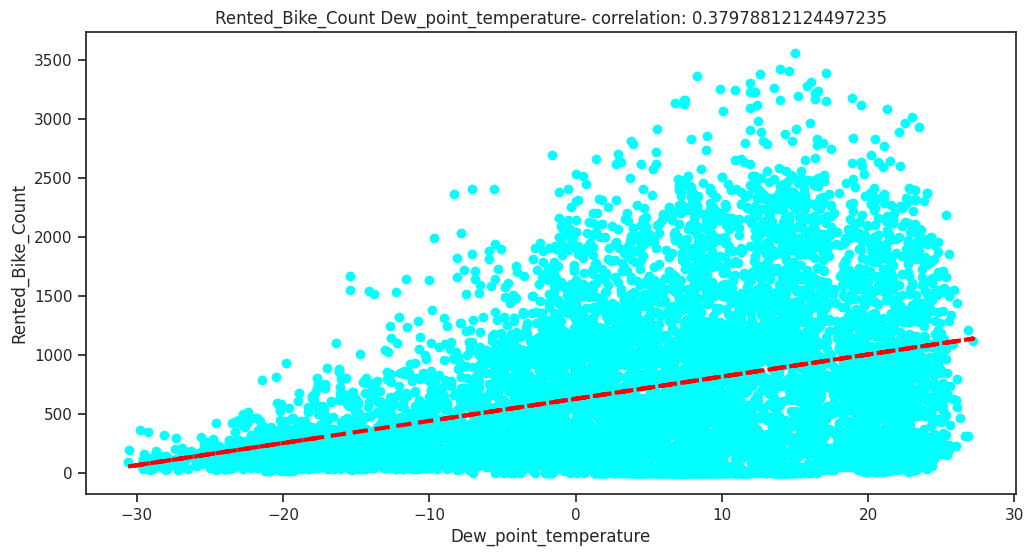

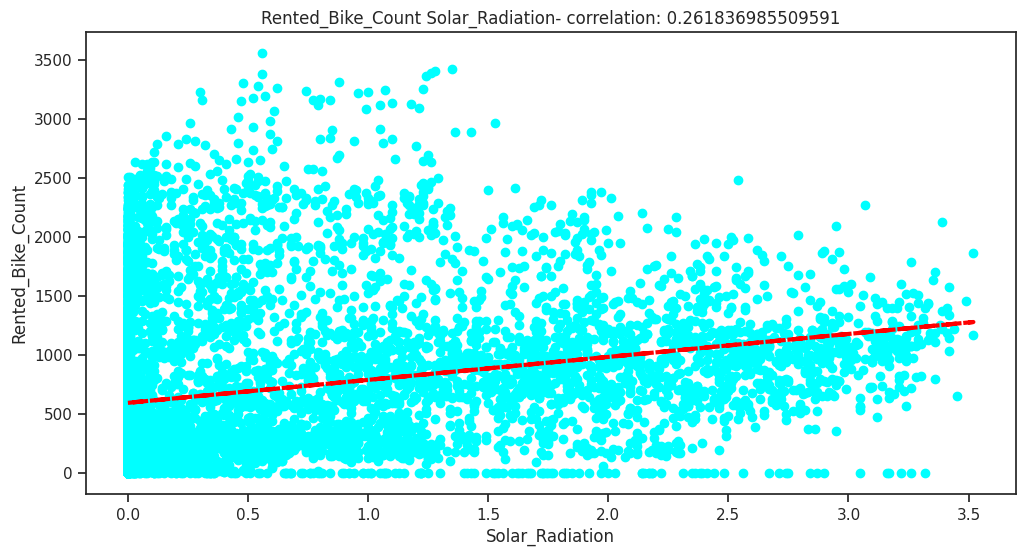

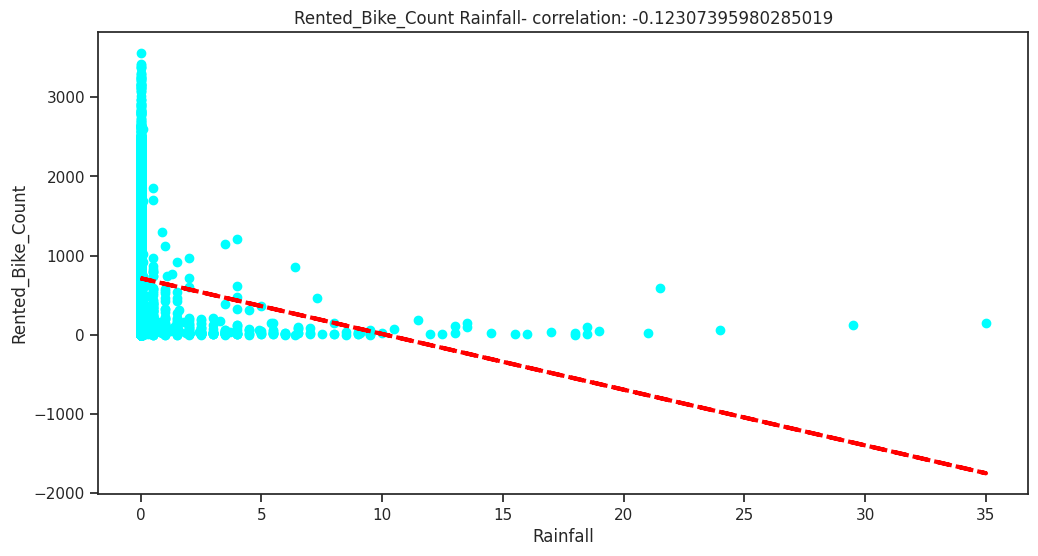

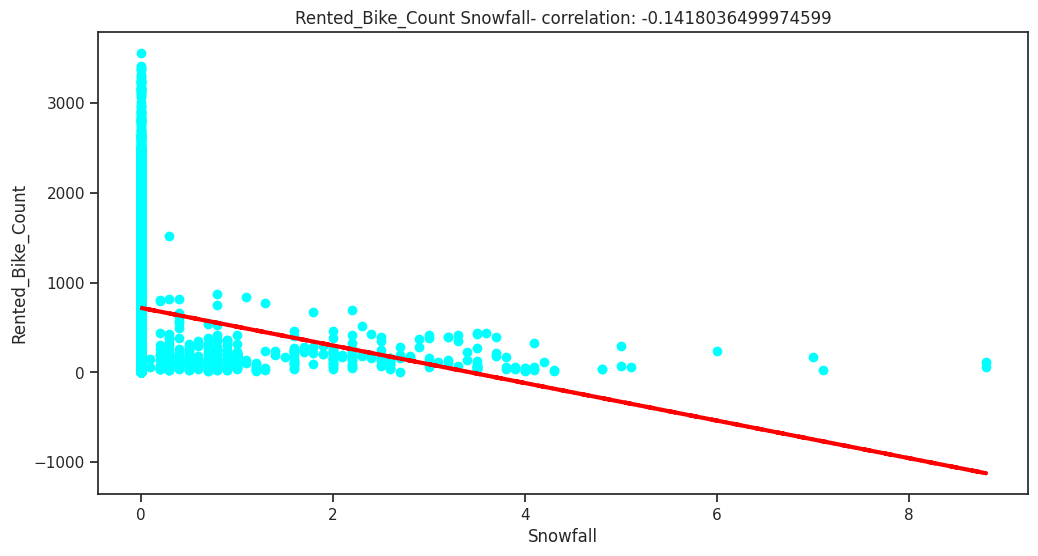

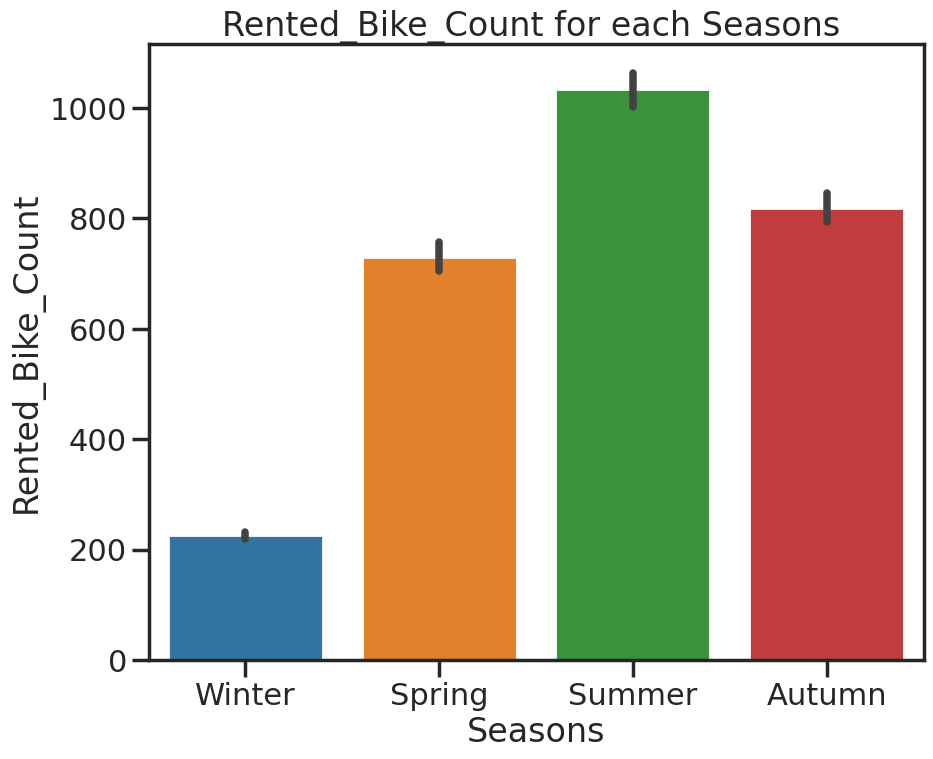

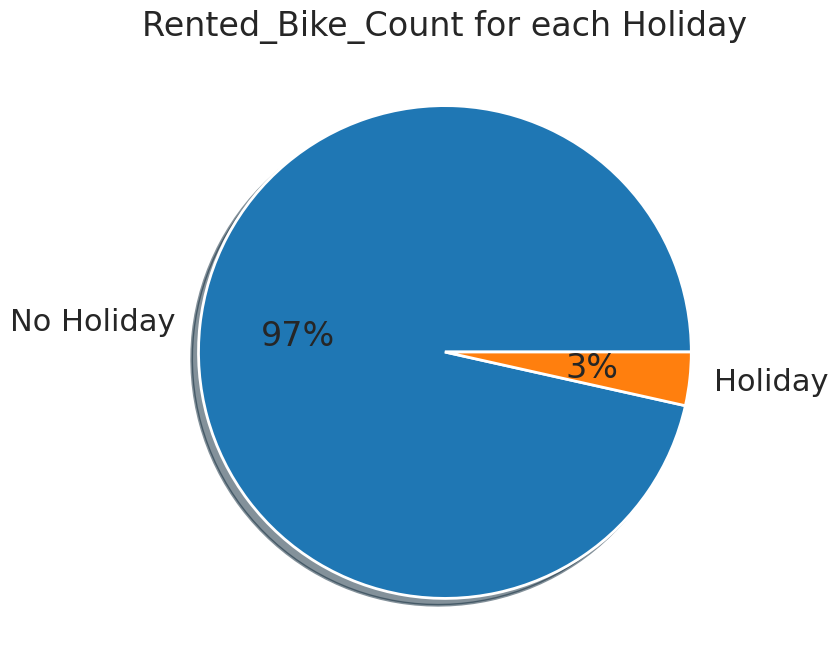

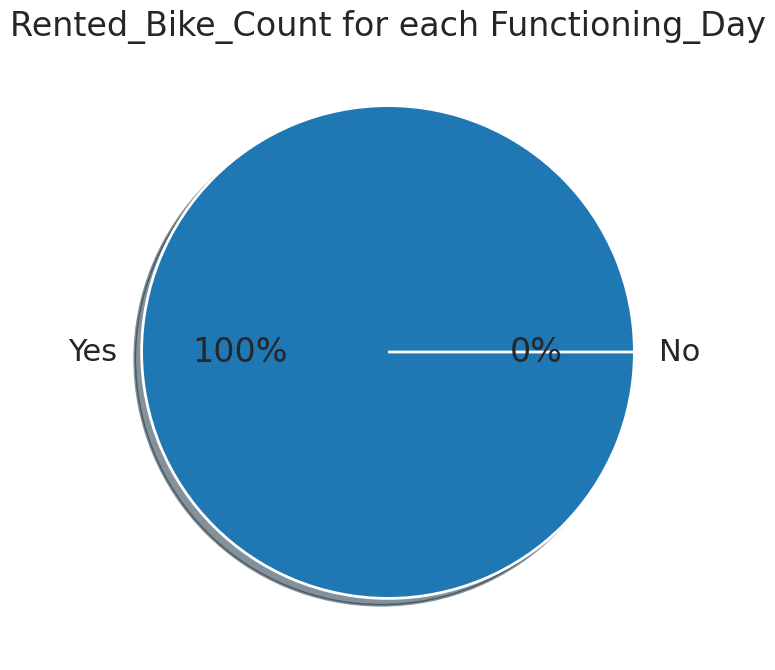

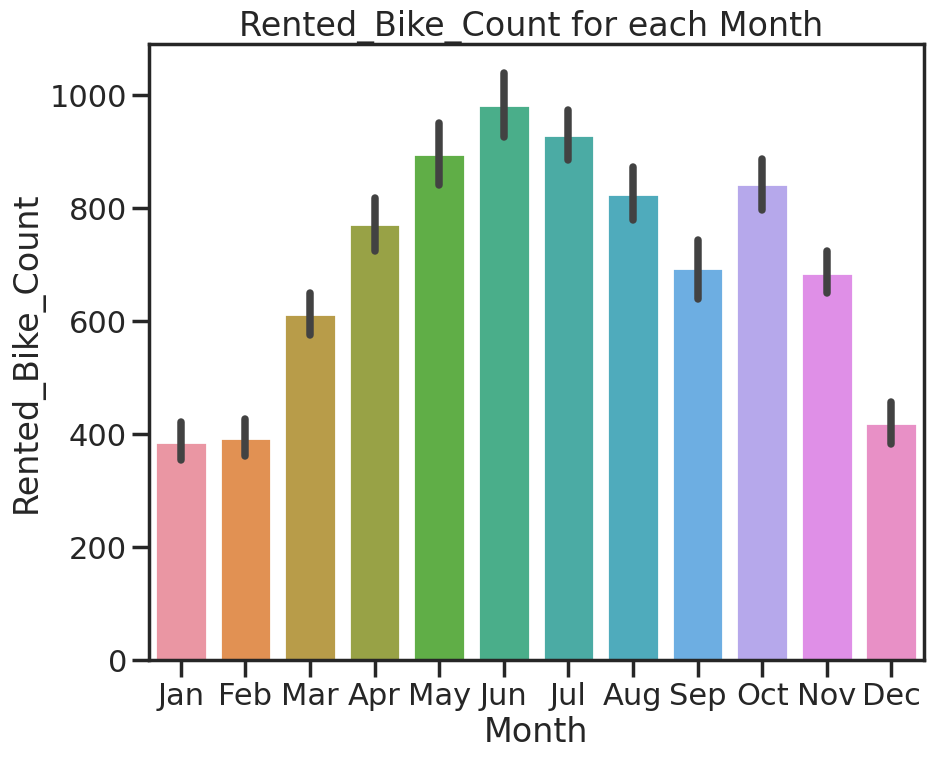

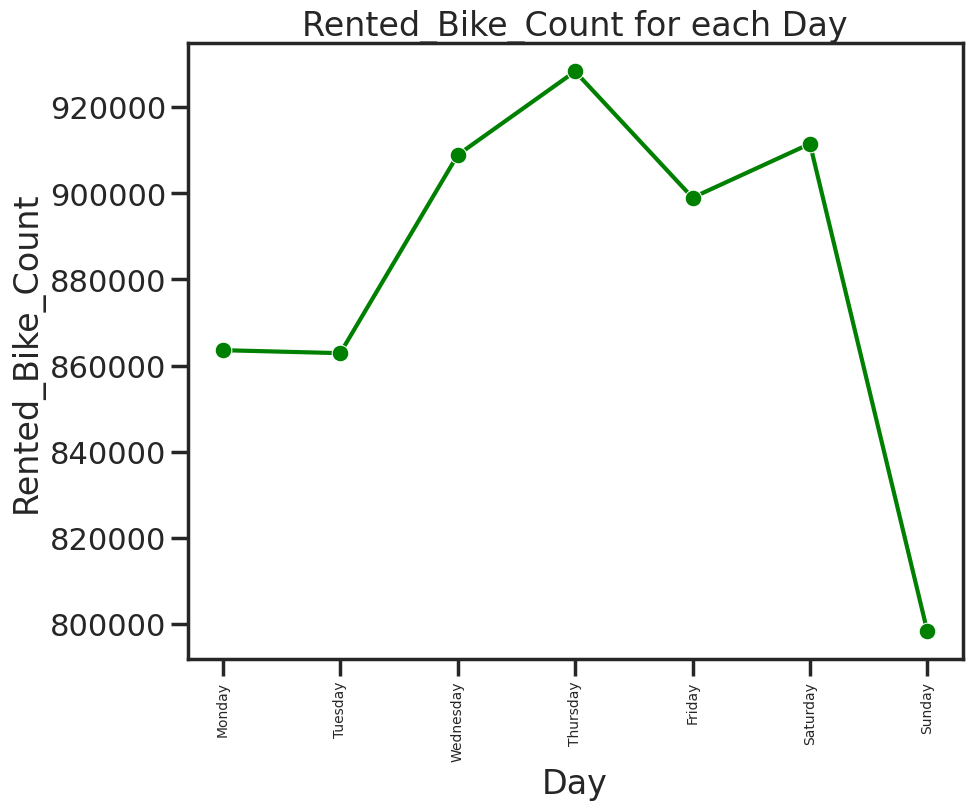

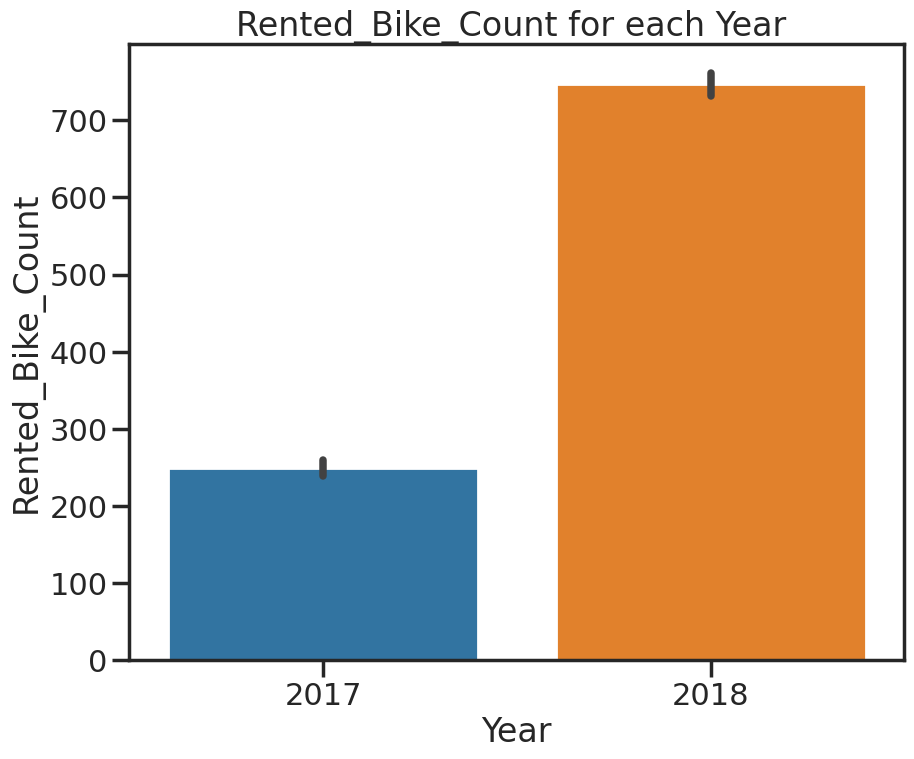

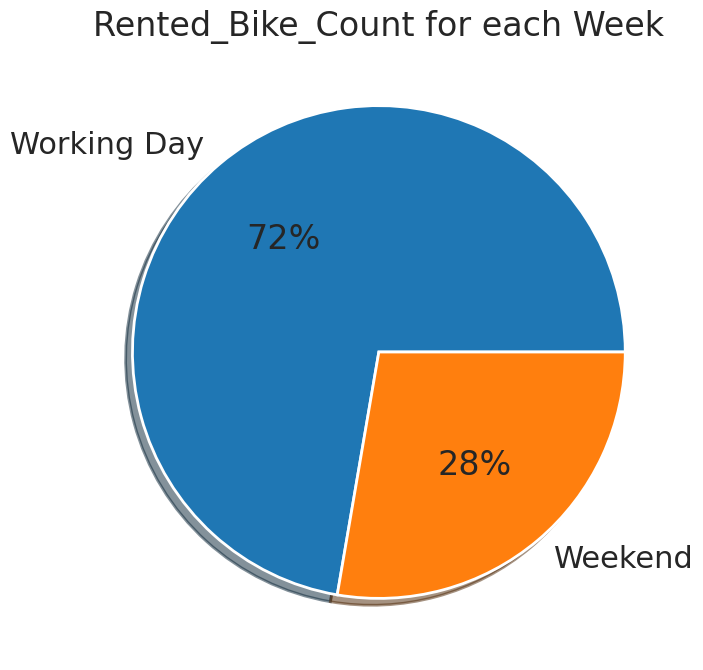

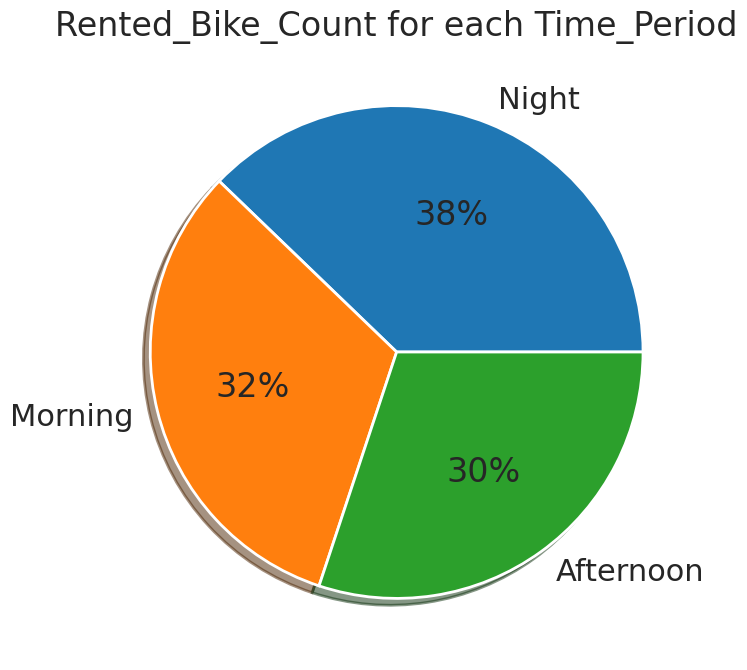

In [ ]:
#comparing different feature with bike count
for i in df.columns:
  if i == 'Rented_Bike_Count':
    pass
  #barplot
  elif i in ['Seasons','Month','Year']:
    sns.set_context('poster');
    plt.figure(figsize=(10,8));
    chart = sns.barplot(x=df[i], y=df["Rented_Bike_Count"]);
    plt.title(f"Rented_Bike_Count for each {i} ");
    print('='*120);
  #pie chart
  elif i in ['Holiday','Functioning_Day','Week','Time_Period']:
    grp = df.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count',
                                                                                    ascending = False)
    sns.set_context('poster');
    plt.figure(figsize=(10,8));
    palette_color = sns.color_palette('bright');
    chart = plt.pie(grp['Rented_Bike_Count'], labels= grp[i],shadow= True,autopct='%.0f%%');
    plt.title(f"Rented_Bike_Count for each {i}");
    print('='*120);
  #lineplot
  elif i == 'Day':
    workingdays = {'Day':['Monday','Tuesday','Wednesday','Thursday','Friday',	'Saturday',	'Sunday']}
    workingday = pd.DataFrame(workingdays)
    grp = df.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count',
                                                                                    ascending = False)
    new_df = workingday.merge(grp)
    sns.set_context('poster');
    plt.figure(figsize=(10,8));
    chart = sns.lineplot(data= new_df, x=i,y= 'Rented_Bike_Count', marker= 'o', color = 'green');
    plt.xticks(fontsize = 10, rotation = 90);
    plt.title(f"Rented_Bike_Count for each {i}");
    print('='*120);
  #lineplot for hour
  elif i == 'Hour' :
    sns.set_context('notebook');
    plt.figure(figsize=(10,8));
    chart = sns.lineplot(x=df[i], y=df["Rented_Bike_Count"],marker= 'o');
    plt.xticks(range(24))
    plt.title(f"Rented_Bike_Count for {i}");
  #scatterplot
  else:
    sns.set_context('notebook');
    fig = plt.figure(figsize=(12, 6));
    ax = fig.gca();
    feature = df[i]
    label = df['Rented_Bike_Count']
    correlation = feature.corr(label)
    chart = plt.scatter(x=feature, y=label,color='cyan');
    plt.xlabel(i);
    plt.ylabel('Rented_Bike_Count');
    ax.set_title('Rented_Bike_Count ' + i + '- correlation: ' + str(correlation));
    z = np.polyfit(df[i], df['Rented_Bike_Count'], 1);
    y_hat = np.poly1d(z)(df[i]);

    plt.plot(df[i], y_hat, "r--", lw=3);
    print('='*120)

  plt.show()

#### Chart - 3 Effect of Hour on Rented Bike Count (Lineplot and Pie chart)

##### 1. Why did you pick the specific chart?

Linetplot - I choose lineplot to plot hour and rented bike count for each hour because it helps in plotting for continous and vizualize the possible trend. Here rented bike count in the plot is represented by mean value and the shaded around the line shows the confidence interval which shows the uncertainity in the mean estimate i.e., it helps to visualize the range of values within which the true mean is likely to fall, based on the sample data. (* Note : The width of the confidence interval is determined by the sample size, the variance of the data, and the desired level of confidence.For example, if the sample size is large and the data are very consistent (i.e. low variance), then the confidence interval will be narrow, indicating that the mean estimate is very precise. On the other hand, if the sample size is small or the data are highly variable, then the confidence interval will be wider, indicating that the mean estimate is less precise.)

Pie chart - In order to show different percentage of rented bike count around different time period of the day - morning (0-12), afternoon(12-18) and night(18-0). Pie chart help in better understanding of different proportion of data.

##### 2. What is/are the insight(s) found from the chart?

Lineplot for hour and rented bike count shows that:
* Demand for bike is more during 8-10 in morning and 18-20 in night.
* Bike demand from midnight start decreasing till 4 in morning then gradually increase and comes at peak in night.

Pie chart for total rented bike count and time period shows:
* 38% of demand was in night, 32% in morning and 30% in afternoon.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hour of the day definetly plays important role for any business. It help in understanding the behaviour of customer engagement and how company should be prepared to deal with the situation.
In this case since the demand is more is more in night and morning specifically to 8-9 and 18-20, stable supply to meet demand during those will increase revenue whereas shortage will cause negative growth.

#### Chart - 4 Effect of different day of week (Lineplot and Pie chart)

##### 1. Why did you pick the specific chart?

Lineplot - Lineplot helps in time series analysis to learn the trend.

Pie chart - As the day of the week was divided into working (Monday-Friday) and weekend (Sat- Sun), pie chart help in understanding the percentage total rented bike count for the two category.

##### 2. What is/are the insight(s) found from the chart?

Lineplot for Day and Total Rented bike count shows:
* There is a increase in demand from mondat to thrusday then it lowers on friday, later increases on satuerday and shows least demand in sunday.

Pie Chart - It shows that 72% bike demand is during working day and 28% bike demand is on weekend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, based on the activity it is necessary to maintain stable supply for most demanding day as it will directly affect revenue in case of shortage. Based on the demand if company will not fulfill criteria it will not only have negative brand effect but also low retention in customers.

#### Chart - 5 Effect of Month, Season and Year on Rented Bike Count (Barplot)

##### 1. Why did you pick the specific chart?

I used this chart because it helps to compare between different categories.

##### 2. What is/are the insight(s) found from the chart?

Month and rented bike count shows:
* Bike count increase from January till June then there is a small decrease and again rise in October and gradually decrease till December.

Season and rented bike count shows:
* Demand for bike count is more in summer and lower in winters and with season graph it is also justified.

Year and rented bike count:
* There is a increase in demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, based on the above insight it will help in customer retention and growth.

Since data available is only for two year, therefore year itself can not have any much of impact on business, however it shows increase which is a sign of market capture for a new business.

#### Chart - 6 Effect on Functioning day and Holiday (Pie Chart)

##### 1. Why did you pick the specific chart?

Both functioning day and holiday represnt categorial data with binary answers i.e., yes or no and that's why used the pie chart to understand different allocation of each answer.

##### 2. What is/are the insight(s) found from the chart?

Pie chart of Functioning day shows:
* There are 0 rented bike count on non funcitoning day which means to accomplish demand company should focus more on functioning day.

Pie chart of Holiday shows:
* 97% of bikes are rented when there is no holiday and 3% on holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since 100% of the profit are generated on functioning day, company should focus more on increasing functioning hours or day as it will directly generate more traffic for business.

Similarly, holiday always results in reduced foot traffic which can also be seen in the graph how only 3% of the demand is generated on holiday, in order to maintain the profit ratio on holiday slight increase in price could balance profit ratio. Since we do not know exact price point from dataset, it will hard to say what amount to increase and how price affect the demand, will increase in price can lead to negative growth.

#### Chart - 7 Effect of Environment Factors on Rented Bike count (Scatter plot with correlation)

##### 1. Why did you pick the specific chart?

Scatterplot is best when we need to vizualize relationship between two variable.

##### 2. What is/are the insight(s) found from the chart?

* Snowfall and rainfall show negative linear relation with rented bike count.
* Bike demand is more when there is low solar radiaiton.
* When there is high visibility, demand is more.
* Dew point and humidity shows increase in demand when they are present in moderate amount.
* Less windspeed is prefered for maximum demand.
* Average temperature of 20-35 show maximum demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Environmental factors play an important role as the business solely depends upon them for its operations and success.However we can not control these natural environment, therefore based on the demand and how it alter it, company should be alet with wether forecasting to arrange suitable demand based on daily weather.

These natural environment factors can significantly impact the demand for bike rentals by making it less appealing or unsafe to ride a bike.

#### Chart - 8 Box plot for Categorial Feature with respect to Bike Demand


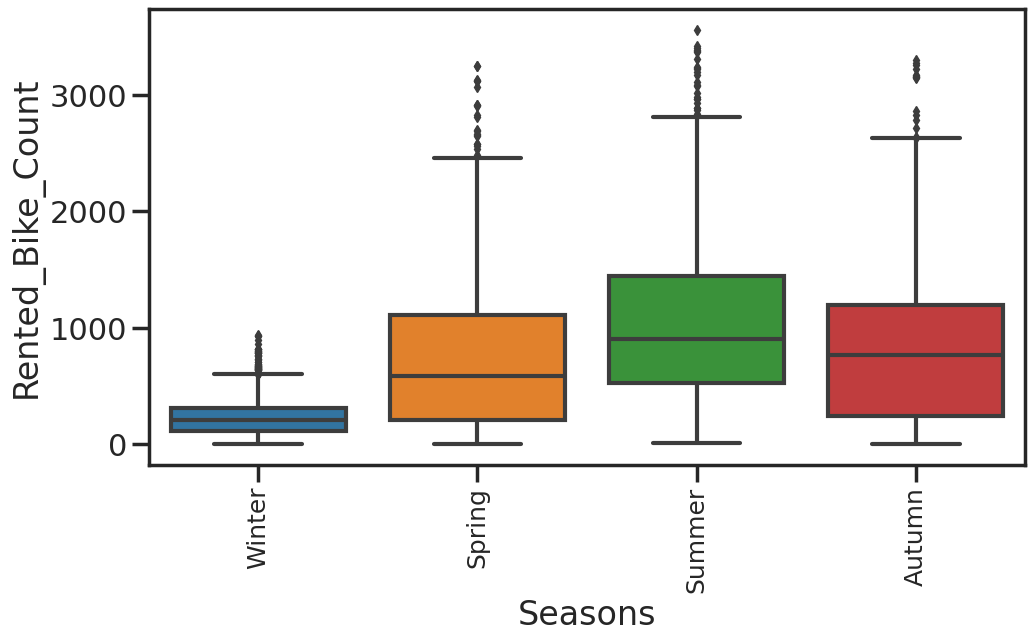

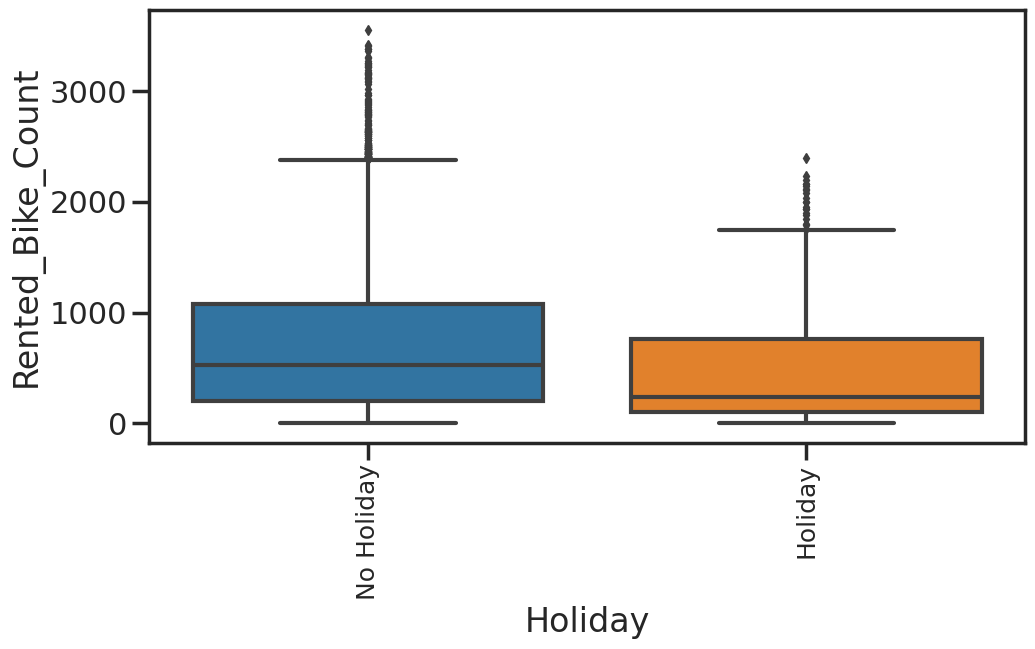

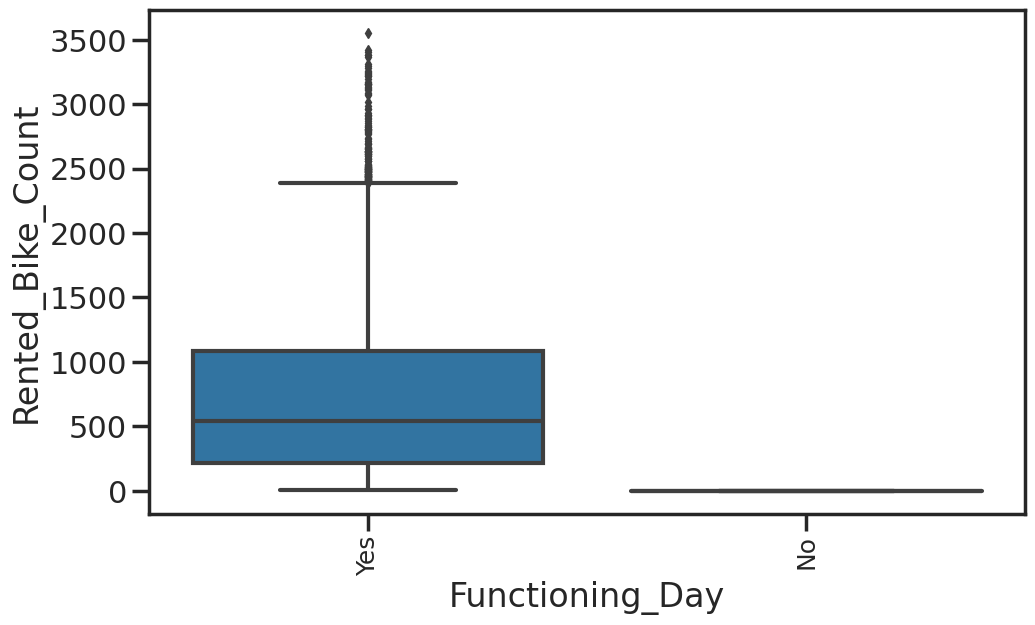

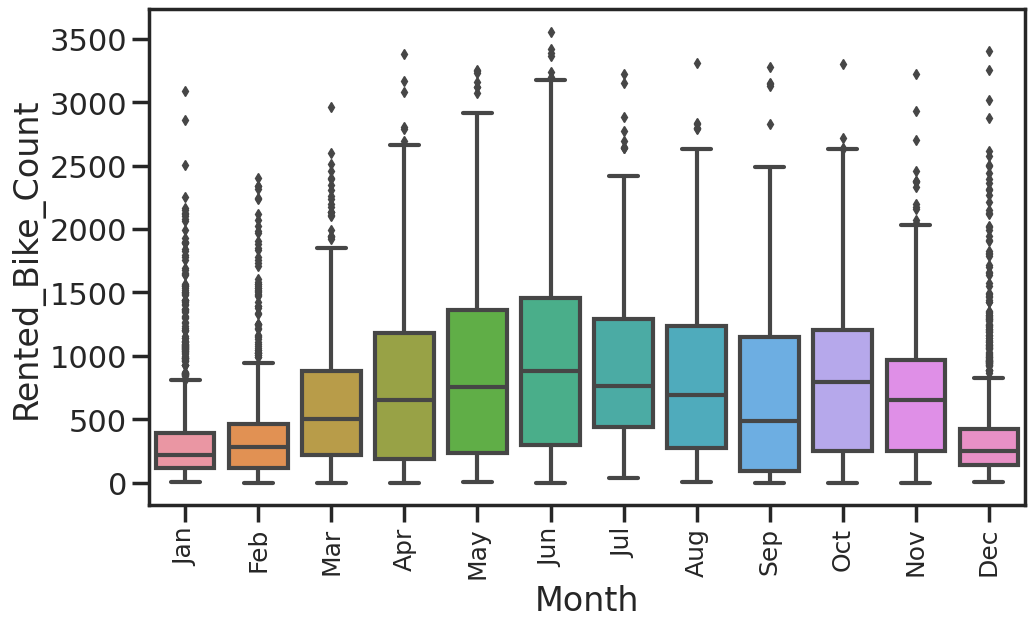

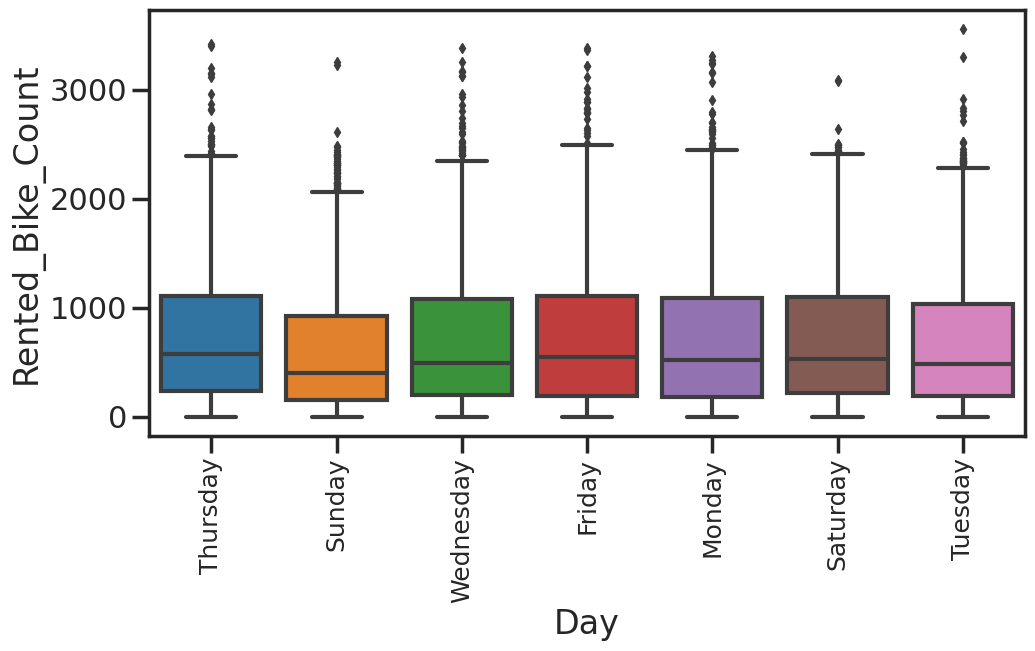

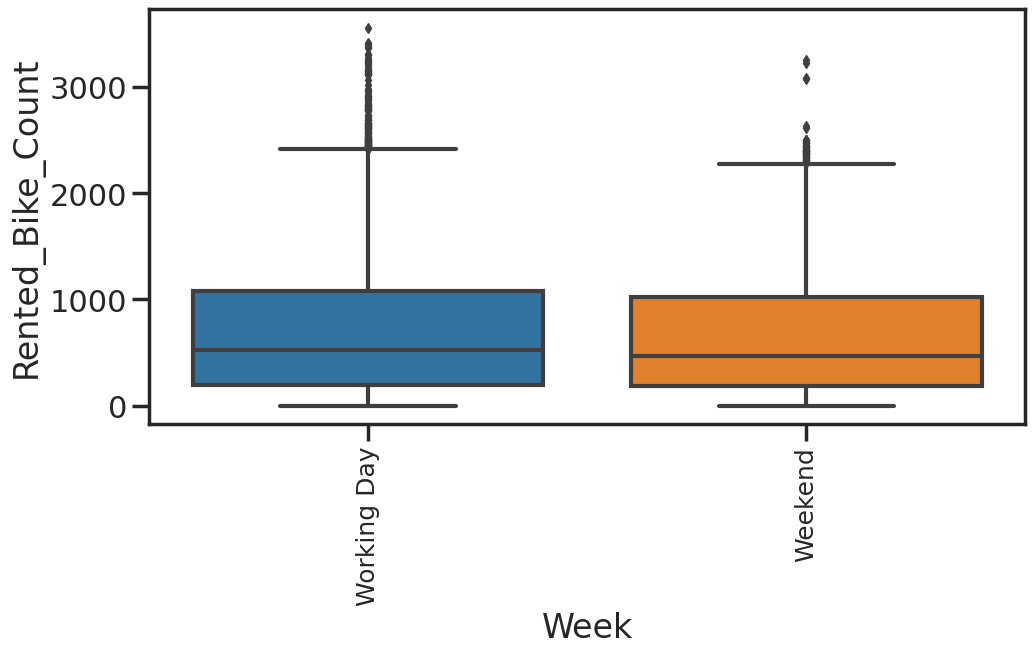

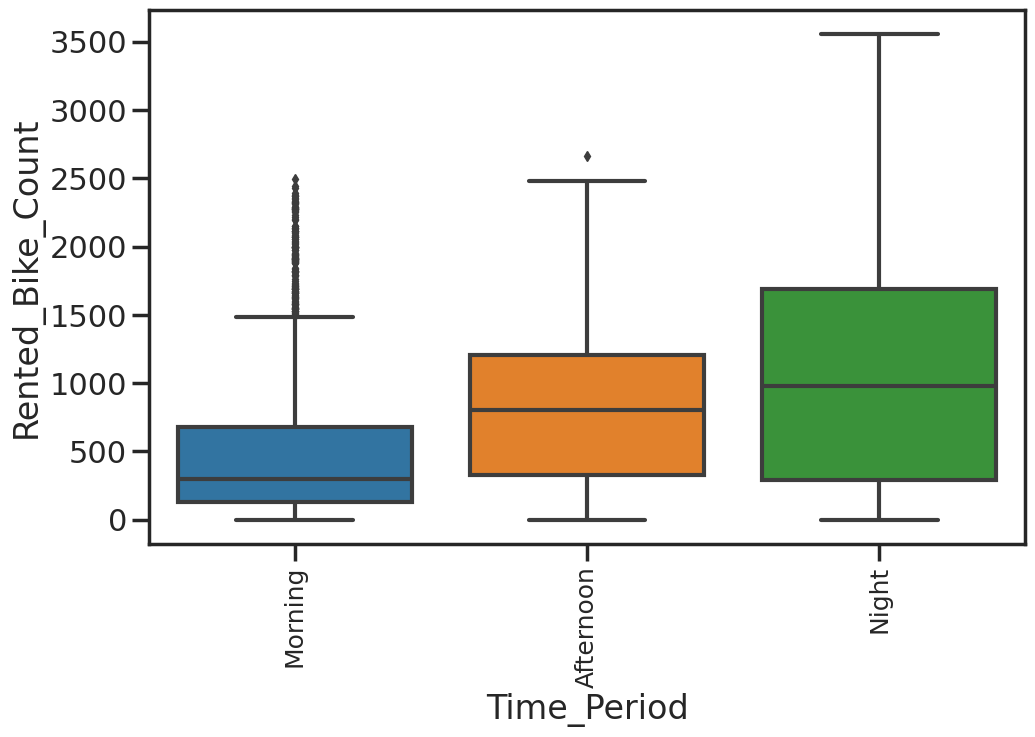

In [ ]:
# Chart - 8 visualization code
box_plot(df,cat_feature)

##### 1. Why did you pick the specific chart?

Box plots are helpful in learning about outliers and to determine where the majority of the points land at a glance.

##### 2. What is/are the insight(s) found from the chart?

Few rented bike count are above the maximum point.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Box plot can not show impact on business, used only to learn about distribution.

###Multivariate

#### Chart - 9 Analyzing how rented bike count if affected every Hour with respect to other features.

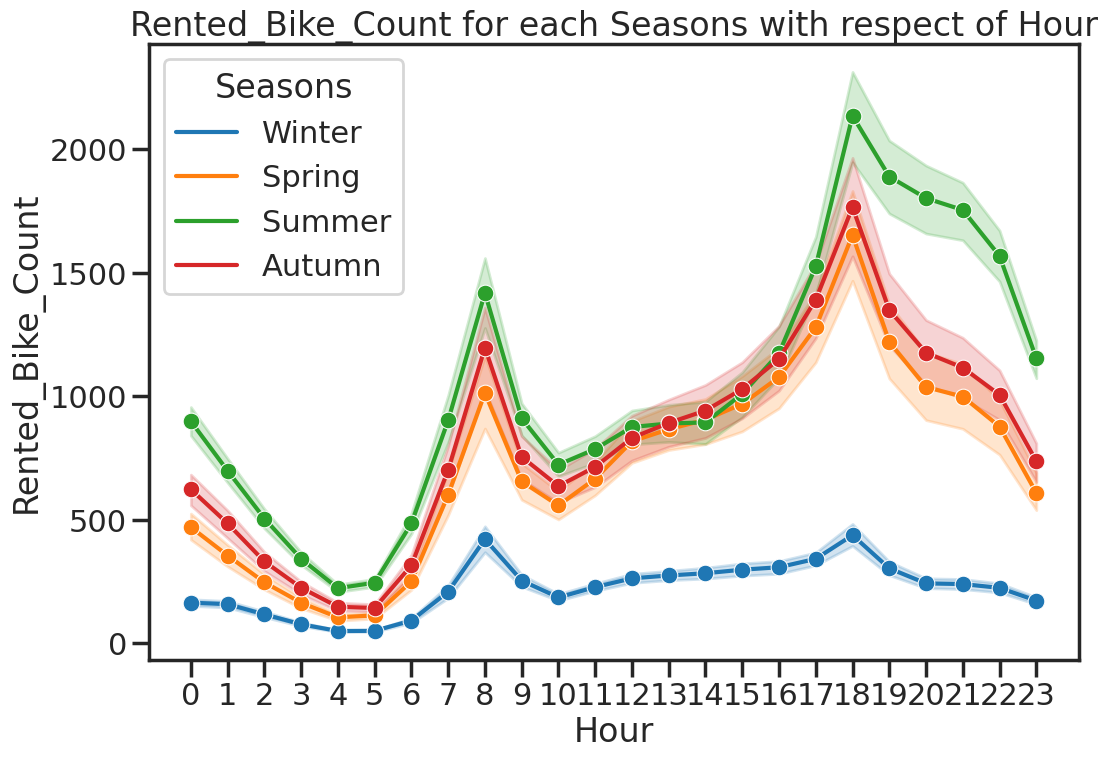

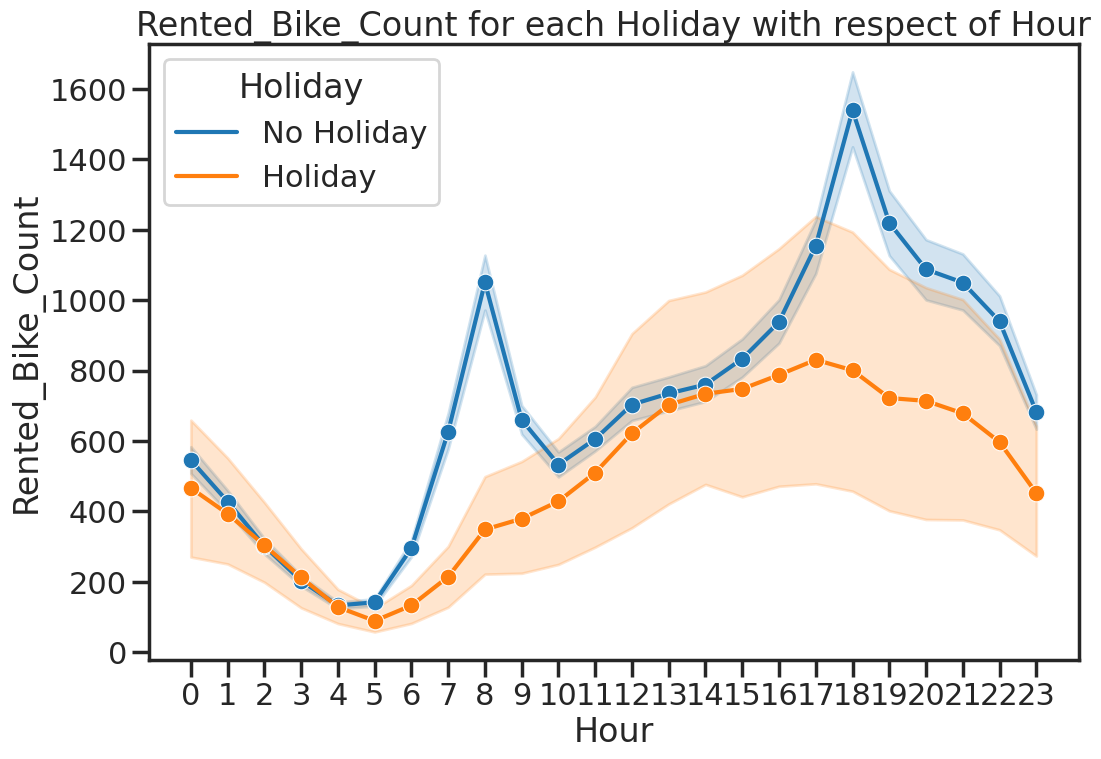

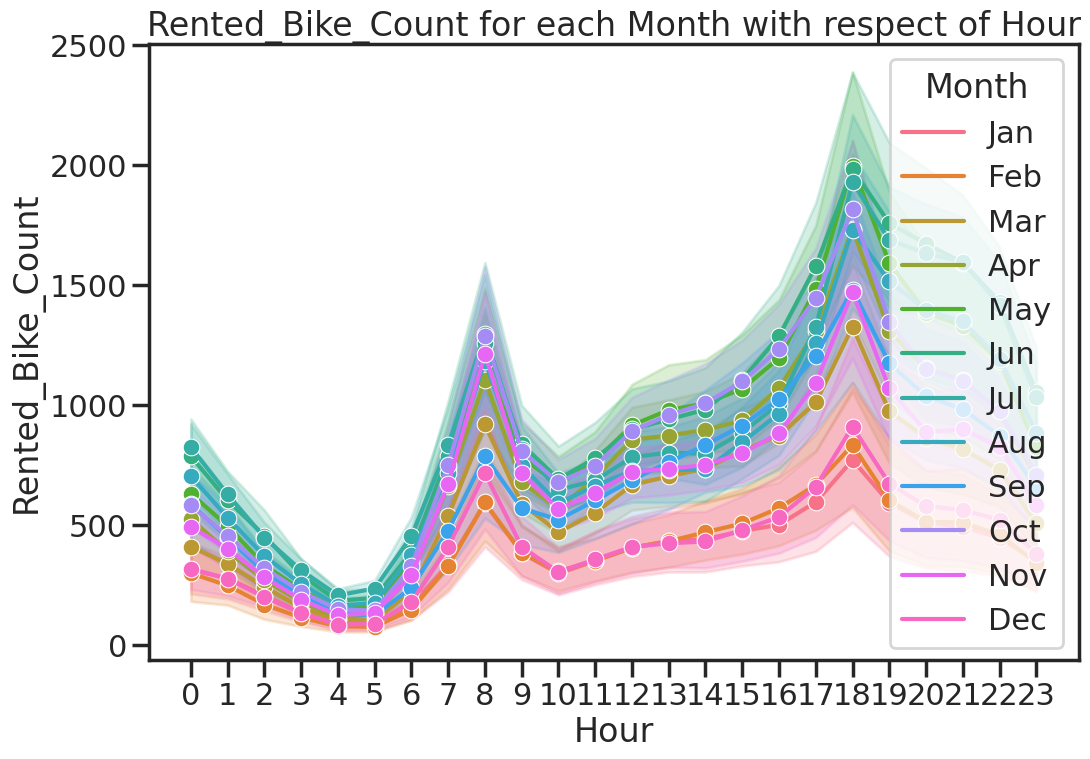

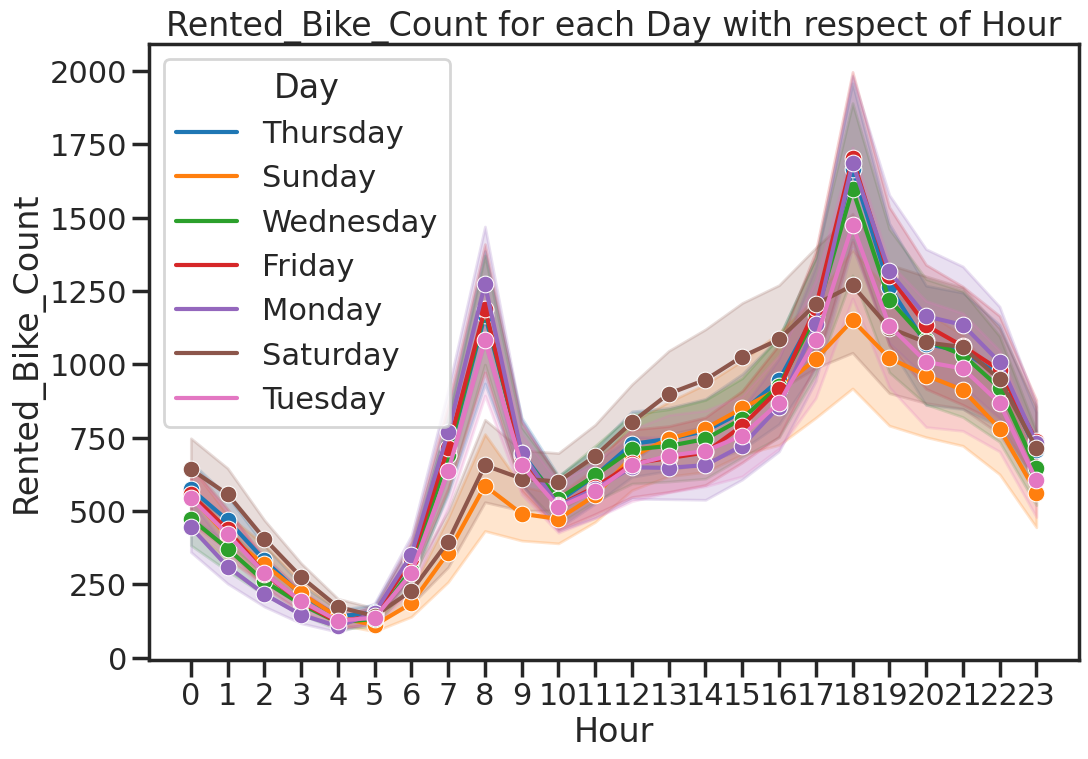

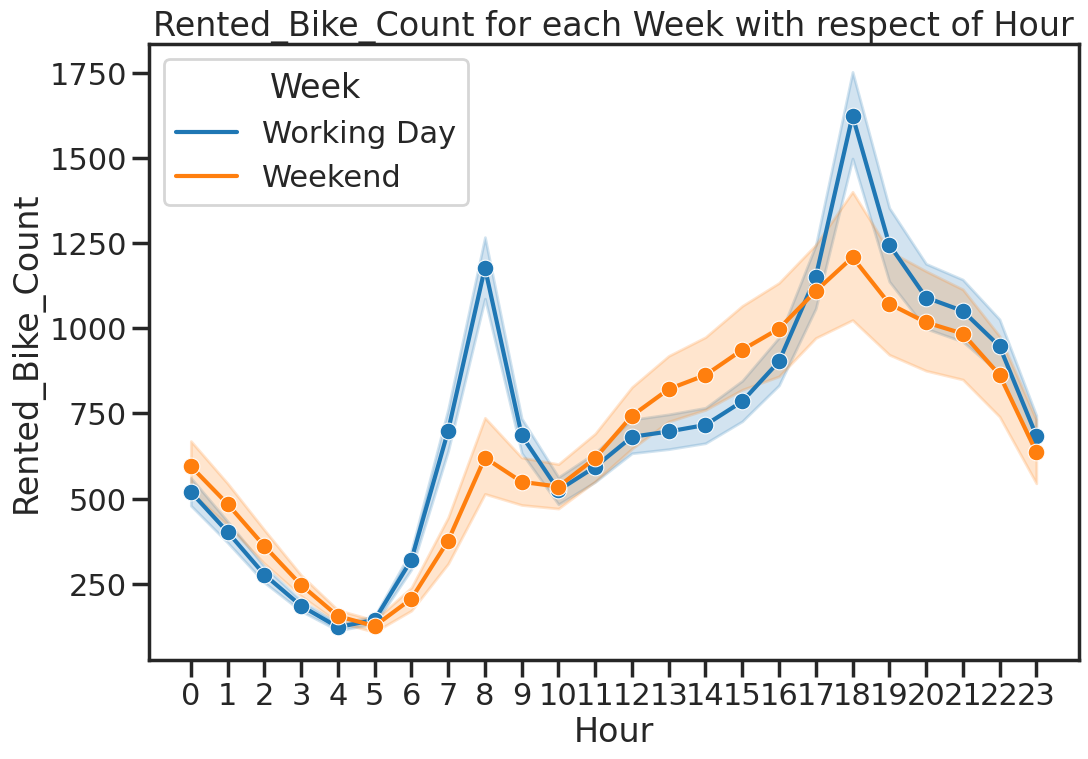

In [ ]:
#analysing hour with bike demand with respect to different third value

for i in cat_feature:
  if i in ['Hour','Time_Period','Functioning_Day']:
    pass
  else:
    plt.figure(figsize=(12,8))
    fig = sns.lineplot(x=df["Hour"],y=df['Rented_Bike_Count'],hue=df[i], marker ='o');
    plt.xticks(range(24));
    plt.title(f"Rented_Bike_Count for each {i} with respect of Hour");
  plt.show();

##### 1. Why did you pick the specific chart?

I pick lineplot for comparing different feature based on hue because i was comparing different features based on time.

##### 2. What is/are the insight(s) found from the chart?

Shows maximum demand around 8-9 and 18-20 irrespect of other features.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is important to maintain demand based on the time to generate stable profit.

Based on time period if unable to maintain demand, it will create a chance of new competition.

#### Chart - 10 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
corr = df.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

* Features like **Temperature(°C)** and **Dew point temperature(°C)** show **correlation** of **0.91** and in general, an **absolute correlation coefficient of > 0.7** among two or more predictors indicates the presence of **multicollinearity**.

> ⚡Note: If two variable or features show relationship either in same or opposite direction, then these variables thus show correlation between them.

* **Hour** and **temperature** show positive correlation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. There is no difference in the mean number of rented bikes between different seasons.
2. There is no difference in the mean number of rented bikes between different hours of the day.
3. There is no relationship between temperature and the number of rented bikes.  



### Hypothetical Statement - 1
---
There is no difference in the mean number of rented bikes between different seasons.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no difference in the mean number of rented bikes between different seasons.
* Alternative hypothesis: There is a difference in the mean number of rented bikes between different seasons.
* Test Type: ANOVA Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis = "There is no difference in the mean number of rented bikes between different seasons."
alternative_hypothesis = "There is a difference in the mean number of rented bikes between different seasons."

# Group the data by season
data_by_season = df.groupby('Seasons')

# Calculate the mean number of rented bikes for each season
means = data_by_season['Rented_Bike_Count'].mean()

# Perform an ANOVA test to compare the means
F, p = stats.f_oneway(*[data_by_season['Rented_Bike_Count'].get_group(season)
                         for season in data_by_season.groups])
# Print the result of the test
print(f"F-statistic: {F:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05:
   print(f"{alternative_hypothesis} (reject H0)")
else:
   print(f"{null_hypothesis} (fail to reject H0)")

F-statistic: 776.468
p-value: 0.000
There is a difference in the mean number of rented bikes between different seasons. (reject H0)


##### Which statistical test have you done to obtain P-Value?

I chose to use an analysis of variance (ANOVA) test for the hypotheses because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

##### Why did you choose the specific statistical test?

This test is suitable for these hypotheses because they both involve comparing the mean values of a variable (the number of rented bikes) with different group (seasons).

ANOVA works by comparing the variance within each group to the variance between the groups. If the variance within the groups is small relative to the variance between the groups, it suggests that the means of the groups are significantly different. On the other hand, if the variance within the groups is large relative to the variance between the groups, it suggests that the means of the groups are not significantly different.

### Hypothetical Statement - 2
---
There is no difference in the mean number of rented bikes between different hours of the day.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no difference in the mean number of rented bikes between different hours of the day.

* Alternative hypothesis: There is a difference in the mean number of rented bikes between different hours of the day.

* Test type : ANOVA test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis_H0 = "There is no difference in the mean number of rented bikes \
                      between different hours of the day."
alternative_hypothesis_Ha = "There is a difference in the mean number of rented \
                      bikes between different hours of the day."
# Group the data by hour
data_by_hour = df.groupby('Hour')

# Calculate the mean number of rented bikes for each hour
means = data_by_hour['Rented_Bike_Count'].mean()

# Perform an ANOVA test to compare the means
F, p = stats.f_oneway(*[data_by_hour['Rented_Bike_Count'].get_group(hour)
                        for hour in data_by_hour.groups])
# * operator before the list of groups passed to the f_oneway() function,
# which specifies that the list should be treated as separate arguments rather than as a single argument

# Print the result of the test
print(f"F-statistic: {F:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05: #0.05 is significance threshold value to test
   print(f"{alternative_hypothesis_Ha} (reject H0(Null Hypothesis))")
else:
   print(f"{null_hypothesis_H0} (fail to reject H0(Null Hypothesis))")

F-statistic: 156.687
p-value: 0.000
There is a difference in the mean number of rented                       bikes between different hours of the day. (reject H0(Null Hypothesis))


##### Which statistical test have you done to obtain P-Value?

I chose to use an analysis of variance (ANOVA) test for the hypotheses because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

##### Why did you choose the specific statistical test?

ANOVA works by comparing the variance within each group to the variance between the groups. If the variance within the groups is small relative to the variance between the groups, it suggests that the means of the groups are significantly different. On the other hand, if the variance within the groups is large relative to the variance between the groups, it suggests that the means of the groups are not significantly different.

This test is suitable for these hypotheses because they both involve comparing the mean values of a variable (the number of rented bikes) with different group (hours of the day).

### Hypothetical Statement - 3
---
There is no relationship between temperature and the number of rented bikes.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no relationship between temperature and the number of rented bikes.
* Alternative hypothesis: There is a relationship between temperature and the number of rented bikes.
* Test Type: Pearson correlation coefficient

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis = "There is no relationship between temperature and the number of rented bikes."
alternative_hypothesis = "There is a relationship between temperature and the number of rented bikes."

# Calculate the correlation between temperature and the number of rented bikes
r, p = stats.pearsonr(df['Temperature'], df['Rented_Bike_Count'])

# Print the result of the test
print(f"Correlation coefficient: {r:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05:
   print(f"{alternative_hypothesis} (reject H0)")
else:
   print(f"{null_hypothesis} (fail to reject H0)")

Correlation coefficient: 0.539
p-value: 0.000
There is a relationship between temperature and the number of rented bikes. (reject H0)


##### Which statistical test have you done to obtain P-Value?

I used the Pearson correlation coefficient and the p-value to test the statistical significance of the relationship between the number of rented bikes and the temperature. Specifically, I used the pearsonr() function from the scipy.stats library to calculate the Pearson correlation coefficient and the p-value between the Temperature and Rented_Bike_Count columns of the data.

##### Why did you choose the specific statistical test?

The Pearson correlation coefficient is a measure of the strength and direction of the linear relationship between two variables, and it takes on values between -1 and 1. A value of -1 indicates a strong negative linear relationship, a value of 0 indicates no linear relationship, and a value of 1 indicates a strong positive linear relationship.

I chose to use the Pearson correlation coefficient and p-value for this null hypothesis because they are suitable for testing the statistical significance of a linear relationship between two continuous variables. In this case, the Temperature column is a continuous variable that can take on any value within a certain range, and the Rented_Bike_Count column is also a continuous variable that can take on any integer value within a certain range.






## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
Day                      0
Year                     0
Week                     0
Time_Period              0
dtype: int64


<Axes: >

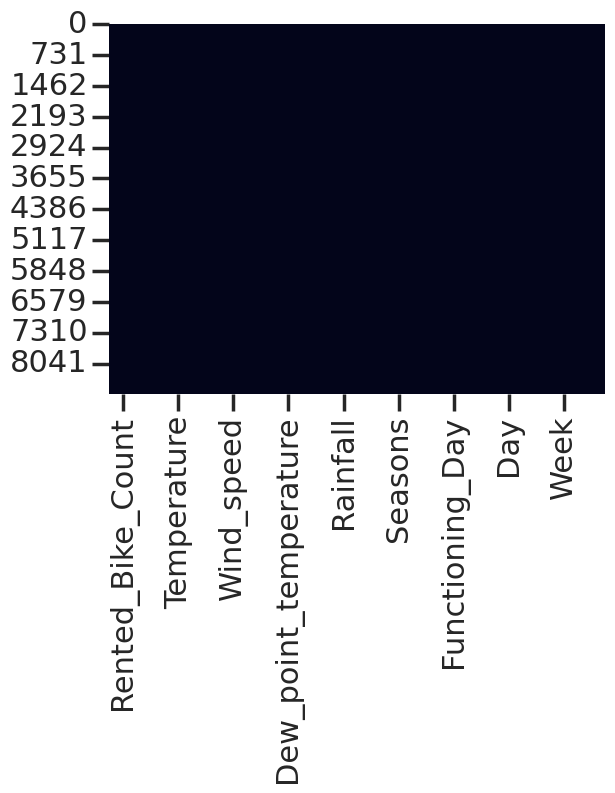

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since, there were no missing values to handle in the given dataset no further manipulation was needed.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
#since it has two observation for now converting into categorial later will change using onehot encoding
df['Year'] = df.Year.astype('str')
symmetric_feature=[]
non_symmetric_feature=[]
for i in df.describe().columns:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

#ignoring rainfall and snowfall due to sparsity(upto 75 percentile value was 0
# and this outliers are needed for model to learn)
#ignoring dependent variable as Outliers in the dependent variable may be
#indicative of unusual or unexpected patterns in the data that could be of interest and should not be removed

#note: model perform well on capping outliers in both features after trial

# symmetric_feature = symmetric_feature[:-2]
# non_symmetric_feature.pop(0)
# print("Symmetric Distributed Features : -",symmetric_feature)
# print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Hour', 'Rainfall', 'Snowfall']
Skew Symmetric Distributed Features : - ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation']


In [ ]:
# For Symmetric features defining upper and lower boundry(normally distributed using std and mean)
def outlier_treatment(df,feature):
  upper_boundary= df[feature].mean()+3*df[feature].std()
  lower_boundary= df[feature].mean()-3*df[feature].std()
  return upper_boundary,lower_boundary

In [ ]:
# Restricting/ capping the data to lower and upper boundry
for feature in symmetric_feature:
  #below lower value then value = lower value
  df.loc[df[feature]<= outlier_treatment(df=df,feature=feature)[1], feature]=outlier_treatment(df=df,feature=feature)[1]
  #above higher value, then value = higher value
  df.loc[df[feature]>= outlier_treatment(df=df,feature=feature)[0], feature]=outlier_treatment(df=df,feature=feature)[0]

In [ ]:

# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+1.5*IQR
  # print(f'feature: {feature} IQR:{IQR} lower: {lower_bridge} upper:{upper_bridge}')
  return upper_bridge,lower_bridge

In [ ]:

# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]

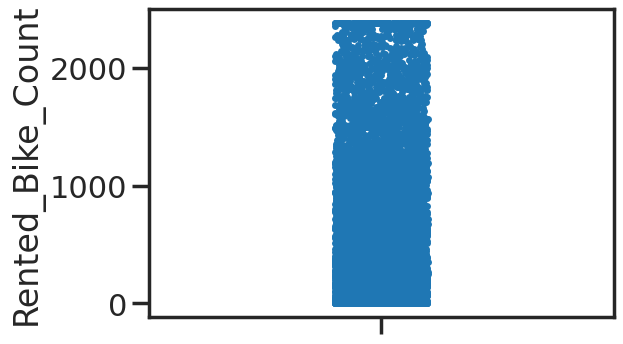

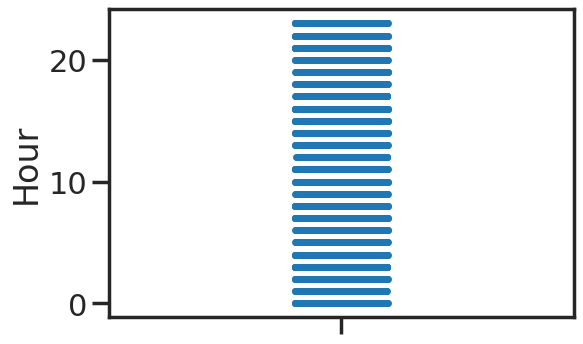

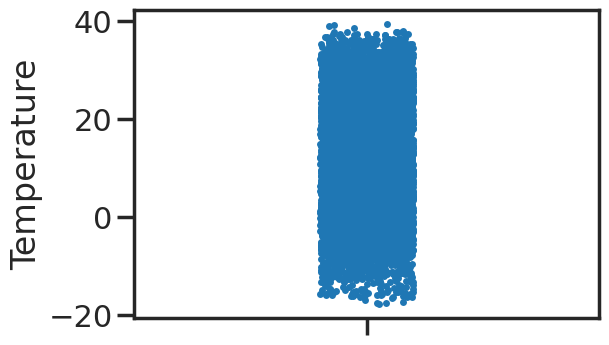

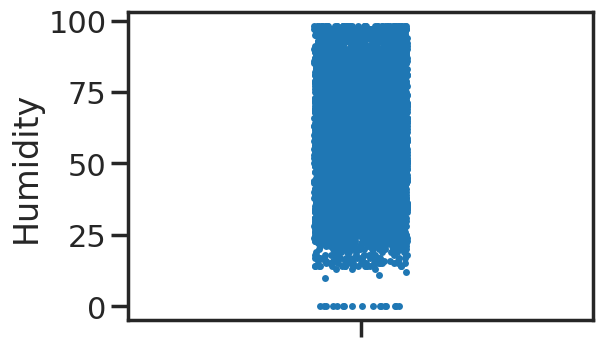

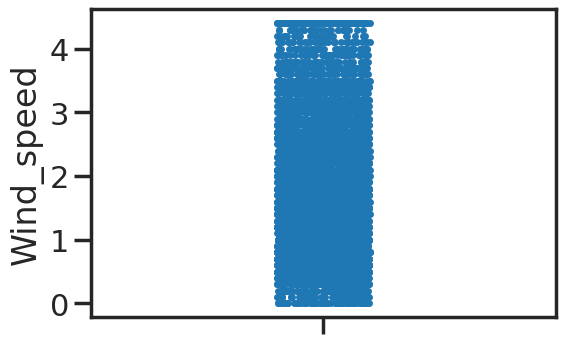

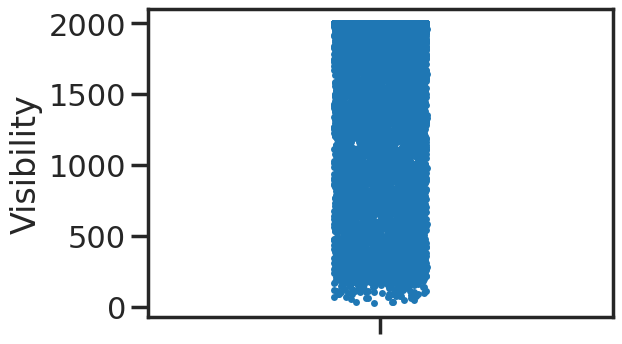

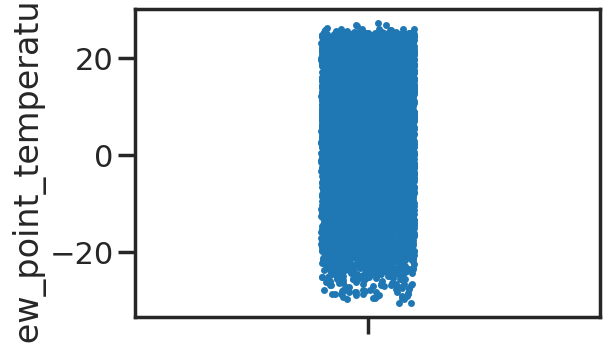

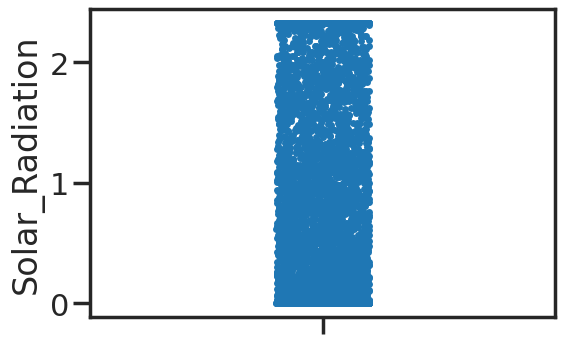

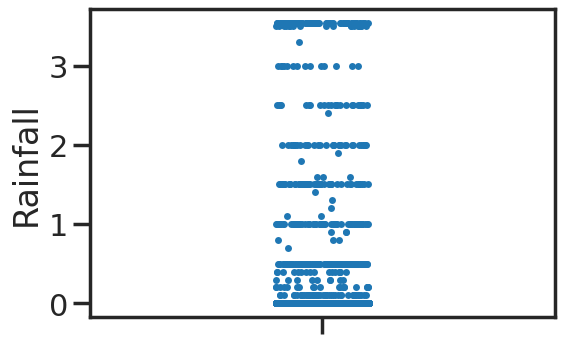

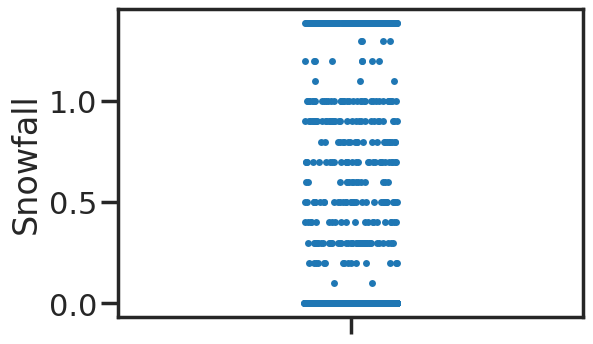

In [ ]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns
for col in df.describe().columns:
  fig=plt.figure(figsize=(6,4))
  sns.stripplot(df[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

First I changed the Year column to sring as it shouldn't be treated as numerical column as there are only two type of values and should be treated as categorical column. Then I separated the skew symmetric and symmetric features and define the upper and lower boundry as defined below. Then, I used capping method to change outliers into upper and lower limit instead of trimming where i could have just removed the entire data.

Another way to do it is dropping extreme values.

In a Gaussian distribution while it’s the symmetric curve and outlier are present. Then, we can set the boundary by taking standard deviation into action.

Identifying which columns in a dataset have a symmetric distribution can be useful because it can give you insight into the overall shape of the distribution of values in each column. For example, if a column has a symmetric distribution, it may be more likely to have a bell-shaped curve when plotted on a histogram. This can be useful to know because certain statistical techniques and machine learning algorithms assume that the data is normally distributed, and having a symmetric distribution is one indication that the data may be approximately normally distributed. On the other hand, if a column has a non-symmetric distribution, it may be more likely to be skewed in one direction or the other, which could affect the validity of certain statistical tests or the performance of certain machine learning models.

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:

* lower inner fence: Q1–1.5*IQ
* upper inner fence: Q3 + 1.5*IQ
* lower outer fence: Q1–3*IQ
* upper outer fence: Q3 + 3*IQ

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
cat_category = df.select_dtypes(include = 'object')
print(f'Categorial Features: {cat_category.columns.to_list()}')

Categorial Features: ['Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Day', 'Year', 'Week', 'Time_Period']


In [ ]:
dff = df.copy()

In [ ]:
dd = df.copy()

⚡ Deleting some extra features like 'Day','Time_period','Year' and 'Month' because day has been converted into working and weekends, timeperiod as keeping hour since it show good correlation, month because it is already shorten to seasons and year because it does not have much variation and there is less to learn from that.

In [ ]:
#deleting extra feature
dff.drop(columns = ['Day','Time_Period','Year','Month'], axis =1, inplace = True)

In [ ]:
#applying encoding to categorial features

# dd = dd.apply(LabelEncoder().fit_transform)
dff = pd.get_dummies(dff, drop_first = True)
dff.head(1)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0             254.00  0.00        -5.20        37        2.20        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  Seasons_Spring  \
0                 -17.60             0.00      0.00      0.00               0   

   Seasons_Summer  Seasons_Winter  Holiday_No Holiday  Functioning_Day_Yes  \
0               0               1                   1                    1   

   Week_Working Day  
0                 1

#### What all categorical encoding techniques have you used & why did you use those techniques?

Since there were not much of different unique categories in each categorial feature, I used one hot encoding using labelencoder function which simply converts each feature into 0 and 1.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

* Absolute humidity is the mass of water vapor in a given volume of air, while relative humidity is the percentage of water vapor in the air compared to the maximum amount of water vapor that the air can hold at a particular temperature.

* Hence using the two column temperature and dewpoint calculating absolute humidity, as a new feature as both of them were showing high correlation.

In [ ]:
#creating function to use dew point and temperature to calculate absolute humidity
import math

def absolute_humidity(df, temperature_column, dew_point_column):
  # constants
  a = 17.27
  b = 237.7

  # create a new column for absolute humidity
  df['Absolute_Humidity'] = None

  # iterate over the rows of the DataFrame
  for index, row in df.iterrows():
    temperature = row[temperature_column]
    dew_point = row[dew_point_column]

    # check for dew point equal to or higher than temperature
    if dew_point >= temperature:
      # set absolute humidity to zero to prevent division by zero
      df.at[index, 'Absolute_Humidity'] = 0.0
    else:
      # calculate saturation vapor pressure
      svp = (a * dew_point) / (b + dew_point)

      # check for temperature equal to zero
      if temperature == 0:
        # set absolute humidity to zero to prevent division by zero
        df.at[index, 'Absolute_Humidity'] = 0.0
      else:
        # calculate absolute humidity
        ah = 6.112 * svp * math.exp((a * temperature) / (b + temperature)) / temperature

        # store the absolute humidity in the new column
        df.at[index, 'Absolute_Humidity'] = ah

  return df


In [ ]:
#calling function
dff = absolute_humidity(dff, 'Temperature', 'Dew_point_temperature')
# dd = absolute_humidity(dd, 'Temperature', 'Dew_point_temperature')



⚡ When dummies are used for creating new feature they get data type of uint8 which means it is an unsigned integer which is a non-negative integer that can hold only positive values and zero. The range of values that an uint8 type can represent is from 0 to 255.

In [ ]:
# u8 = dff.select_dtypes(include = 'uint8')

In [ ]:
#changing data type as there was an error while using isinf
dff['Absolute_Humidity'] = dff.Absolute_Humidity.astype('int')
# dd['Absolute_Humidity'] = dd.Absolute_Humidity.astype('int')

In [ ]:
#replacing infinity with 0
np.isinf(dff).values.sum()
dff.replace([np.inf, -np.inf], 0, inplace=True)
# np.isinf(dd).values.sum()
# dd.replace([np.inf, -np.inf], 0, inplace=True)

⚡ Dropping values when there is no functioning day, because there are no bike rented. Secondly because it can cause overfitting as it will act as extra feature but due to less variation will not help model to learn. Thirdly when checked in later, this column was removed leaving rented bike count as zero so there will be no relation why there will be zero rented bike.

In [ ]:
dff = dff.drop(dff[dff['Functioning_Day_Yes'] == 0].index)
# dd = dd.drop(dd[dd['Functioning_Day'] == 0].index)

In [ ]:
#deleting extra feature
dff.drop(columns = ['Functioning_Day_Yes'], axis =1, inplace = True)

#### 2. Feature Selection

#####Feature selection by removing columns from a dataset that have a low variance

In [ ]:
# Select your features wisely to avoid overfitting
# Checking the shape of dataset
# dff.shape
dd.shape

(8760, 18)

In [ ]:
# Dropping Constant and Quasi Constant Feature
def dropping_constant(data):
  from  sklearn.feature_selection import VarianceThreshold
  var_thres= VarianceThreshold(threshold=0.05)
  var_thres.fit(data)
  concol = [column for column in data.columns
          if column not in data.columns[var_thres.get_support()]] #var_thres.get_support() return boolean values on checking condition
  print(f'Columns dropped: {concol}')
  df_removed_var=data.drop(concol,axis=1)
  return df_removed_var

In [ ]:
# Calling the function
df_removed_var=dropping_constant(dff)
# df_removed_var=dropping_constant(dd)

Columns dropped: ['Holiday_No Holiday']


In [ ]:
# Checking the shape after feature dropped
df_removed_var.shape

(8465, 15)

In [ ]:
# Correlation Heatmap visualization code
corr = df_removed_var.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

#####Multicolinearity

**VIF**

---
* Calculating vif identify the strength of correlation between independent variable and the strength of that correlation.

* Vif starts at 1 and has no upper limit.

* 1-5 : Moderate, No corrective measure

* Greater than 5: Severe, Coefficient and p-value are questionable


---
* Since we already saw in correlation matrix that there are high correlation between temperature and dew point temperature, either deleting or adding up column to make new feature will work to deal with this multicolinearity.

Therefore first calculating variance inflation factor(VIF).


In [ ]:
# Manipulate Features to minimize feature correlation
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
# calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

In [ ]:
# Checking Variable Inflation Factor
# the independent variables set
X = df_removed_var.copy()

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

for i in range(len(vif_data)):
  vif_data.loc[i,"VIF"]=vif_data.loc[i,"VIF"].round(2)
  if vif_data.loc[i,"VIF"]>=8:
    print(vif_data.loc[i,"feature"])


Temperature
Humidity
Visibility
Dew_point_temperature


In [ ]:
# Check Feature Correlation and finding multicolinearity
def correlation(df,threshold):
  col_corr=set()
  corr_matrix= df.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)

In [ ]:
correlation(df_removed_var,0.6)

['Seasons_Winter', 'Seasons_Summer', 'Dew_point_temperature']

In [ ]:
# Getting multicolinear columns and dropping them
highly_correlated_columns=correlation(df_removed_var,0.6)


df_removed=df_removed_var.drop(highly_correlated_columns,axis=1)
df_removed.shape

(8465, 12)

In [ ]:
# Correlation after dropping the required columns
# Correlation Heatmap visualization code
corr = df_removed.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [ ]:
#dropped humidity as created new feature
# df_removed = df_removed.drop(columns = ['Humidity'], axis =1)
# df_removed = df_removed.drop(columns = ['Humidity','Year'], axis =1)

In [ ]:
# Again checking VIF post-dropped features
# the independent variables set
X = df_removed.copy()

#removing dependent variable from column
X.drop(columns=['Rented_Bike_Count'], axis =1, inplace = True)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data["VIF"] = vif_data["VIF"].apply(lambda x: round(x, 2))
vif_data[vif_data["VIF"] >= 8]["feature"].apply(print)

Series([], Name: feature, dtype: object)

In [ ]:
calc_vif(df_removed[[i for i in df_removed.describe().columns if i not in ['Rented_Bike_Count']]])

variables  VIF
0                Hour 3.98
1         Temperature 3.30
2            Humidity 6.21
3          Wind_speed 4.93
4          Visibility 5.10
5     Solar_Radiation 2.36
6            Rainfall 1.18
7            Snowfall 1.21
8      Seasons_Spring 1.41
9    Week_Working Day 3.36
10  Absolute_Humidity 1.02

In [ ]:
# After Feature Selection checking the shape left with
df_removed.shape

(8465, 12)

##### What all feature selection methods have you used  and why?

employed various feature selection techniques to enhance the robustness of the model. The initial step involved dropping columns with constant or quasi-constant variance. Subsequently, I used Pearson correlation to identify and remove columns exhibiting multicollinearity. After this step, I proceeded to validate the Variance Inflation Factors (VIFs) for each feature.

The VIF is calculated using the formula: \frac{1}{1-R^2}


Here,R^2 represents the coefficient of determination in linear regression, and its value ranges from 0 to 1.

In the VIF method, I regressed each feature against all other features, and if the VIF for a feature was between 5 and 10, it suggested potential multicollinearity. I set a threshold of 8 for VIF, considering values above this as indicative of multicollinearity.

After the initial removal based on Pearson correlation, I scrutinized the VIF values for each predictor variable. Features with VIF exceeding 8 underwent manipulation, and the VIFs were re-evaluated iteratively. This process continued until all features had a VIF below the established threshold.

Additionally, I dropped columns identified as multicollinear through this iterative process based on VIF. This comprehensive approach ensures that the selected features exhibit lower multicollinearity, contributing to the overall stability and reliability of the model.








##### Which all features you found important and why?

In [ ]:
df_removed.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons_Spring', 'Week_Working Day', 'Absolute_Humidity'],
      dtype='object')

In [ ]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the XGBRegressor
  model= XGBRegressor(objective='reg:squarederror')
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  return final_df

In [ ]:
# Getting feature importance of selected features
pd.options.display.float_format = "{:.5f}".format
randomforest_embedded(x=df_removed.drop(["Rented_Bike_Count"],axis=1),y=df_removed["Rented_Bike_Count"])

Features  Importances
3          Wind_speed      0.00853
7            Snowfall      0.00938
4          Visibility      0.01226
10  Absolute_Humidity      0.02302
8      Seasons_Spring      0.04130
2            Humidity      0.05881
9    Week_Working Day      0.06271
5     Solar_Radiation      0.08397
1         Temperature      0.18447
0                Hour      0.19902
6            Rainfall      0.31654

In [ ]:
pd.options.display.float_format = "{:.2f}".format

I found 10 feature to be important as they were having low VIF and does not show multicollinearity. However, when checking using embedded method using XGBRegressor found none of them had exact 0 importance value which means each feature had atleast some importance.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Rainfall', 'Snowfall']
Skew Symmetric Distributed Features : - ['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Solar_Radiation', 'Seasons_Spring', 'Week_Working Day', 'Absolute_Humidity']


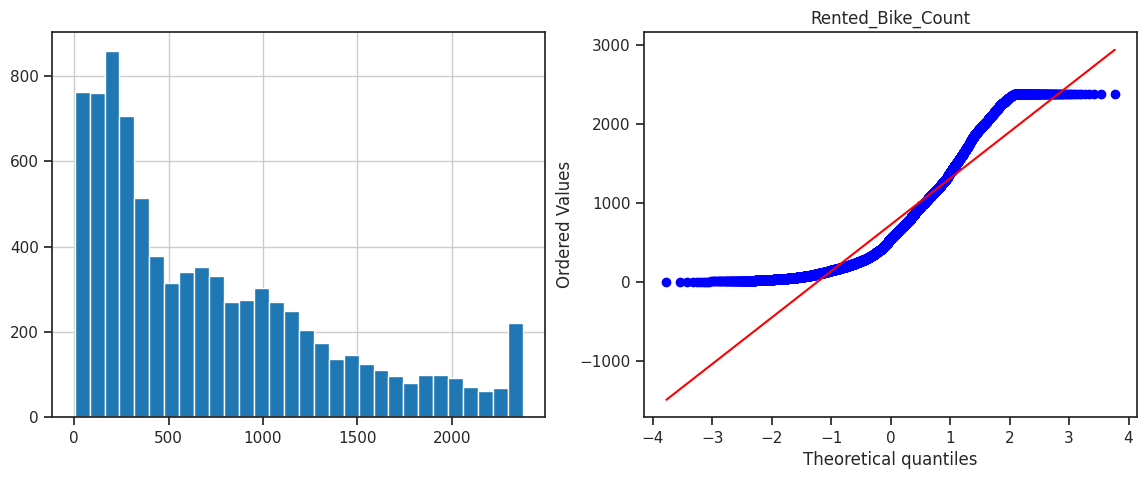

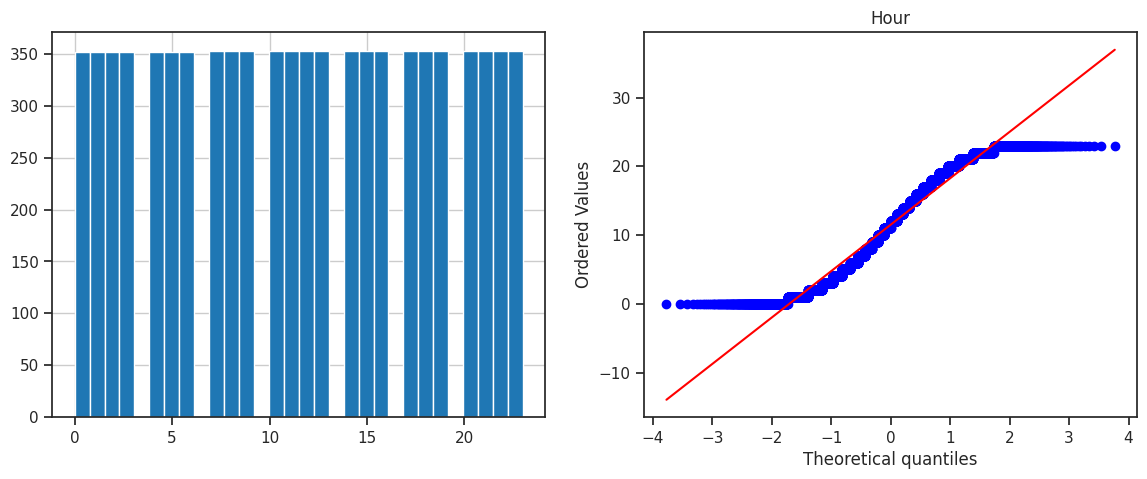

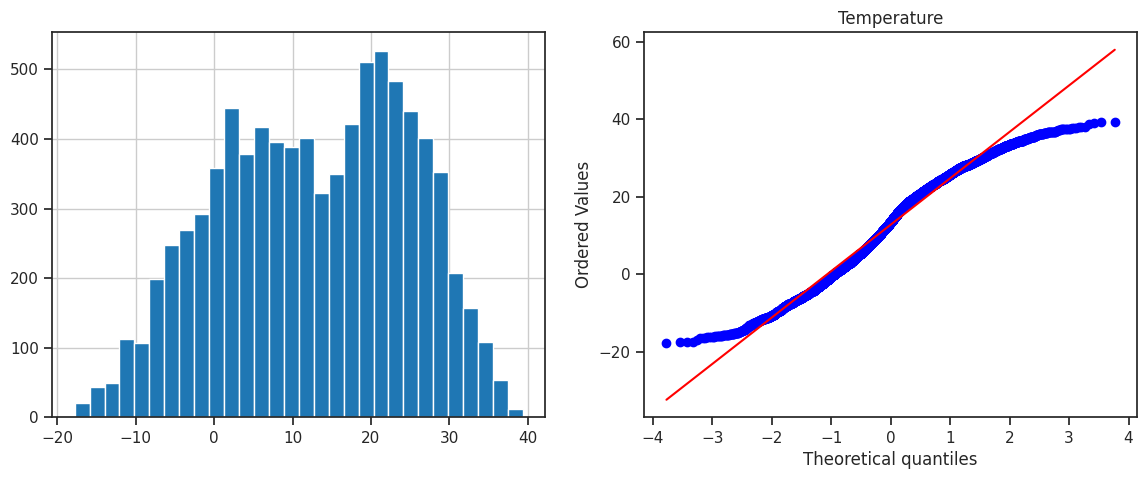

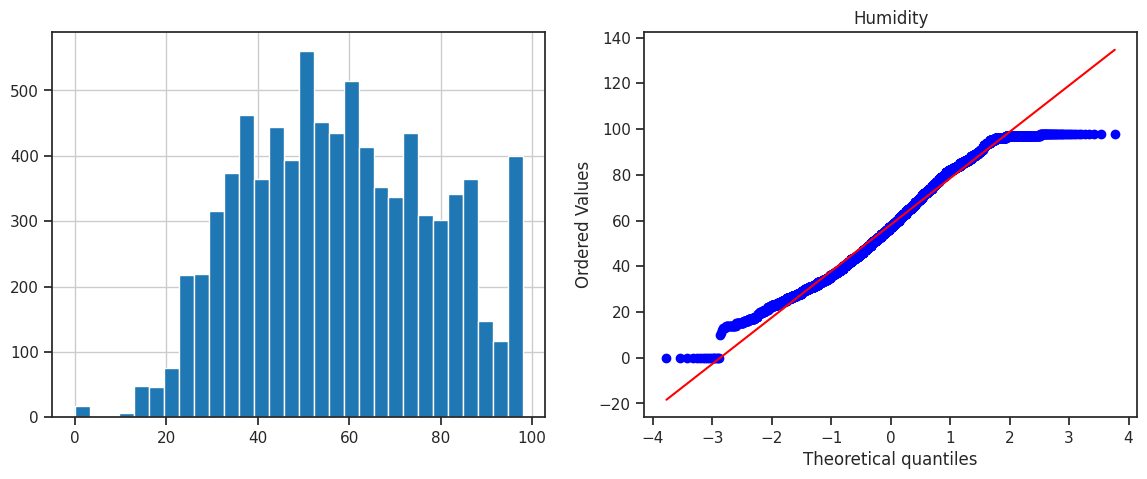

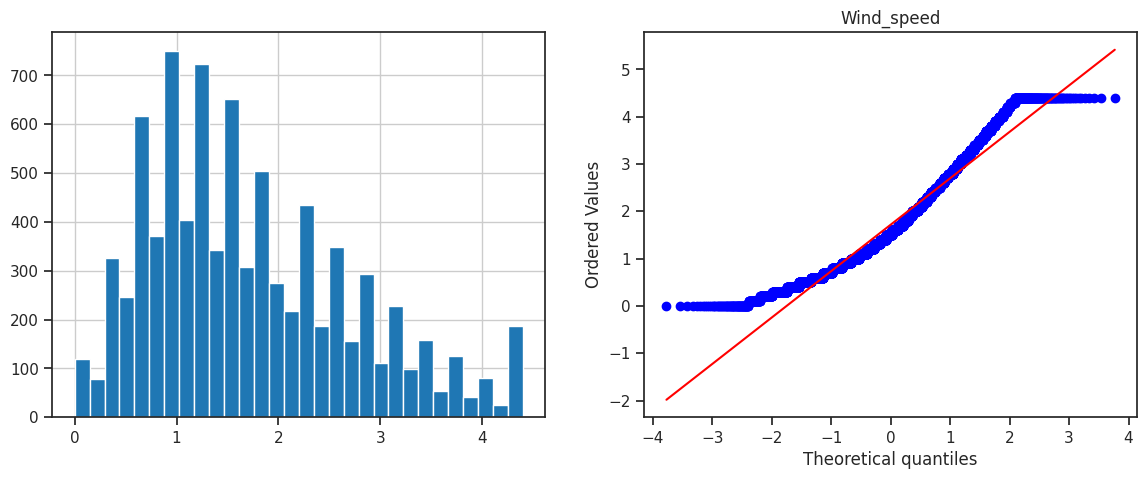

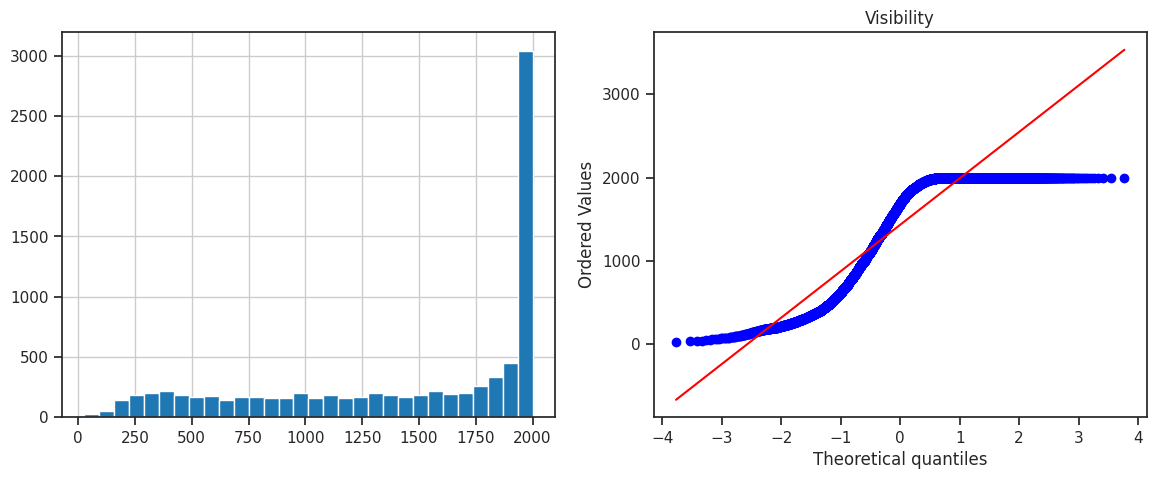

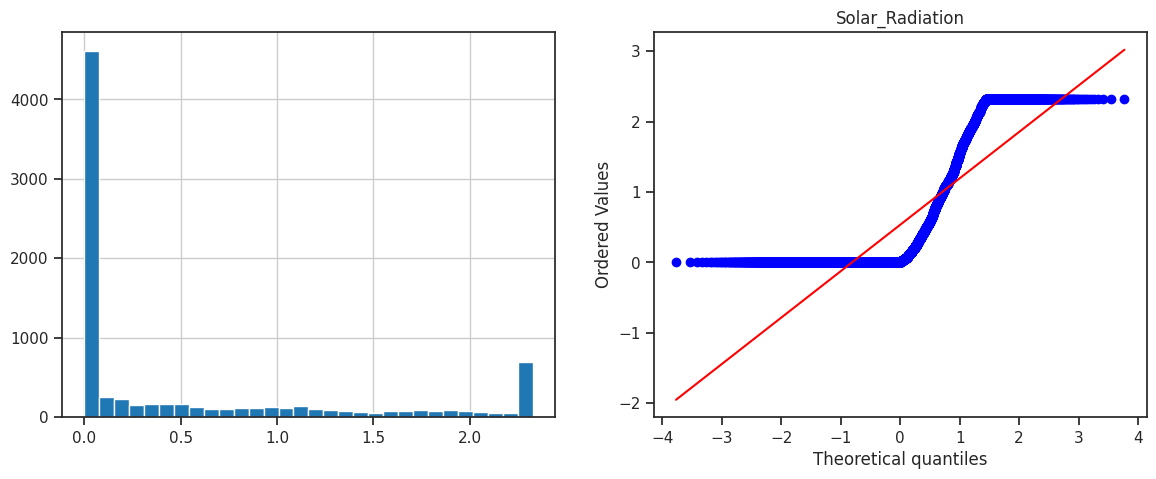

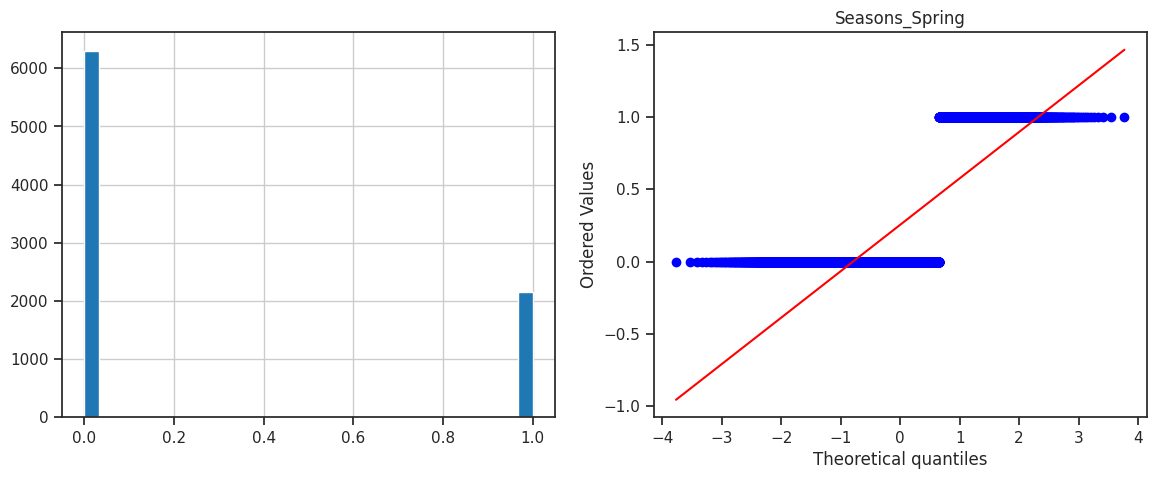

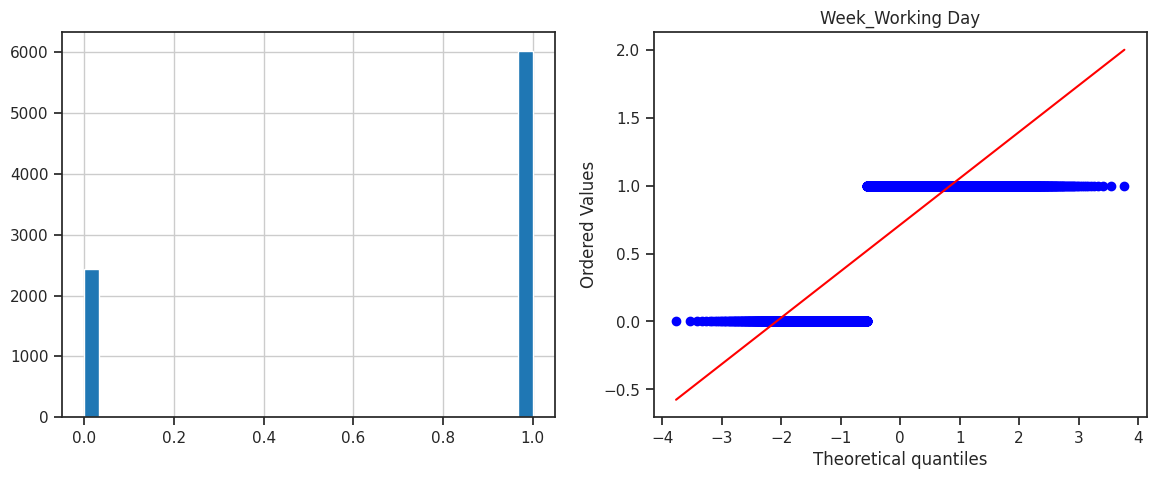

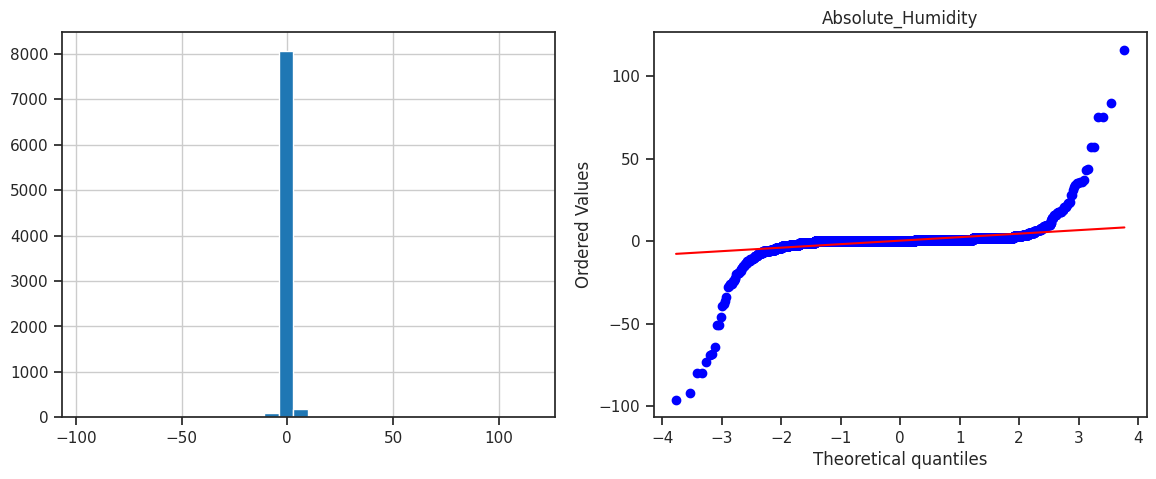

In [ ]:


#vizualization
for variable in non_symmetric_feature:
  sns.set_context('notebook')
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df_removed[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df_removed[variable], dist='norm',plot=plt)
  plt.title(variable)
  plt.show()
  print('='*120)

⚡ Since applying transformation on dependent variable rented bike count, it may affect the interpretability of the model. For example, if applied a log transformation to the dependent variable, the coefficients of the model will be interpreted in terms of the log scale, rather than the original scale.

In [ ]:
# Transform Your data
df_removed['Wind_speed']=np.cbrt(df_removed['Wind_speed'])
df_removed['Rented_Bike_Count']=np.sqrt(df_removed['Rented_Bike_Count'])

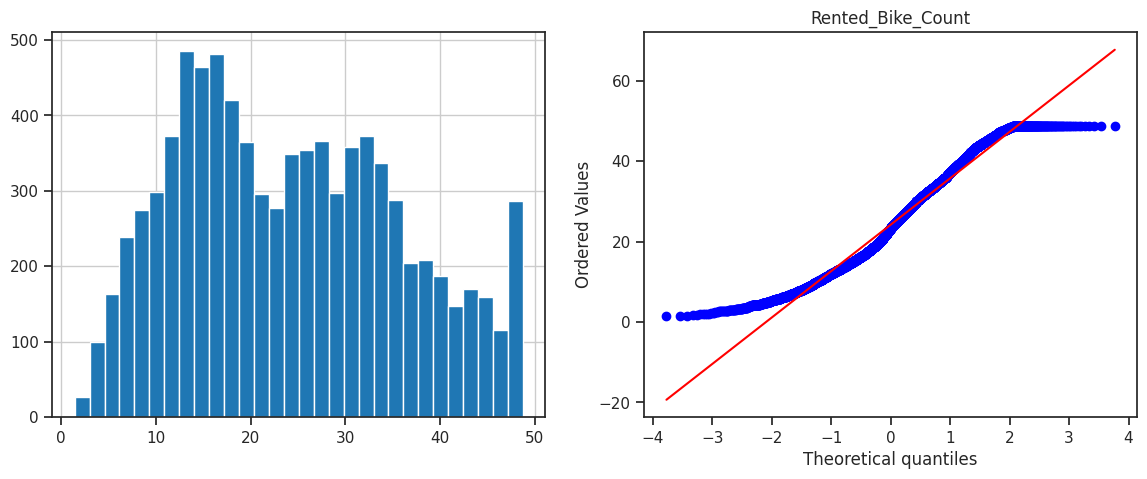

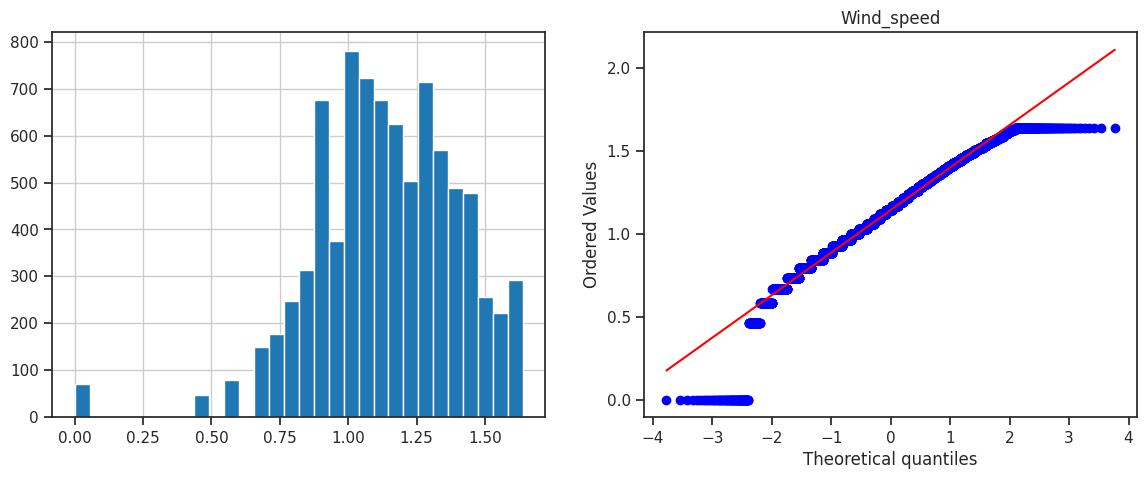

In [ ]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in non_symmetric_feature:
  # if (col == 'Wind_speed'):
  if (col == 'Wind_speed') | (col == 'Rented_Bike_Count'):
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
    df_removed[col].hist(bins=30)

    ##QQ plot
    plt.subplot(1,2,2)
    stats.probplot(df_removed[col], dist='norm',plot=plt)
    plt.title(col)
    plt.show()

Transformed windspeed using cube root and rented bike count with square root and no other transformation required, as for some non symmetric methods when transformation was applied some changed from right to left skewed, hence ignoring transformation.

The purpose of transformation is to convert the values of the dataset's numeric columns to a standard scale without distorting the distinctions between different value ranges or omitting crucial details. Transformation can be achieved using different techniques i.e., either taking log, square root or cuberoot for the value.

* square-root for moderate skew: sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

* log for greater skew: log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

* inverse for severe skew: 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

* Linearity and heteroscedasticity: First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

### 6. Data Scaling

In [ ]:
df_removed.Hour = df_removed.Hour.astype('int')

In [ ]:
# Scaling your data
# Checking the data
df_removed.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0              15.94     0        -5.20        37        1.30        2000   
1              14.28     1        -5.50        38        0.93        2000   
2              13.15     2        -6.00        39        1.00        2000   
3              10.34     3        -6.20        40        0.97        2000   
4               8.83     4        -6.00        36        1.32        2000   

   Solar_Radiation  Rainfall  Snowfall  Seasons_Spring  Week_Working Day  \
0             0.00      0.00      0.00               0                 1   
1             0.00      0.00      0.00               0                 1   
2             0.00      0.00      0.00               0                 1   
3             0.00      0.00      0.00               0                 1   
4             0.00      0.00      0.00               0                 1   

   Absolute_Humidity  
0                  1  
1                  1  
2                  0  
3                  0  
4                  0

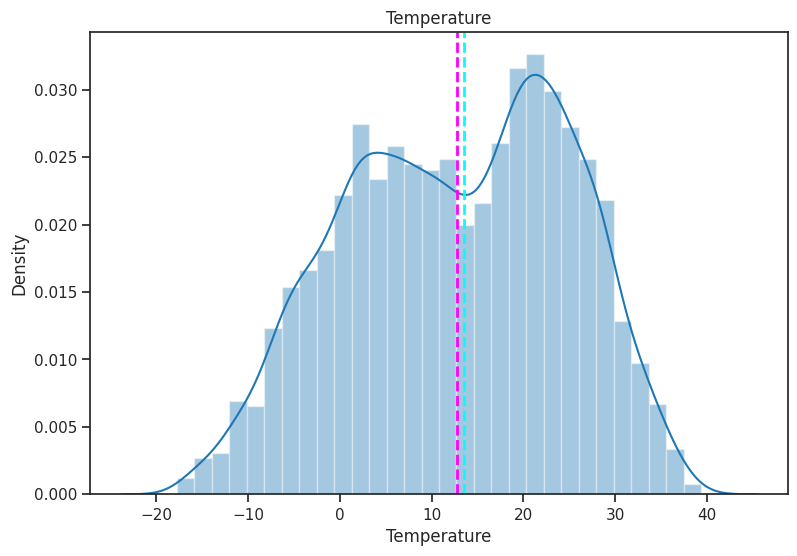

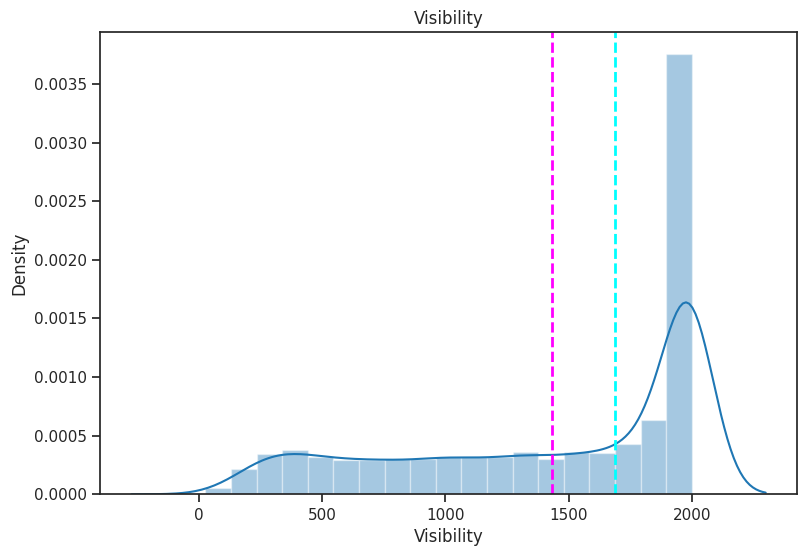

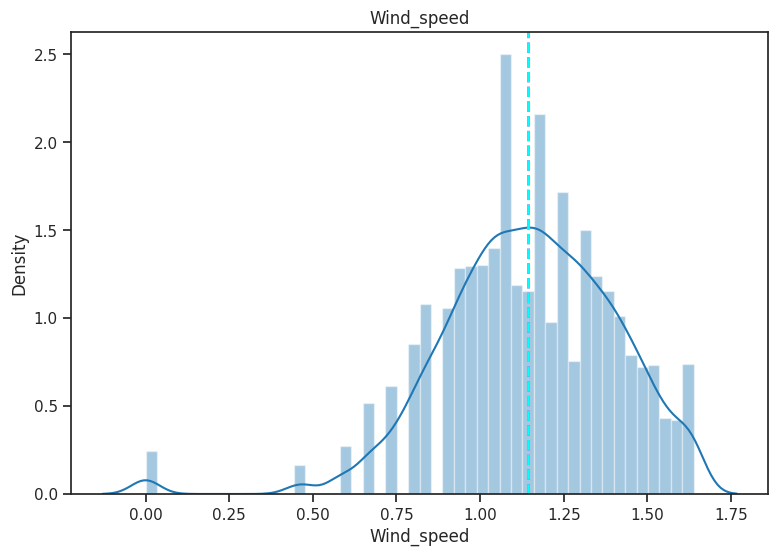

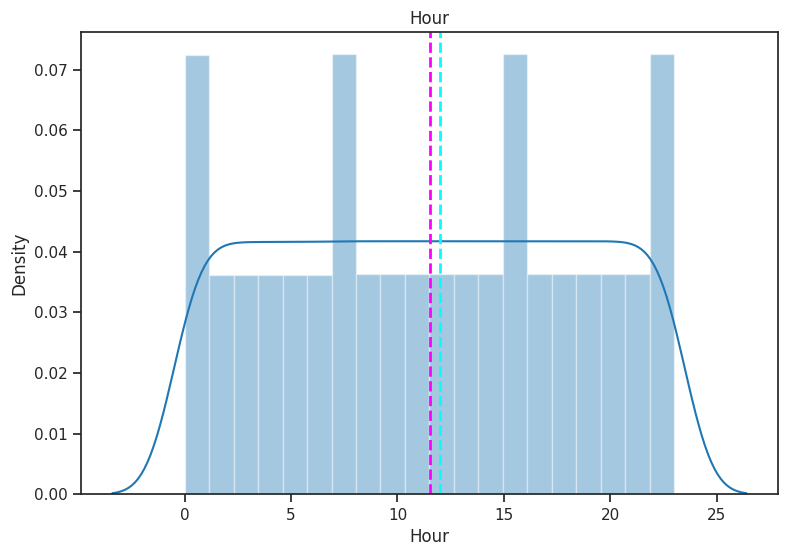

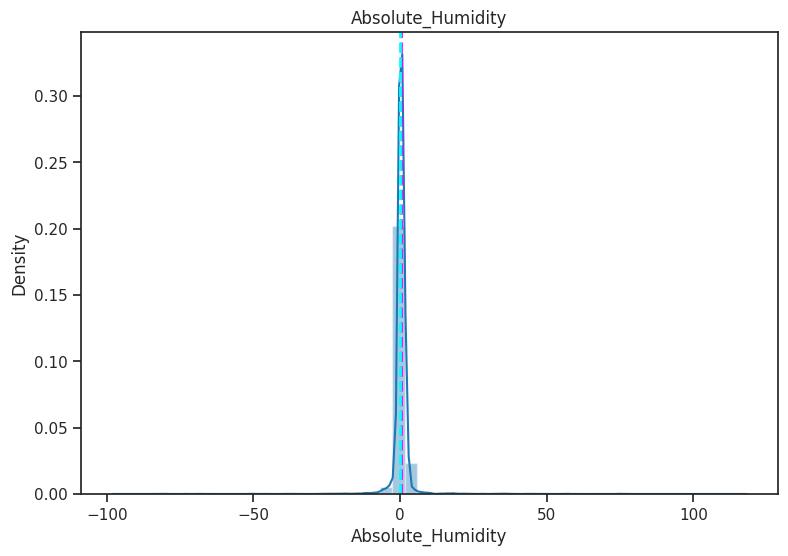

In [ ]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in ['Temperature','Visibility','Wind_speed','Hour','Absolute_Humidity']:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()

In [ ]:
df_r = df_removed.copy()

##### Which method have you used to scale you data and why?

In [ ]:
#Transformation
for col in non_symmetric_feature:
  if col == 'Rented_Bike_Count':
    pass
  elif col == 'Wind_speed':
    df_r[col] = StandardScaler().fit_transform(df_r[col].values.reshape(-1, 1))
  else:
    df_r[col] = MinMaxScaler().fit_transform(df_r[col].values.reshape(-1, 1))

In [ ]:
df_r.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0              15.94  0.00         0.22      0.38        0.60        1.00   
1              14.28  0.04         0.22      0.39       -0.82        1.00   
2              13.15  0.09         0.21      0.40       -0.55        1.00   
3              10.34  0.13         0.20      0.41       -0.68        1.00   
4               8.83  0.17         0.21      0.37        0.68        1.00   

   Solar_Radiation  Rainfall  Snowfall  Seasons_Spring  Week_Working Day  \
0             0.00      0.00      0.00            0.00              1.00   
1             0.00      0.00      0.00            0.00              1.00   
2             0.00      0.00      0.00            0.00              1.00   
3             0.00      0.00      0.00            0.00              1.00   
4             0.00      0.00      0.00            0.00              1.00   

   Absolute_Humidity  
0               0.46  
1               0.46  
2               0.45  
3               0.45  
4               0.45

When we are using an algorithm that assumes your features have a similar range, we should use feature scaling.

If the ranges of features differ much then we should use feature scaling. If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then we can leave them as it's. However, we should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

Use Standardization when your data follows Gaussian distribution.
Use Normalization when your data does not follow Gaussian distribution.

So, in my data few of the features were having large difference in distribution, that's why, I have used standardization using standardscaler on windspeed as it showed normal distribution and normalization using minmaxscaler on others.


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

This dataset does not necessitate dimensionality reduction. Dimensionality reduction is typically employed to mitigate issues arising from a large number of features, such as overfitting and computational inefficiency. Techniques like Principal Component Analysis (PCA) and Singular Value Decomposition (SVD) are commonly used for this purpose.

While dimensionality reduction offers advantages, its necessity depends on the specific characteristics of the dataset. In cases where the dataset is extensive, reducing the number of features can enhance computational efficiency and mitigate overfitting issues. This is particularly relevant for machine learning models, leading to faster computation and improved generalization to new data.

Moreover, dimensionality reduction addresses the curse of dimensionality, where an increase in dimensions exponentially expands the space. This can impede processes like nearest neighbor searches due to larger distances between points. By reducing dimensions, dimensionality reduction helps alleviate these challenges.

Lastly, dimensionality reduction aids in visualizing high-dimensional data. As it becomes challenging to visualize data in more than three dimensions, reducing dimensions facilitates a clearer understanding of data patterns.

In summary, while dimensionality reduction techniques offer benefits, their application depends on the specific characteristics and requirements of the dataset, and in this particular case, such reduction may not be necessary.

In [ ]:

# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)





Not applicable

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
 # split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    df_r.drop("Rented_Bike_Count",axis=1),df_r["Rented_Bike_Count"],
    test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5925, 11)
Number transactions y_train dataset:  (5925,)
Number transactions X_test dataset:  (2540, 11)
Number transactions y_test dataset:  (2540,)


##### What data splitting ratio have you used and why?

In this case, I opted for a 70:30 split for training and testing data. The choice of splitting ratio, whether it's 80/20 or 70/30, generally doesn't significantly impact results unless the dataset is limited in size. However, there are considerations regarding the trade-off between training and testing data.

When there is less training data, parameter estimates may have greater variance. On the other hand, with less testing data, performance statistics can exhibit higher variance. It is optimal to strike a balance in data division, ensuring that neither the training set's variance nor the test set's variance is excessively high.

For instance, if there are a total of 100 instances, cross-validation might be more suitable, as a single split may not yield satisfactory variance in estimates. In contrast, with a larger dataset, such as 100,000 instances, the choice between an 80:20 or 90:10 split becomes less critical, and computational considerations may play a role.

The 80/20 split is commonly used and is sometimes referred to as the Pareto principle. It is a pragmatic choice in many scenarios, offering a balanced allocation of data for training and testing purposes.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced datasets are particularly pertinent in the realm of supervised machine learning, especially when dealing with two or more classes.

Imbalance arises when the distribution of data points across different classes is uneven. For instance, in a binary classification scenario, balanced data would ideally comprise 50% of points for each class. In many machine learning techniques, minor imbalances, such as 60% for one class and 40% for the other, typically do not significantly impact performance. It is only when the class imbalance becomes substantial, like 90% for one class and 10% for the other, that standard optimization criteria or performance measures may lose effectiveness and require modification.

In our specific case, addressing imbalanced classes is not necessary, as classes like "functioning day" and "holiday" have already been removed from consideration. Additionally, it's important to note that class imbalance is a concern primarily in classification problems, where the goal is to predict class labels. In contrast, for regression problems where the objective is to predict a continuous numerical target value, class imbalance is generally not a relevant consideration.








In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 LINEAR REGRESSION

In [ ]:
# ML Model - 1 Implementation
rmodel = LinearRegression()
# Fit the Algorithm
rmodel.fit(X_train, y_train)

LinearRegression()

In [ ]:
#score
rmodel.score(X_train, y_train)

0.6066576288902048

In [ ]:
# Checking the coefficients
rmodel.coef_

array([ 11.80934306,  34.83857819, -11.54899569,  -0.07686724,
         0.74538099,  -1.76153328,  -5.66879671,  -0.2502283 ,
         0.82850486,   0.79723929, -10.6780881 ])

In [ ]:
# Checking the intercept value
rmodel.intercept_

11.081955349609931

In [ ]:
# Predict on the model
y_pred_train = rmodel.predict(X_train)
y_pred = rmodel.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Metric Score chart for train
r2_train = r2(y_train, y_pred_train)
adj_r2_train = 1-(1-r2(np.square(y_train), np.square(y_pred_train)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train = mse(y_train, y_pred_train)
RMSE_train = np.sqrt(MSE_train)
MAE_train = mae(y_train, y_pred_train)

In [ ]:
# Metric Score chart for test
r2_test = r2(y_test, y_pred)
adj_r2_test = 1-(1-r2(np.square(y_test), np.square(y_pred)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test = mse(y_test, y_pred)
RMSE_test = np.sqrt(MSE_test)
MAE_test = mae(y_test, y_pred)

In [ ]:
data = [
    {
        'Model': 'Linear_Regression',
        'R2_train': r2_train,
        'R2_test': r2_test,
        'Adjusted_R2_train': adj_r2_train,
        'Adjusted_R2_test': adj_r2_test,
        'MAE_train': MAE_train,
        'MAE_test': MAE_test,
        'RMSE_train': RMSE_train,
        'RMSE_test': RMSE_test
    }
]
result = pd.DataFrame(data)
result

Model  R2_train  R2_test  Adjusted_R2_train  Adjusted_R2_test  \
0  Linear_Regression      0.61     0.59               0.55              0.54   

   MAE_train  MAE_test  RMSE_train  RMSE_test  
0       5.79      5.83        7.37       7.42

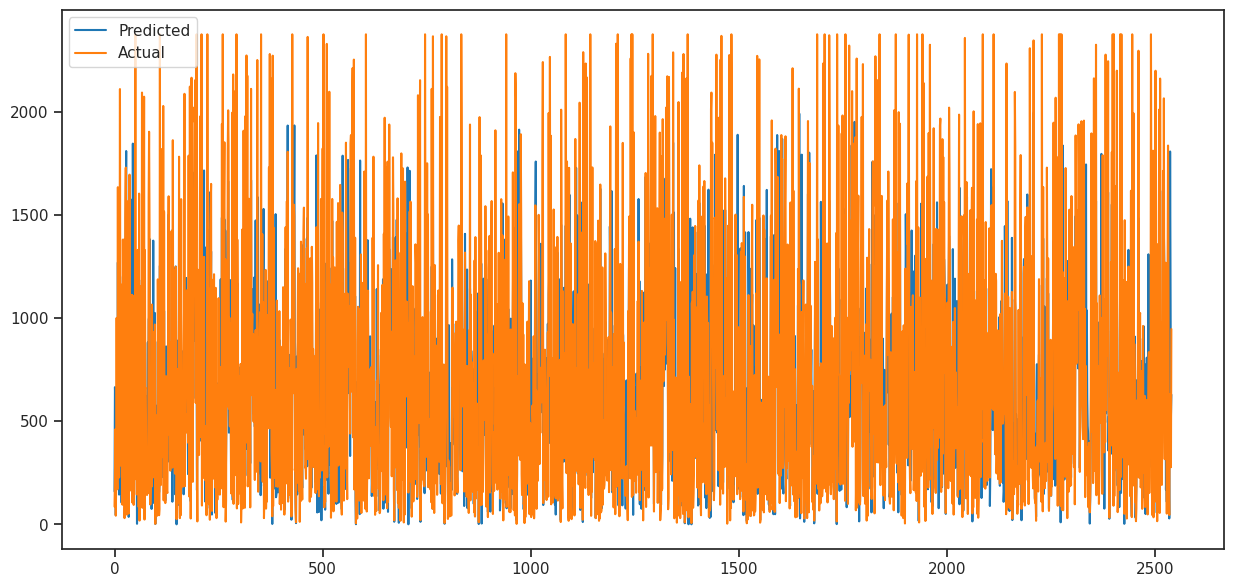

In [ ]:
#Visualization
# Plot between actual target variable vs Predicted one
sns.set_context("notebook");
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

The R2 values on both the training and test sets are relatively high, which indicates that the model is doing a good job of explaining the variance in the target variable. The MAE and RMSE values on both the training and test sets are also relatively low, which means that the model is making relatively small and accurate predictions.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Create the model
model = LinearRegression()

# Define the hyperparameter grid
param_grid = {'fit_intercept': [True, False]}

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5,scoring = 'r2')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(best_params)



{'fit_intercept': True}


In [ ]:
# Fit the Algorithm

best_model = LinearRegression(fit_intercept=True)

# Fit the best model to the training data
best_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the model
y_pred_train2 = best_model.predict(X_train)
y_pred2 = best_model.predict(X_test)


In [ ]:
best_model.score(X_train, y_train)

0.6066576288902048

In [ ]:
# Metric Score chart for train
r2_train2 = r2(y_train, y_pred_train2)
adj_r2_train2 = 1-(1-r2(np.square(y_train), np.square(y_pred_train2)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train2 = mse(y_train, y_pred_train2)
RMSE_train2 = np.sqrt(MSE_train2)
MAE_train2 = mae(y_train, y_pred_train2)

# Metric Score chart for test
r2_test2 = r2(y_test, y_pred2)
adj_r2_test2 = 1-(1-r2(np.square(y_test), np.square(y_pred2)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test2 = mse(y_test, y_pred2)
RMSE_test2 = np.sqrt(MSE_test2)
MAE_test2 = mae(y_test, y_pred2)

new_row = {
        'Model': 'Linear_Regression_GridCV',
        'R2_train': r2_train2,
        'R2_test': r2_test2,
        'Adjusted_R2_train': adj_r2_train2,
        'Adjusted_R2_test': adj_r2_test2,
        'MAE_train': MAE_train2,
        'MAE_test': MAE_test2,
        'RMSE_train': RMSE_train2,
        'RMSE_test': RMSE_test2
    }
result = result.append(new_row, ignore_index=True)

##### Which hyperparameter optimization technique have you used and why?

I opted for GridSearchCV for hyperparameter tuning and cross-validation due to its widespread popularity and several advantageous features.

Here are key reasons behind choosing GridSearchCV for this purpose:

Ease of Use: GridSearchCV is designed with user-friendliness in mind. Its interface facilitates the definition of hyperparameter grids, selection of cross-validation strategies, and model fitting, ensuring a straightforward and convenient experience.

Automated Hyperparameter Tuning: GridSearchCV streamlines the hyperparameter tuning process by automating it. This automation significantly saves time and effort compared to manual tuning, allowing for efficient exploration of hyperparameter combinations.

Cross-Validation Support: The inclusion of cross-validation support is crucial for evaluating the model's generalization performance. Cross-validation guards against overfitting to the training data, ensuring that the model can effectively generalize to new, unseen data.

Performance Evaluation Metrics: GridSearchCV offers a variety of evaluation metrics (e.g., accuracy, precision, recall) to assess the model's performance. It allows users to specify the metric of interest for selecting the best-performing model.

In summary, GridSearchCV stands out as a powerful and convenient tool for hyperparameter tuning and cross-validation in Python. Widely utilized in the field of machine learning, it proves to be an effective choice for numerous applications.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Since some of the features was left as it was, since on transformation it changed from left to right skew or right to left skew, therefore in gridsearch I used normalise as parameter to check its affect. The result showed best parameter to be normalise as true, therefore no further improvement was observed in the result.

In [ ]:
result

Model  R2_train  R2_test  Adjusted_R2_train  \
0         Linear_Regression      0.61     0.59               0.55   
1  Linear_Regression_GridCV      0.61     0.59               0.55   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.54       5.79      5.83        7.37       7.42  
1              0.54       5.79      5.83        7.37       7.42

### ML MODEL - 2 -RANDOM FOREST REGRESSOR

In [ ]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
y_pred_train3 = rf_model.predict(X_train)
y_pred3 = rf_model.predict(X_test)

In [ ]:
# Metric Score chart for train
r2_train3 = r2(y_train, y_pred_train3)
adj_r2_train3 = 1-(1-r2(np.square(y_train), np.square(y_pred_train3)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train3 = mse(y_train, y_pred_train3)
RMSE_train3 = np.sqrt(MSE_train3)
MAE_train3 = mae(y_train, y_pred_train3)

# Metric Score chart for test
r2_test3 = r2(y_test, y_pred3)
adj_r2_test3 = 1-(1-r2(np.square(y_test), np.square(y_pred3)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test3 = mse(y_test, y_pred3)
RMSE_test3 = np.sqrt(MSE_test3)
MAE_test3 = mae(y_test, y_pred3)

new_row = {
        'Model': 'RandomForestRegressor',
        'R2_train': r2_train3,
        'R2_test': r2_test3,
        'Adjusted_R2_train': adj_r2_train3,
        'Adjusted_R2_test': adj_r2_test3,
        'MAE_train': MAE_train3,
        'MAE_test': MAE_test3,
        'RMSE_train': RMSE_train3,
        'RMSE_test': RMSE_test3
    }
result = result.append(new_row, ignore_index=True)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# metric score chart
result

Model  R2_train  R2_test  Adjusted_R2_train  \
0         Linear_Regression      0.61     0.59               0.55   
1  Linear_Regression_GridCV      0.61     0.59               0.55   
2     RandomForestRegressor      0.98     0.88               0.98   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.54       5.79      5.83        7.37       7.42  
1              0.54       5.79      5.83        7.37       7.42  
2              0.87       1.01      2.80        1.49       4.11

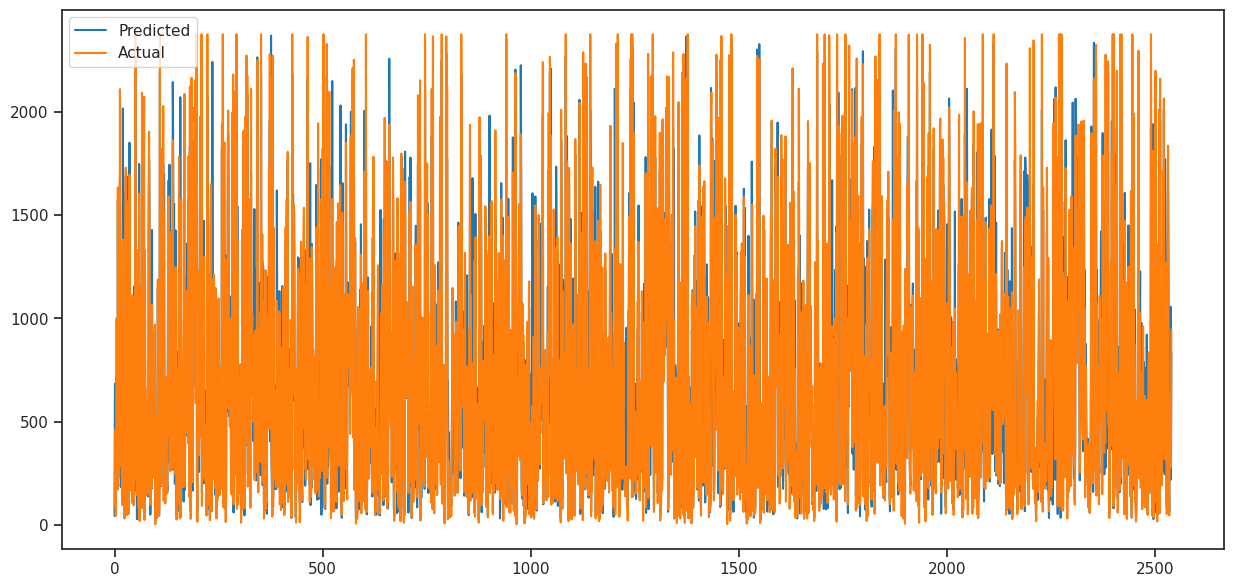

In [ ]:
# Visualizing evaluation Metric Score chart
#Visualization
# Plot between actual target variable vs Predicted one
sns.set_context("notebook");
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred3))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Here I used random forest regressor as seocnd model, i found it to be overfitting since test score was less as compared to train result i.e., r2 score was changed from 0.98 in training to 0.87 in test and relatively higher mean absolute error from 1.01 to 2.82 and root mean squared error changed from 1.50 to 4.13.

Next trying to overcome this error using hyperparameter tunning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='r2')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='r2', verbose=2)

In [ ]:
#best parameter
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.817160 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [ ]:
# Predict on the model
# Making predictions on train and test data
y_pred_train4 = rf_grid.predict(X_train)
y_pred4 = rf_grid.predict(X_test)

In [ ]:
# Metric Score chart for train
r2_train4 = r2(y_train, y_pred_train4)
adj_r2_train4 = 1-(1-r2(np.square(y_train), np.square(y_pred_train4)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train4 = mse(y_train, y_pred_train4)
RMSE_train4 = np.sqrt(MSE_train4)
MAE_train4 = mae(y_train, y_pred_train4)

# Metric Score chart for test
r2_test4 = r2(y_test, y_pred4)
adj_r2_test4 = 1-(1-r2(np.square(y_test), np.square(y_pred4)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test4 = mse(y_test, y_pred4)
RMSE_test4 = np.sqrt(MSE_test4)
MAE_test4 = mae(y_test, y_pred4)

new_row = {
        'Model': 'RandomForestRegressor_Grid_CV',
        'R2_train': r2_train4,
        'R2_test': r2_test4,
        'Adjusted_R2_train': adj_r2_train4,
        'Adjusted_R2_test': adj_r2_test4,
        'MAE_train': MAE_train4,
        'MAE_test': MAE_test4,
        'RMSE_train': RMSE_train4,
        'RMSE_test': RMSE_test4
    }
result = result.append(new_row, ignore_index=True)

In [ ]:
#printing thi result
result

Model  R2_train  R2_test  Adjusted_R2_train  \
0              Linear_Regression      0.61     0.59               0.55   
1       Linear_Regression_GridCV      0.61     0.59               0.55   
2          RandomForestRegressor      0.98     0.88               0.98   
3  RandomForestRegressor_Grid_CV      0.84     0.81               0.82   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.54       5.79      5.83        7.37       7.42  
1              0.54       5.79      5.83        7.37       7.42  
2              0.87       1.01      2.80        1.49       4.11  
3              0.79       3.37      3.67        4.72       5.12

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV, employing the Grid Search technique, stands as a pivotal approach for determining optimal hyperparameters to enhance model performance.

The primary objective is to identify the most effective hyperparameter values that yield optimal prediction results from our model. The Manual Search method, involving hit and trial processes, is time-consuming and impractical, especially considering the vast space of potential hyperparameter combinations.

To address this challenge, advanced methods like Random Search and GridSearch were introduced. Grid Search, specifically implemented in GridSearchCV, systematically explores diverse combinations of specified hyperparameters and their values. It assesses the performance for each combination and selects the most effective set of hyperparameters based on the defined evaluation metric.

While Grid Search offers a comprehensive search across the hyperparameter space, GridSearchCV further integrates cross-validation during the model training process. Cross-Validation enhances the reliability of the model by evaluating its performance across multiple subsets of the data, ensuring robustness and generalizability.

Given the computational expense associated with exploring hyperparameter combinations, the GridSearchCV method, with its dual integration of Grid Search and cross-validation, emerges as an efficient and effective approach for hyperparameter optimization, enabling the model to achieve superior predictive capabilities.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before hyperparameter tuning model was overfitting as model has a very large difference in training and test score, which was reduced from 0.98 in training to 0.84 and test result from 0.87 to 0.81 which is also has slight difference but overall model is efficient now compared to earlier.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

In the context of a linear regression model, the following evaluation metrics were employed to comprehensively assess both the model's performance and its potential business impact:

R2 Score: The R2 score, or coefficient of determination, gauges the model's goodness of fit to the data, ranging from 0 to 1. A higher R2 score signifies a superior fit, suggesting that the model can explain a substantial portion of the variance in the data. In a business context, a high R2 score is indicative of the model's capability to make accurate predictions, thereby influencing decision-making and resource allocation positively.

Adjusted R2 Score: Similar to the R2 score, the adjusted R2 score considers the model's explanatory power while adjusting for the number of variables. A higher adjusted R2 score indicates effective variance explanation while accounting for model complexity. In a business setting, a high adjusted R2 score implies accurate predictions with a reasonable level of complexity, making the model more practical for deployment.

Mean Absolute Error (MAE): The MAE measures the average absolute error of the model's predictions, providing insight into the accuracy of the model. A low MAE suggests that the model is making relatively small errors, a crucial aspect for decision-making or resource allocation in a business context.

Root Mean Squared Error (RMSE): The RMSE assesses the average squared error of the model's predictions, offering a similar perspective to the MAE but emphasizing larger errors due to the squared term. A low RMSE, like a low MAE, signals that the model is making relatively small errors, an important consideration for impactful decision-making or resource allocation in business.

These metrics collectively provide a comprehensive evaluation of the linear regression model, considering accuracy, explanatory power, and practicality for deployment in real-world business scenarios.









### ML MODEL - 3 XgBOOST REGRESSOR

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBRegressor(objective= 'reg:squarederror')

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

y_pred_train5 = xg_models.predict(X_train)
y_pred5 = xg_models.predict(X_test)

In [ ]:
# # Metric Score chart for train
r2_train5 = r2(y_train, y_pred_train5)
adj_r2_train5 = 1-(1-r2(np.square(y_train), np.square(y_pred_train5)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train5 = mse(y_train, y_pred_train5)
RMSE_train5 = np.sqrt(MSE_train5)
MAE_train5 = mae(y_train, y_pred_train5)

# Metric Score chart for test
r2_test5 = r2(y_test, y_pred5)
adj_r2_test5 = 1-(1-r2(np.square(y_test), np.square(y_pred5)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test5 = mse(y_test, y_pred5)
RMSE_test5 = np.sqrt(MSE_test5)
MAE_test5 = mae(y_test, y_pred5)

new_row = {
        'Model': 'XGBRegressor',
        'R2_train': r2_train5,
        'R2_test': r2_test5,
        'Adjusted_R2_train': adj_r2_train5,
        'Adjusted_R2_test': adj_r2_test5,
        'MAE_train': MAE_train5,
        'MAE_test': MAE_test5,
        'RMSE_train': RMSE_train5,
        'RMSE_test': RMSE_test5
    }
result = result.append(new_row, ignore_index=True)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
result

Model  R2_train  R2_test  Adjusted_R2_train  \
0              Linear_Regression      0.61     0.59               0.55   
1       Linear_Regression_GridCV      0.61     0.59               0.55   
2          RandomForestRegressor      0.98     0.88               0.98   
3  RandomForestRegressor_Grid_CV      0.84     0.81               0.82   
4                   XGBRegressor      0.98     0.88               0.97   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.54       5.79      5.83        7.37       7.42  
1              0.54       5.79      5.83        7.37       7.42  
2              0.87       1.01      2.80        1.49       4.11  
3              0.79       3.37      3.67        4.72       5.12  
4              0.87       1.27      2.78        1.82       4.08

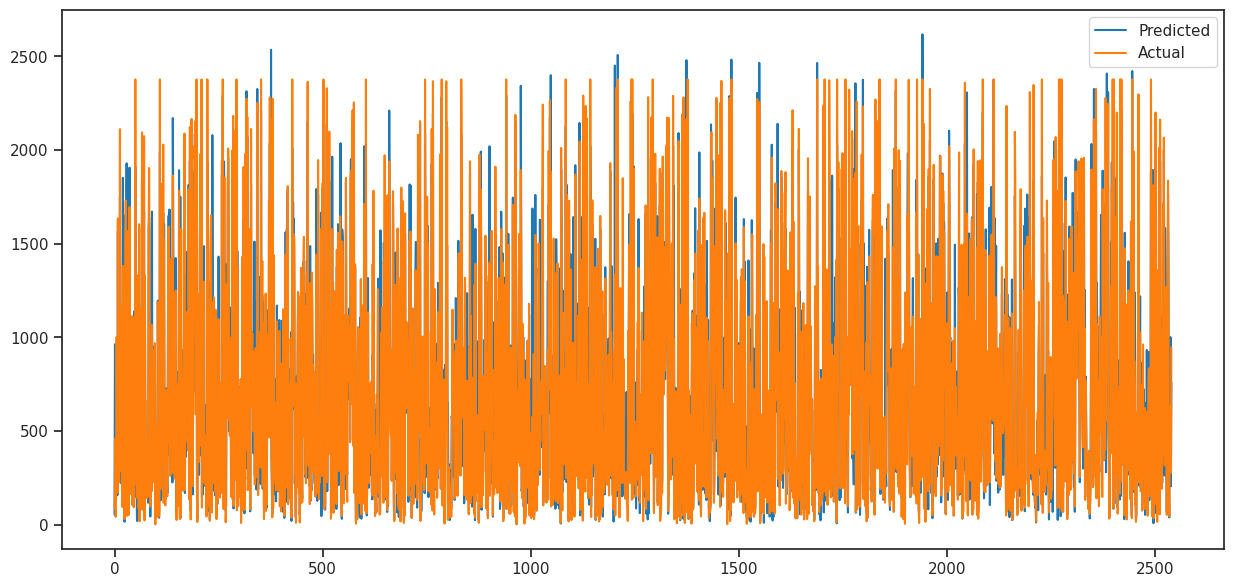

In [ ]:
#Visualization
# Plot between actual target variable vs Predicted one
sns.set_context("notebook");
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred5))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Here I used XGBRegressor as the model, it show high r2 and low MAE and RMSE score that r2 as 0.85, mae as 3.27 and rmse as 4.11. However there is difference in test and training score which i will try to recover using hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBRegressor(objective = 'reg:squarederror')

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='r2')

xg_grid1=xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_sam

In [ ]:
# Predict on the model
# Making predictions on train and test data

y_pred_train6= xg_grid1.predict(X_train)
y_pred6 = xg_grid1.predict(X_test)

In [ ]:
# # Metric Score chart for train
r2_train6 = r2(y_train, y_pred_train6)
adj_r2_train6 = 1-(1-r2(np.square(y_train), np.square(y_pred_train6)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train6 = mse(y_train, y_pred_train6)
RMSE_train6 = np.sqrt(MSE_train6)
MAE_train6 = mae(y_train, y_pred_train6)

# Metric Score chart for test
r2_test6 = r2(y_test, y_pred6)
adj_r2_test6 = 1-(1-r2(np.square(y_test), np.square(y_pred6)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test6 = mse(y_test, y_pred6)
RMSE_test6 = np.sqrt(MSE_test6)
MAE_test6 = mae(y_test, y_pred6)

new_row = {
        'Model': 'XGBRegressor_GridCV',
        'R2_train': r2_train6,
        'R2_test': r2_test6,
        'Adjusted_R2_train': adj_r2_train6,
        'Adjusted_R2_test': adj_r2_test6,
        'MAE_train': MAE_train6,
        'MAE_test': MAE_test6,
        'RMSE_train': RMSE_train6,
        'RMSE_test': RMSE_test6
    }
result = result.append(new_row, ignore_index=True)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV, employing the Grid Search technique, plays a pivotal role in finding optimal hyperparameters to enhance model performance.

The quest for identifying the best hyperparameter values for optimal prediction results can be a complex task. Manual search methods, relying on hit and trial, are time-consuming and often impractical. To address this challenge, techniques like Random Search and GridSearch were introduced.

Grid Search systematically explores different combinations of specified hyperparameters and their values. It calculates the performance for each combination and selects the best set of hyperparameters based on the defined evaluation metric. While powerful, Grid Search can be computationally expensive, particularly as the number of hyperparameters increases.

In GridSearchCV, the approach extends beyond Grid Search alone. It integrates cross-validation during the model training process. Cross-Validation enhances the reliability of the model by assessing its performance across multiple subsets of the data.

Considering the efficiency and effectiveness of GridSearchCV, it emerges as a robust method for hyperparameter optimization. By systematically navigating the hyperparameter space and incorporating cross-validation, GridSearchCV aims to identify the optimal configuration that maximizes the model's predictive capabilities.







.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
#final result
result

Model  R2_train  R2_test  Adjusted_R2_train  \
0              Linear_Regression      0.61     0.59               0.55   
1       Linear_Regression_GridCV      0.61     0.59               0.55   
2          RandomForestRegressor      0.98     0.88               0.98   
3  RandomForestRegressor_Grid_CV      0.84     0.81               0.82   
4                   XGBRegressor      0.98     0.88               0.97   
5            XGBRegressor_GridCV      0.96     0.88               0.95   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.54       5.79      5.83        7.37       7.42  
1              0.54       5.79      5.83        7.37       7.42  
2              0.87       1.01      2.80        1.49       4.11  
3              0.79       3.37      3.67        4.72       5.12  
4              0.87       1.27      2.78        1.82       4.08  
5              0.87       1.71      2.82        2.43       4.11

Hyperparameter tunning certainly showed a better result, r2 was increased from 0.85 to 0.88 on test and mae and rmse was lowered. Mae reduced from 3.27 to 2.73 and rmse from 4.11 to 2.66. Overall model show good result.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

From both a model and business perspective, I selected R2 (coefficient of determination) and RMSE (Root Mean Squared Error) as evaluation metrics.

R2 Score: The R2 score serves as a valuable metric to gauge how well the model fits the data. Ranging from 0 to 1, a higher R2 score signifies a better fit. In a business context, a high R2 score implies that the model adeptly explains a significant portion of the variance in the data. This is crucial as it indicates the model's ability to provide accurate predictions, potentially positively influencing decision-making and resource allocation.

RMSE (Root Mean Squared Error): RMSE measures the average squared error of the model's predictions and is calculated as the square root of the mean squared error (MSE). In a business context, a low RMSE is indicative of the model making relatively small errors. This is particularly significant when the model is employed for critical decision-making or resource allocation, as it suggests that the model's predictions closely align with the actual values.

In summary, the combination of R2 score and RMSE provides a comprehensive assessment of the model's accuracy and predictive performance. These metrics, chosen with both model effectiveness and business impact in mind, offer valuable insights for ensuring the model's reliability and utility in real-world applications.






.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the results, I want to consider using the XGBRegressor_GridCV i.e., XGBRegressor with hyperparameter tunned model as final model. This model has the highest R2 values on both the training and test sets, which indicates that it is doing a good job of explaining the variance in the target variable. It also has the lowest MAE and RMSE values on the test set, which means that it is making relatively small and accurate predictions.

In [ ]:
#final best result
result.sort_values('R2_test',ascending = False)

Model  R2_train  R2_test  Adjusted_R2_train  \
4                   XGBRegressor      0.98     0.88               0.97   
2          RandomForestRegressor      0.98     0.88               0.98   
5            XGBRegressor_GridCV      0.96     0.88               0.95   
3  RandomForestRegressor_Grid_CV      0.84     0.81               0.82   
0              Linear_Regression      0.61     0.59               0.55   
1       Linear_Regression_GridCV      0.61     0.59               0.55   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
4              0.87       1.27      2.78        1.82       4.08  
2              0.87       1.01      2.80        1.49       4.11  
5              0.87       1.71      2.82        2.43       4.11  
3              0.79       3.37      3.67        4.72       5.12  
0              0.54       5.79      5.83        7.37       7.42  
1              0.54       5.79      5.83        7.37       7.42

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#Get shap values
explainer = shap.Explainer(xg_models)
shap_values = explainer(X_test)

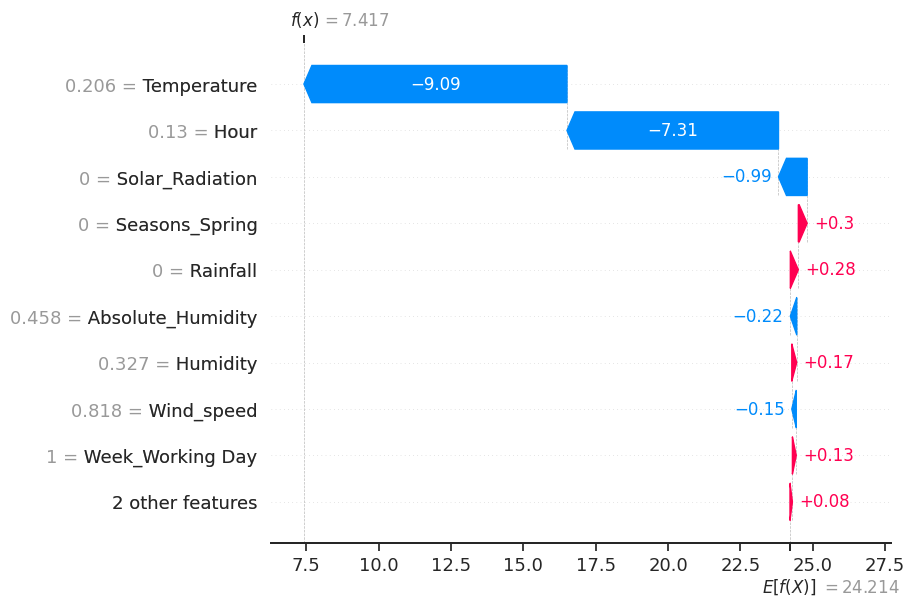

In [ ]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

Above we have the code to create a waterfall plot for the first abalone in our dataset. This plot helps us visualise the SHAP values for each of the features. These tell us how much each of the features have increased or decreased the predicted number of rings for this specific abalone.

Looking at the x-axis, we can see the base value is E[f(x)] = 24.214. This is the average predicted number of rings across all abalones. The ending value is f(x) = 7.511. The SHAP values are all the values in between.

There will be a unique waterfall plot for every observation/abalone in our dataset. They can all be interpreted in the same way as above. In each case, the SHAP values tell us how much each factor contributed to the model’s prediction when compared to the mean prediction. Large positive/negative SHAP values indicate that the feature had a significant impact on the model’s prediction.

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Another way to visualise SHAP values is using a force plot. These give us pretty much the same information as a waterfall plot in a straight line how the geatures are contributiong and the relationship between the features. If one value value increases res will compress.

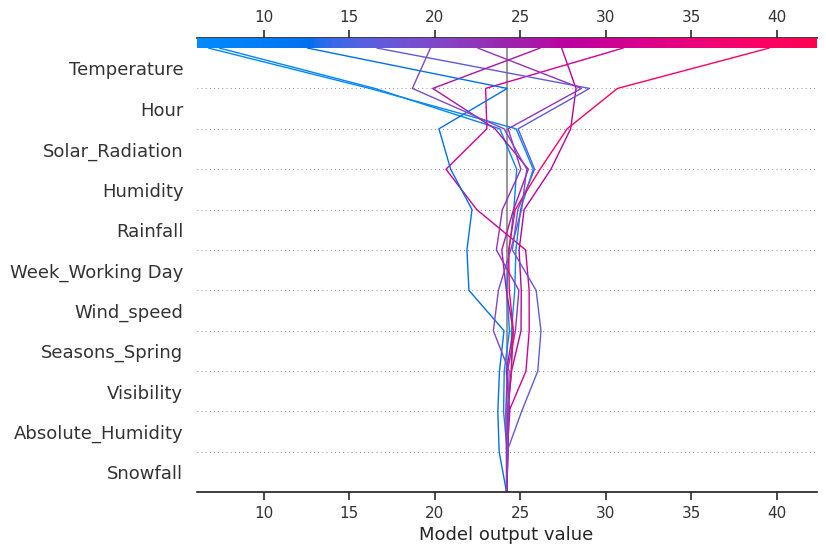

In [ ]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X_test.columns))

Waterfall and force plots serve as excellent tools for interpreting individual predictions. However, to gain insights into how the model makes predictions in a more general context, aggregating SHAP values is essential. One effective method for this purpose is utilizing a decision plot, as demonstrated in the code snippet for the first 10 abalones.

In the decision plot, each line represents an individual abalone, starting at a common base value of 24.21 and concluding at its predicted number of rings. The movement along the x-axis corresponds to the SHAP values for each feature as you traverse up the y-axis. This provides a consolidated view, akin to a waterfall plot, allowing us to observe trends across multiple observations.

With just 10 observations, discernible patterns emerge. Notably, certain lines exhibit a zig-zag pattern at the top, indicating that for these observations, an increase in shucked weight positively impacts the prediction (positive SHAP), while shell weight and whole weight exert a negative influence (negative SHAP). This observation hints at features having opposing effects on the prediction, a trend that will be further explored in plot 5 (beeswarm).

However, a limitation of the decision plot is its inability to visualize all SHAP values simultaneously. As the number of observations increases, the plot may become cluttered and challenging to interpret. Thus, we are confined to interpreting SHAP values for a select few observations, emphasizing the need for additional visualizations to glean a comprehensive understanding of the model's workings.

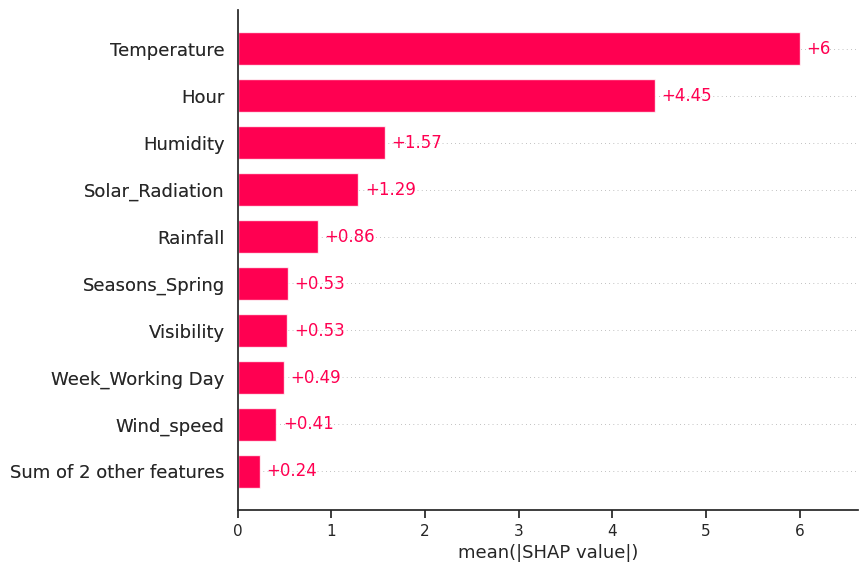

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

An alternative approach for aggregating SHAP values is through a mean SHAP plot. For each feature, we compute the mean of the absolute SHAP values across all observations. The absolute values are used to prevent positive and negative SHAP values from offsetting each other. The resulting bar plot provides a visual representation, where each bar corresponds to a feature. In this specific plot, shell weight stands out with the largest mean SHAP value among all features.

Large mean SHAP values for features imply a substantial impact on the model's predictions, either positively or negatively. Therefore, this plot functions similarly to a feature importance plot, effectively highlighting features crucial to the model's predictions. However, it lacks insights into the specific nature of the relationship between features and the target variable, representing a limitation. The mean SHAP plot is particularly valuable for emphasizing the relative importance of features in driving the model's outcomes.








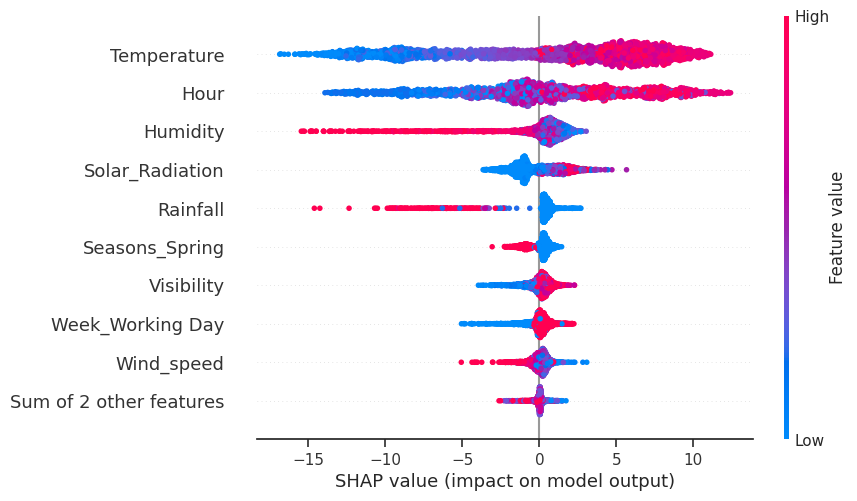

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

Our final visualization is the beeswarm plot, depicted in the figure. In this plot, SHAP values for all observations are showcased, organized by features along the y-axis. The coloration of points within each feature group corresponds to the respective feature values, with higher values represented in redder tones. The ordering of features is based on their mean SHAP values.

This plot serves as a comprehensive solution, addressing limitations observed in previous visualizations. Unlike the decision plot, the beeswarm plot accommodates all observations while preserving interpretability. Similar to mean SHAP, it effectively highlights significant relationships, providing insights into the nature of these relationships and enhancing our understanding of feature importance.

## ***8.*** ***Future Work (Optional)***


In the next phase of this project, the focus will be on the deployment process and ensuring the seamless transition of the developed machine learning model into a production environment. Key steps for future work include:

* Model Persistence:
Save the best-performing machine learning model, identified as the XGBRegressor, using a serialized format like a pickle file or joblib file. This is crucial for preserving the model's state and parameters for deployment.
* Deployment Strategy:
Develop a robust deployment strategy to integrate the machine learning model into the operational system. This involves considerations for the hosting environment, scalability, and real-time prediction capabilities.
* Scalability Assessment:
Evaluate the scalability of the deployed model to handle varying levels of demand and data. Considerations should include the potential expansion of the user base and the ability of the system to adapt to increased computational loads.
* Monitoring and Maintenance:
Implement a monitoring system to track the model's performance in real-time. Regular maintenance and updates may be necessary to ensure the continued accuracy and relevance of predictions.
* Sanity Checks:
As part of the deployment process, conduct sanity checks by loading the saved model file and making predictions on unseen data. This step ensures that the deployed model behaves as expected in a production environment.
* Feedback Loop:
Establish a feedback loop to gather insights from the deployed system. This can involve collecting user feedback, monitoring prediction accuracy, and identifying opportunities for model improvement.
* Continuous Improvement:
Implement mechanisms for continuous improvement, such as periodic model retraining using new data. This ensures that the model remains adaptive to evolving patterns and trends in bike demand.
* Documentation and Communication:
Create comprehensive documentation for the deployed model, including model architecture, dependencies, and deployment procedures. Clear communication with stakeholders and end-users is essential for successful adoption.
By addressing these future work items, the project can move from model development to a fully functional and reliable system that contributes to optimizing bike demand management for the bike-sharing company.


# **Conclusion**

The primary aim of this project was to enhance the stability of bike demand on an hourly basis. Key insights derived from the analysis include:

* The XGBRegressor model emerged as a promising solution, showcasing a robust performance with an R2 score of 0.88. This makes it a suitable choice to address the challenge of stabilizing bike demand.

* Discernible patterns in bike rentals were observed, with higher counts during working days compared to weekends.

* Distinct peaks in bike demand were identified around 8-9 AM in the morning and 6-7 PM in the evening, aligning with typical commuting hours.

* Seasonal influences were evident, showing increased bike demand during summer months as opposed to winter.

* Weather conditions played a significant role, with clear days correlating to higher bike demand, while snowy or rainy days saw a decline.

* The optimal temperature range for heightened bike demand was found to be between 22 to 25°C.

* Several features, including 'Hour,' 'Temperature (°C),' 'Humidity,' 'Wind_speed,' 'Visibility,' 'Solar_Radiation,' 'Rainfall,' 'Snowfall,' 'Seasons,' and 'Day of Week,' were identified as crucial regulators of bike demand.








### ***Hurrah! WE have successfully completed my Machine Learning Capstone Project !!!🎯🏆***